# Disk Characteristics vs. Chemistry

Overall conclusions:
- Interesting trend between multi-star systems and abundance of chemistry. Has this been studied? If not, recommend additional multi-star targets
    - What does this mean if there is a true trend? Tidal interactions with neighboring stars, different conditions in the disk? Does it mean that more chemicals are present, or we are able to "see" them (optical depth). Could be the latter, less dust so can see through to the gas. What if it means there is more chemistry present, what does that imply for planet formation and even habitability?
    - Combined chemistry? Mixing in the spectra?
- Some sources have detections for all volatiles in our list. Why are they special? 

Propagation of Error: sqrt(error1^2 + error2^2) 

# Fall 2022 Analysis ideas
## - All detections are true, is there anything special about characteristics?
    - Hypothesis:
        - Bright disks, low absolute or apparent magnitude
        - Young stars
        - Late-type stars
    - How to plot:
        - set variable to each chem detection = TRUE
        - set variable to each true chem variable = TRUE, like "[ne + c02 +HCN ] = true"
        - Or maybe set variable = 1 if chem detection = true
        
     - First: Isolate the data, "see" what it looks like
     
## - No detections, is there anything special about characteristics?
    - Hyphothesis: 
        - High apparent or absolute magnitude/ "dim"
        - Old, or a transition disk
    - How to plot:
## - Plot ratios of detections
    - Hypothesis: 
        - High HCN/C2H2 in late-type stars (G and K) (Pascucci)
        - HCN/H20 correlation to disk mass and radius (Najita, Banzatti)
    - How:
        - New variable for each combination of chemical ratios
            - How many combinations? 6 chemicals, 30 ratios (6*5)
            - flux / flux
        - Plot against each characteristic on x axis. Can probably plot all 30 ratios on each characteristic plot (let's say about 10 characteristics)
            - Scatter eg: disk radius grows, disk mass grows, age grows, accretion rate grows
            - Bar/hist eg: spectral type, has substructure y/n, is multi star y/n
                - Maybe tiny hist line for each star, where bar height = ratio? then collect each star bar in a group for each x axis type, like spectral type or y/n group.
        - Y axis is ratio. What if many times brightness in numerator? will be greater than 1
        

In [1]:
from astropy.io import fits
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import math

# Dataset

In [2]:
# reading two csv files
Characteristics = pd.read_csv(r"C:\Users\pheretz\Desktop\URSI_Internship\Sources Info Sheet - Catalog (8.26).csv")
Chemistry = pd.read_csv(r"C:\Users\pheretz\Desktop\URSI_Internship\Sources Info Sheet - Molecular Catalog (7.28).csv")
  
# using merge function by setting how='inner'
output1 = pd.merge(Characteristics, Chemistry, 
                   on='Star', 
                   how='outer')


# Suppress list to only include targets with Spitzer spectra
output1 = output1.loc[(output1['Existing_Spitzer_data'] != 'No') & (output1['Existing_Spitzer_data'] != 'No?')]
  
# displaying result
output1



,Star,Program_ID_x,Program_timeline,parallax,uncertainty_parallax,reference_parallax,Distance,Uncertainty_distance_positive,uncertainty_distance_negative,reference_distance,...,NeII_12_8_flux_uncertainty,reference_NeII_12_8_flux,CO_P6,CO_P6_uncertainty,CO_P6_lessthan,reference_CO_P6,CO_P12,CO_P12_uncertainty,CO_P12_lessthan,reference_CO_P12
0,HT Lup,1584,"Feb 19, 2023 - Apr 8, 2023 (2023.050 - 2023.098)",6.515738,0.054831,gaia_dr3_parallaxes,153.474566,1.291514,1.291514,gaia_dr3_parallaxes,...,-9.900000e+01,lahuis_2007,-99.00,-99.0,-99,-99,-99.00,-99.0,-99,-99
1,GW Lup,1282,"Jul 8, 2022 - Aug 31, 2022 (2022.189 - 2022.243)",6.443233,0.017233,gaia_dr3_parallaxes,155.201599,0.415112,0.415112,gaia_dr3_parallaxes,...,-9.900000e+01,lahuis_2007,1.57,-99.0,1,salyk_2011,0.28,-99.0,1,salyk_2011
2,IM Lup,1282,"Feb 22, 2023 - Apr 12, 2023 (2023.053 - 2023.102)",6.417494,0.022029,gaia_dr3_parallaxes,155.824071,0.534898,0.534898,gaia_dr3_parallaxes,...,1.600000e-17,lahuis_2007,-99.00,-99.0,-99,-99,-99.00,-99.0,-99,-99
3,RU Lup,1584,"Feb 22, 2023 - Apr 12, 2023 (2023.053 - 2023.102)",6.348866,0.040187,gaia_dr3_parallaxes,157.508447,0.997000,0.997000,gaia_dr3_parallaxes,...,-9.900000e+01,lahuis_2007,-99.00,-99.0,-99,-99,-99.00,-99.0,-99,-99
6,MY Lup,1584,"Feb 23, 2023 - Apr 15, 2023 (2023.054 - 2023.105)",6.363048,0.035546,gaia_dr3_parallaxes,157.157383,0.877931,0.877931,gaia_dr3_parallaxes,...,-9.900000e+01,-99,-99.00,-99.0,-99,-99,-99.00,-99.0,-99,-99
9,AS 205,1584,"Feb 23, 2023 - Apr 9, 2023 (2023.054 - 2023.099)",7.572338,0.071824,gaia_dr3_parallaxes,132.059618,1.252586,1.252586,gaia_dr3_parallaxes,...,-9.900000e+01,lahuis_2007,24.18,0.6,0,salyk_2011,24.03,1.6,0,salyk_2011
10,SR 4,1584,"Feb 27, 2023 - Apr 13, 2023 (2023.058 - 2023.103)",7.420844,0.027535,gaia_dr3_parallaxes,134.755567,0.500008,0.500008,gaia_dr3_parallaxes,...,-9.900000e+01,-99,-99.00,-99.0,-99,-99,-99.00,-99.0,-99,-99
12,DoAr 25,1584,"Jul 17, 2023 - Sep 7, 2023 (2023.198 - 2023.250)",7.237938,0.042892,gaia_dr3_parallaxes,138.160903,0.818739,0.818739,gaia_dr3_parallaxes,...,-9.900000e+01,-99,-99.00,-99.0,-99,-99,-99.00,-99.0,-99,-99
13,Elias 24,1584,"Feb 27, 2023 - Apr 13, 2023 (2023.058 - 2023.103)",7.180888,0.063866,gaia_dr3_parallaxes,139.258542,1.238559,1.238559,gaia_dr3_parallaxes,...,-9.900000e+01,-99,-99.00,-99.0,-99,-99,-99.00,-99.0,-99,-99
17,WaOph 6,1282,"Jul 21, 2023 - Sep 10, 2023 (2023.202 - 2023.253)",8.161461,0.023129,gaia_dr3_parallaxes,122.527084,0.347233,0.347233,gaia_dr3_parallaxes,...,-9.900000e+01,lahuis_2007,3.66,0.5,0,salyk_2011,3.37,0.5,0,salyk_2011


# Data Set Statistics

In [3]:
# Only Spitzer spectra
# I want to run stats like Total stars = 31, total spirals = 5, total 

print('Total sources = '+str(output1['Star'].count()))
print('Total sources with rings = '+str(output1['Disk_has_Rings'].value_counts().TRUE))
print('Total sources with spirals = '+str(output1['Disk_has_spirals'].value_counts().TRUE))

#profile = ProfileReport(output1, title="Pandas Profiling Report")
#profile.to_widgets()

Total sources = 21
Total sources with rings = 13
Total sources with spirals = 4


#  OH Detections vs. Characteristics

In [4]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','OH_23.2_microns','OH_23.2_microns_uncertainty','OH_27.6_microns','OH_27.6_microns_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['OH_23.2_microns_uncertainty'] != -99]
df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
df_loc

,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,OH_23.2_microns,OH_23.2_microns_uncertainty,OH_27.6_microns,OH_27.6_microns_uncertainty
0,HT Lup,FALSE,TRUE,FALSE,Triple,K2,5.900000,NaN,NaN,NaN,NaN
1,GW Lup,TRUE,FALSE,FALSE,Single,M1.5,6.300000,NaN,NaN,NaN,NaN
2,IM Lup,TRUE,TRUE,UNSURE,Single,K5,5.700000,NaN,NaN,NaN,NaN
3,RU Lup,TRUE,FALSE,FALSE,Single,K7,5.700000,NaN,NaN,NaN,NaN
6,MY Lup,TRUE,FALSE,UNSURE,Single,K0,7.000000,NaN,NaN,NaN,NaN
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.800000,NaN,NaN,NaN,NaN
10,SR 4,TRUE,FALSE,UNSURE,Single,K7,5.900000,NaN,NaN,NaN,NaN
12,DoAr 25,TRUE,FALSE,FALSE,Single,K5,6.300000,NaN,NaN,NaN,NaN
13,Elias 24,TRUE,FALSE,FALSE,Single,K5,5.300000,NaN,NaN,NaN,NaN
17,WaOph 6,TRUE,TRUE,TRUE,Single,K6,5.500000,NaN,NaN,NaN,NaN


Conclusion: 
- Only 5 sources currently have detectable spirals, OH is detected in 2 of 5. 
- Asymmetries are found in 10 disks, 3 out of 6 confirmed OH detections have asymmetry.
- Where there is 23.2 detected, 27.6 is detected as well.
- Triple and Binary systems are not common in our data set (currently 5 out of 31), but at least 3 out of 6 OH detections are from multiple star systems.
- Dataset is too small for definitive conclusions.


# HCN Detections vs. Characteristics

In [5]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','HCN_flux','HCN_flux_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['HCN_flux_uncertainty'] != -99]
#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
df_loc

,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,HCN_flux,HCN_flux_uncertainty
3,RU Lup,TRUE,FALSE,FALSE,Single,K7,5.700000,3.690000e-17,3.900000e-18
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.800000,2.200000e-16,1.950000e-17
12,DoAr 25,TRUE,FALSE,FALSE,Single,K5,6.300000,4.880000e-17,1.700000e-18
17,WaOph 6,TRUE,TRUE,TRUE,Single,K6,5.500000,1.710000e-17,2.000000e-18
18,AS 209,TRUE,FALSE,UNSURE,Single,K5,6.000000,6.800000e-17,1.510000e-17
20,FZ Tau,-99,-99,-99,Binary,M0.5,-99.000000,5.690000e-17,8.720000e-18
21,TW Cha,-99,-99,-99,Binary,K7,6.633468,2.270000e-17,6.000000e-19
22,VZ Cha,-99,-99,-99,Single,M0.5,5.900000,3.690000e-17,1.400000e-18
23,GQ Lup,TRUE,FALSE,-99,Binary,K5.0,6.000000,3.900000e-17,1.600000e-18
24,IRAS 04385,-99,-99,-99,Single,M0,-99.000000,2.240000e-17,3.420000e-18


Conclusion:
- Nothing stands out, except that 4 of our 5 multiple star systems have detectable HCN

# C2H2 Detections vs. Characteristics

In [6]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','C2H2_flux','C2H2_flux_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['C2H2_flux_uncertainty'] != -99]
#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
df_loc

,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,C2H2_flux,C2H2_flux_uncertainty
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.800000,2.110000e-16,1.500000e-17
12,DoAr 25,TRUE,FALSE,FALSE,Single,K5,6.300000,9.900000e-18,1.300000e-18
18,AS 209,TRUE,FALSE,UNSURE,Single,K5,6.000000,2.790000e-17,6.140000e-18
20,FZ Tau,-99,-99,-99,Binary,M0.5,-99.000000,3.530000e-17,8.530000e-18
21,TW Cha,-99,-99,-99,Binary,K7,6.633468,1.360000e-17,5.000000e-19
22,VZ Cha,-99,-99,-99,Single,M0.5,5.900000,4.590000e-17,1.000000e-18
24,IRAS 04385,-99,-99,-99,Single,M0,-99.000000,9.450000e-18,2.100000e-18
26,CI Tau,TRUE,FALSE,UNSURE,Single,K5.5,6.397940,2.170000e-17,4.440000e-18
28,IQ Tau,TRUE,FALSE,UNSURE,Single,M1.1,6.623249,4.120000e-17,2.300000e-18


Conclusion:
- 3 of 5 multiple star systems present 
- 4 of 5 disks whose characteristics have not been catalogued present
- Asymmetry is present! In at least 2 of 9, 2 more are unsure, 4 more have not been catalogued

# H2O Detections vs. Characteristics

H2O 15.17 um

In [7]:
# 3 water wavelengths... do not all correlate to detections like OH. How best to analyze? 1 by 1? Leaning towards... How do I pull stats like
# "present in all 3", "present in 2"... etc
# What energy levels to these wavelengths correlate to? 

# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','H2O_15.17_microns','H2O_15.17_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['H2O_15.17_uncertainty'] != -99]
#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
df_loc

,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,H2O_15.17_microns,H2O_15.17_uncertainty
0,HT Lup,FALSE,TRUE,FALSE,Triple,K2,5.900000,NaN,NaN
1,GW Lup,TRUE,FALSE,FALSE,Single,M1.5,6.300000,NaN,NaN
2,IM Lup,TRUE,TRUE,UNSURE,Single,K5,5.700000,NaN,NaN
3,RU Lup,TRUE,FALSE,FALSE,Single,K7,5.700000,NaN,NaN
6,MY Lup,TRUE,FALSE,UNSURE,Single,K0,7.000000,NaN,NaN
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.800000,NaN,NaN
10,SR 4,TRUE,FALSE,UNSURE,Single,K7,5.900000,NaN,NaN
12,DoAr 25,TRUE,FALSE,FALSE,Single,K5,6.300000,NaN,NaN
13,Elias 24,TRUE,FALSE,FALSE,Single,K5,5.300000,NaN,NaN
17,WaOph 6,TRUE,TRUE,TRUE,Single,K6,5.500000,NaN,NaN


Conclusion:
- 4 of 5 multi-star systems present
- 4 of 5 "unobserved" disks characteristics present
- High percentage of asymmetry, 4 detections out of 11, 1 additional uncertainty, 5 additional unobserved
- 2 of 5 spirals present


H2O 17.22 um

In [8]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','H2O_17.22_microns','H2O_17.22_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['H2O_17.22_uncertainty'] != -99]
#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
df_loc

,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,H2O_17.22_microns,H2O_17.22_uncertainty
0,HT Lup,FALSE,TRUE,FALSE,Triple,K2,5.900000,NaN,NaN
1,GW Lup,TRUE,FALSE,FALSE,Single,M1.5,6.300000,NaN,NaN
2,IM Lup,TRUE,TRUE,UNSURE,Single,K5,5.700000,NaN,NaN
3,RU Lup,TRUE,FALSE,FALSE,Single,K7,5.700000,NaN,NaN
6,MY Lup,TRUE,FALSE,UNSURE,Single,K0,7.000000,NaN,NaN
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.800000,NaN,NaN
10,SR 4,TRUE,FALSE,UNSURE,Single,K7,5.900000,NaN,NaN
12,DoAr 25,TRUE,FALSE,FALSE,Single,K5,6.300000,NaN,NaN
13,Elias 24,TRUE,FALSE,FALSE,Single,K5,5.300000,NaN,NaN
17,WaOph 6,TRUE,TRUE,TRUE,Single,K6,5.500000,NaN,NaN


Conclusions:
- 4 of 5 multi-star systems present 
- High correlation of Rings (6 of 9, 3 without data), Spirals (2 of 5 total detections), Asymmetry (3-4 of 9, 4 unobserved)

H2O 29.85 um (Outside bandpass of MIRI)

In [9]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','H2O_29.85_microns','H2O_29.85_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['H2O_29.85_uncertainty'] != -99]
#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
df_loc

,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,H2O_29.85_microns,H2O_29.85_uncertainty
0,HT Lup,FALSE,TRUE,FALSE,Triple,K2,5.900000,NaN,NaN
1,GW Lup,TRUE,FALSE,FALSE,Single,M1.5,6.300000,NaN,NaN
2,IM Lup,TRUE,TRUE,UNSURE,Single,K5,5.700000,NaN,NaN
3,RU Lup,TRUE,FALSE,FALSE,Single,K7,5.700000,NaN,NaN
6,MY Lup,TRUE,FALSE,UNSURE,Single,K0,7.000000,NaN,NaN
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.800000,NaN,NaN
10,SR 4,TRUE,FALSE,UNSURE,Single,K7,5.900000,NaN,NaN
12,DoAr 25,TRUE,FALSE,FALSE,Single,K5,6.300000,NaN,NaN
13,Elias 24,TRUE,FALSE,FALSE,Single,K5,5.300000,NaN,NaN
17,WaOph 6,TRUE,TRUE,TRUE,Single,K6,5.500000,NaN,NaN


Conclusions:
- All 5 multi-star systems present, 5 of 11 total where H2O 29.85 is detected

# CO2 Detections vs. Characteristics

In [10]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','CO2_flux','CO2_flux_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['CO2_flux_uncertainty'] != -99]
#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
df_loc

,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,CO2_flux,CO2_flux_uncertainty
0,HT Lup,FALSE,TRUE,FALSE,Triple,K2,5.90000,5.580000e-17,1.080000e-17
1,GW Lup,TRUE,FALSE,FALSE,Single,M1.5,6.30000,2.080000e-17,1.300000e-18
2,IM Lup,TRUE,TRUE,UNSURE,Single,K5,5.70000,8.600000e-18,1.500000e-18
3,RU Lup,TRUE,FALSE,FALSE,Single,K7,5.70000,1.410000e-17,3.100000e-18
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.80000,2.330000e-16,1.600000e-17
17,WaOph 6,TRUE,TRUE,TRUE,Single,K6,5.50000,2.560000e-17,1.700000e-18
18,AS 209,TRUE,FALSE,UNSURE,Single,K5,6.00000,1.810000e-16,5.180000e-17
20,FZ Tau,-99,-99,-99,Binary,M0.5,-99.00000,2.590000e-16,4.590000e-17
24,IRAS 04385,-99,-99,-99,Single,M0,-99.00000,3.260000e-17,7.610000e-18
26,CI Tau,TRUE,FALSE,UNSURE,Single,K5.5,6.39794,5.860000e-18,1.090000e-18


CO2 Conclusions:
- 3 of 5 multi-star systems present
- 4 0f 5 spirals present
- High presence of asymmetry: 2 of 10 detections, 3 additional uncertain
- High presence of rings: 6 of 10 detections, 2 falses, 2 unobserved

# NeII Detections vs. Characteristics

In [11]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry','Star_system','Spectral_Type','log_tstar','NeII_12.8_flux','NeII_12.8_flux_uncertainty'])
# suppress rows with -99 values
df_loc = df.loc[df['NeII_12.8_flux_uncertainty'] != -99]
#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)


print('Total sources = '+str(df_loc['Star'].count()))

df_loc

Total sources = 21


,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,NeII_12.8_flux,NeII_12.8_flux_uncertainty
0,HT Lup,FALSE,TRUE,FALSE,Triple,K2,5.900000,NaN,NaN
1,GW Lup,TRUE,FALSE,FALSE,Single,M1.5,6.300000,NaN,NaN
2,IM Lup,TRUE,TRUE,UNSURE,Single,K5,5.700000,NaN,NaN
3,RU Lup,TRUE,FALSE,FALSE,Single,K7,5.700000,NaN,NaN
6,MY Lup,TRUE,FALSE,UNSURE,Single,K0,7.000000,NaN,NaN
9,AS 205,FALSE,TRUE,TRUE,Triple,K5,5.800000,NaN,NaN
10,SR 4,TRUE,FALSE,UNSURE,Single,K7,5.900000,NaN,NaN
12,DoAr 25,TRUE,FALSE,FALSE,Single,K5,6.300000,NaN,NaN
13,Elias 24,TRUE,FALSE,FALSE,Single,K5,5.300000,NaN,NaN
17,WaOph 6,TRUE,TRUE,TRUE,Single,K6,5.500000,NaN,NaN


Ne II Conclusions:
- Fix -99 values
- Present in 4 disks, all single-star systems
- Asymmetry present in at least 1 (2 additional uncertain, 1 unobserved)

# Chemistry richness
Which disks have multiple detections? What makes them special? Very bright? Any disk characteristics? Ie, AS 205, TW Cha, VZ Cha, WaOph 6

# Targets with All Detections

In [12]:
# 10.15 idea:  If molec=TRUE, = 1 

# **** WHY ARE FLUXES APPEARING AS NAN ****

# to view the data as a dataset: 

# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])
# suppress rows with -99 values

alldetections = df.loc[(df['OH_23_2_microns_uncertainty']!= -99)& (df['OH_27_6_microns_uncertainty']!=-99)
                       &(df['HCN_flux_uncertainty']!=-99)&(df['C2H2_flux_uncertainty']!=-99)
                       &(df['H2O_15_17_uncertainty']!=-99)&(df['H2O_17_22_uncertainty']!=-99)
                       &(df['H2O_17_22_uncertainty']!=-99)&(df['H2O_29_85_uncertainty']!=-99)
                       &(df['CO2_flux_uncertainty']!=-99)&(df['NeII_12_8_flux_uncertainty']!=-99)]
                        

#df_OH23 = df.loc[df['OH_23.2_microns_uncertainty'] != -99]
#df_OH27 = df.loc[df['OH_27.6_microns_uncertainty'] != -99]
#df_HCN = df.loc[df['HCN_flux_uncertainty'] != -99]
#df_C2H2 = df.loc[df['C2H2_flux_uncertainty'] != -99]
#df_H2O15 = df.loc[df['H2O_15.17_uncertainty'] != -99]
#df_H2O17 = df.loc[df['H2O_17.22_uncertainty'] != -99]
#df_H2O29 = df.loc[df['H2O_29.85_uncertainty'] != -99]
#df_CO2 = df.loc[df['CO2_flux_uncertainty'] != -99]
#df_NeII = df.loc[df['NeII_12.8_flux_uncertainty'] != -99]

#df_loc.sort_values('OH_23.2_microns',ascending=False)
# show table, print (df_loc)
#print(df_OH23)
#print(df_OH27)
#print(df_HCN)
#print(df_C2H2)
#print(df_H2O15)
#print(df_H2O17)
#print(df_H2O29)
#print(df_CO2)
#print(df_NeII)

alldetections


,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,log_tstar,OH_23_2_microns,OH_23_2_microns_uncertainty,OH_27_6_microns,...,H2O_15_17_microns,H2O_15_17_uncertainty,H2O_17_22_microns,H2O_17_22_uncertainty,H2O_29_85_microns,H2O_29_85_uncertainty,CO2_flux,CO2_flux_uncertainty,NeII_12_8_flux,NeII_12_8_flux_uncertainty


# Targets with No Chemical Detections

In [13]:
# define columns
df = pd.DataFrame(output1, columns= ['Star','Distance','Disk_has_Rings','Region','Log_Mstar','T_eff','log_Lstar',
                                     'disk_inclination','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])

# suppress rows with other than -99 values

nodetections = df.loc[(df['OH_23_2_microns_uncertainty']== -99)& (df['OH_27_6_microns_uncertainty']==-99)
                       &(df['HCN_flux_uncertainty']==-99)&(df['C2H2_flux_uncertainty']==-99)
                       &(df['H2O_15_17_uncertainty']==-99)&(df['H2O_17_22_uncertainty']==-99)
                       &(df['H2O_17_22_uncertainty']==-99)&(df['H2O_29_85_uncertainty']==-99)
                       &(df['CO2_flux_uncertainty']==-99)&(df['NeII_12_8_flux_uncertainty']==-99)]


nodetections

,Star,Distance,Disk_has_Rings,Region,Log_Mstar,T_eff,log_Lstar,disk_inclination,Disk_has_spirals,Disk_Asymmetry,...,H2O_15_17_microns,H2O_15_17_uncertainty,H2O_17_22_microns,H2O_17_22_uncertainty,H2O_29_85_microns,H2O_29_85_uncertainty,CO2_flux,CO2_flux_uncertainty,NeII_12_8_flux,NeII_12_8_flux_uncertainty
6,MY Lup,157.157383,TRUE,Lup IV,0.09,5128.61,-0.060000,73.2,FALSE,UNSURE,...,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0
10,SR 4,134.755567,TRUE,Oph L1688,-0.17,4073.80,0.070000,22.0,FALSE,UNSURE,...,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0
13,Elias 24,139.258542,TRUE,Oph L1688,-0.11,4265.80,0.780000,29.0,FALSE,FALSE,...,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0,-9.900000e+01,-99.0
27,RY Lup,153.483905,-99,Lupus,0.15,5082.00,0.220003,-99.0,-99,-99,...,6.500000e-18,-99.0,7.400000e-18,-99.0,9.700000e-18,-99.0,1.120000e-17,-99.0,3.200000e-17,-99.0


Conclusion:
- Only RY Lup an example of no detections, **** looks like the other 3 were not analyzed, though spectra are available

# Quantify Detections
- Should I combine OH and H2O into one detection? 

In [14]:
# Use mybool to state if detection is true, = 1


df = pd.DataFrame(output1, columns= ['Star','Distance','Disk_has_Rings','Region','Log_Mstar','T_eff','log_Lstar',
                                     'disk_inclination','Disk_has_spirals','Disk_Asymmetry',
                                     'R95',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns',
                                     'OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])

# Returns true detection = 1, nondetection = 0
mybool_OH23 = (df.OH_23_2_microns_uncertainty != -99)
mybool_OH23 = mybool_OH23*1

mybool_OH27 = (df.OH_27_6_microns_uncertainty != -99)
mybool_OH27 = mybool_OH27*1

mybool_HCN = (df.HCN_flux_uncertainty != -99)
mybool_HCN = mybool_HCN*1

mybool_C2H2 = (df.C2H2_flux_uncertainty != -99)
mybool_C2H2 = mybool_C2H2*1

mybool_H2O15 = (df.H2O_15_17_uncertainty != -99)
mybool_H2O15 = mybool_H2O15*1

mybool_H2O17 = (df.H2O_17_22_uncertainty != -99)
mybool_H2O17 = mybool_H2O17*1

mybool_H2O29 = (df.H2O_29_85_uncertainty != -99)
mybool_H2O29 = mybool_H2O29*1

mybool_CO2 = (df.CO2_flux_uncertainty != -99)
mybool_CO2 = mybool_CO2*1

mybool_Ne = (df.NeII_12_8_flux_uncertainty != -99)
mybool_Ne = mybool_Ne*1

totaldetections = mybool_OH23 + mybool_OH27 + mybool_HCN + mybool_C2H2 + mybool_H2O15 + mybool_H2O17 + mybool_H2O29 + mybool_CO2 + mybool_Ne

totaldetections
# Can now use totaldetections in calculations, eg show me group that has totaldetections > 5



0     2
1     1
2     2
3     5
6     0
9     8
10    0
12    2
13    0
17    7
18    4
19    1
20    6
21    7
22    7
23    6
24    6
25    3
26    6
27    0
28    4
dtype: int32

# Chemistry Richness vs. 1 Stellar or Disk Characteristic

# Number of Detections vs. Spectral Type
Should see a trend richer towards later type

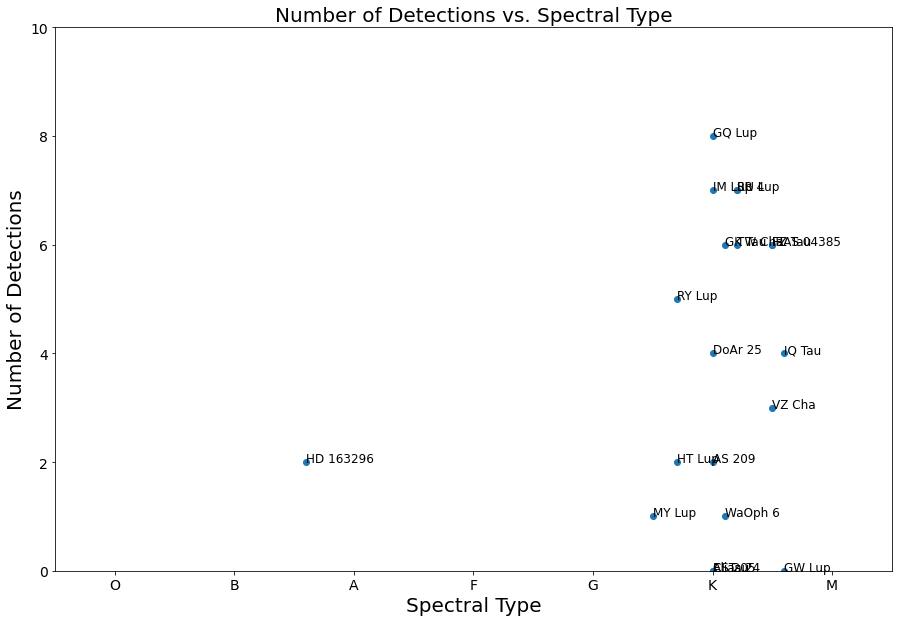

<Figure size 432x288 with 0 Axes>

In [15]:

# Add a column to dataframe of spectral type as digits  
f = lambda s: s[0:2]
df['SpType2'] = df['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
# NOTE, currently pulling integer, not float, missing dec place. Not sure how to amend instruction #########
f = lambda s: order[s[0]]+s[1]
df['SpType2'] = df['SpType2'].apply(f)
# sort list by spectral type "digits"
df_spec = df.sort_values('SpType2', ascending = True).reset_index(drop=True)

#print(df_spec2)

# send values to plot
star_list = df_spec['Star'].tolist()
spectral_type2 = df_spec['SpType2'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('Number of Detections vs. Spectral Type')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Detections')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_spec['SpType2'].astype(float), totaldetections)

for i, (x, y) in enumerate(zip(df_spec['SpType2'].astype(int), totaldetections)):
    ax.text(x,y,star_list[i],fontsize=12)

           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()



# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html
plt.savefig('spec.type.numb.detec.png')


Conclusion: No real conclusion right now. I want to explore the group 6 or more detections, and the group 2 or less detections
- Didn't confirm trend, except that the B type star has few detections

*** Star names are not assigned to correct points, eg WaOph 6 has a bunch, 8 detections?

*** Note! You cannot split up the totaldetections equation by line, must be on same line

# Number of Detections vs. Temperature
- Predict detections will decrease as temp gets hotter, thinking of cooler stars have richer chemistry detection

Test updating the mybool variables to suppress characteristic missing data:

In [16]:
# Returns true detection = 1, nondetection = 0
mybool_OH23Temp = ((df.OH_23_2_microns_uncertainty != -99) & (df.T_eff != -99))
mybool_OH23Temp = mybool_OH23Temp*1

#mybool_OH23Temp

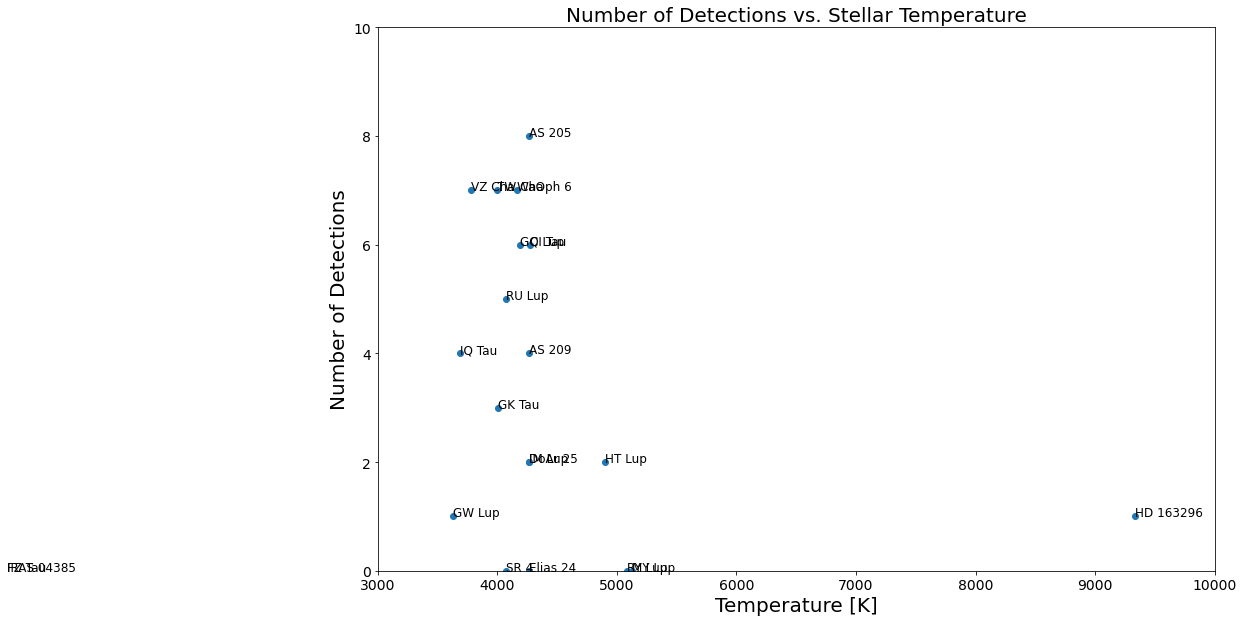

0     2
1     1
2     2
3     5
6     0
9     8
10    0
12    2
13    0
17    7
18    4
19    1
20    0
21    7
22    7
23    6
24    0
25    3
26    6
27    0
28    4
dtype: int32


In [17]:
# Update mybool variables to suppress stars where we do not have the characteristic data
# Returns true detection = 1, nondetection = 0
mybool_OH23 = ((df.OH_23_2_microns_uncertainty != -99) & (df.T_eff != -99))
mybool_OH23 = mybool_OH23*1

mybool_OH27 = ((df.OH_27_6_microns_uncertainty != -99) &  (df.T_eff != -99))
mybool_OH27 = mybool_OH27*1

mybool_HCN = ((df.HCN_flux_uncertainty != -99) & (df.T_eff != -99))
mybool_HCN = mybool_HCN*1

mybool_C2H2 = ((df.C2H2_flux_uncertainty != -99) & (df.T_eff != -99))
mybool_C2H2 = mybool_C2H2*1

mybool_H2O15 = ((df.H2O_15_17_uncertainty != -99) & (df.T_eff != -99))
mybool_H2O15 = mybool_H2O15*1

mybool_H2O17 = ((df.H2O_17_22_uncertainty != -99) & (df.T_eff != -99))
mybool_H2O17 = mybool_H2O17*1

mybool_H2O29 = ((df.H2O_29_85_uncertainty != -99) & (df.T_eff != -99))
mybool_H2O29 = mybool_H2O29*1

mybool_CO2 = ((df.CO2_flux_uncertainty != -99) & (df.T_eff != -99))
mybool_CO2 = mybool_CO2*1

mybool_Ne = ((df.NeII_12_8_flux_uncertainty != -99) & (df.T_eff != -99))
mybool_Ne = mybool_Ne*1

totaldetections = mybool_OH23 + mybool_OH27 + mybool_HCN + mybool_C2H2 + mybool_H2O15 + mybool_H2O17 + mybool_H2O29 + mybool_CO2 + mybool_Ne


# send values to plot
star_list = df['Star'].tolist()
Temp = df['T_eff'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(3000,10000)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('Number of Detections vs. Stellar Temperature')

# attempting to suppress -99 values
#y2 = np.ma.masked_where(((Temp==-99), totaldetections)) 

ax.title.set_fontsize(20)
ax.set_xlabel('Temperature [K]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Detections')
ax.yaxis.label.set_fontsize(20)

ax.scatter(Temp, totaldetections)

for i, (x, y) in enumerate(zip(Temp, totaldetections)):
    ax.text(x,y,star_list[i],fontsize=12)

           

ax.tick_params(axis='both', labelsize=14)



#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()

print(totaldetections)

Conclusion:
- Slight trend as temp increases, chemistry decreases, but still a wide range of detections around most of our stars in the range of ~4000-5000 degrees Kelvin

*** I think it's pulling in the -99 values because the boolean is asking if the statement is true or false, so it doesn't know to not plot falses or "0"s
So probably don't need to update the boolean, but instead suppress -99 from the plot somehow....

# Number of Detections vs. Luminosity
Predict as luminosity increases, detections will decrease

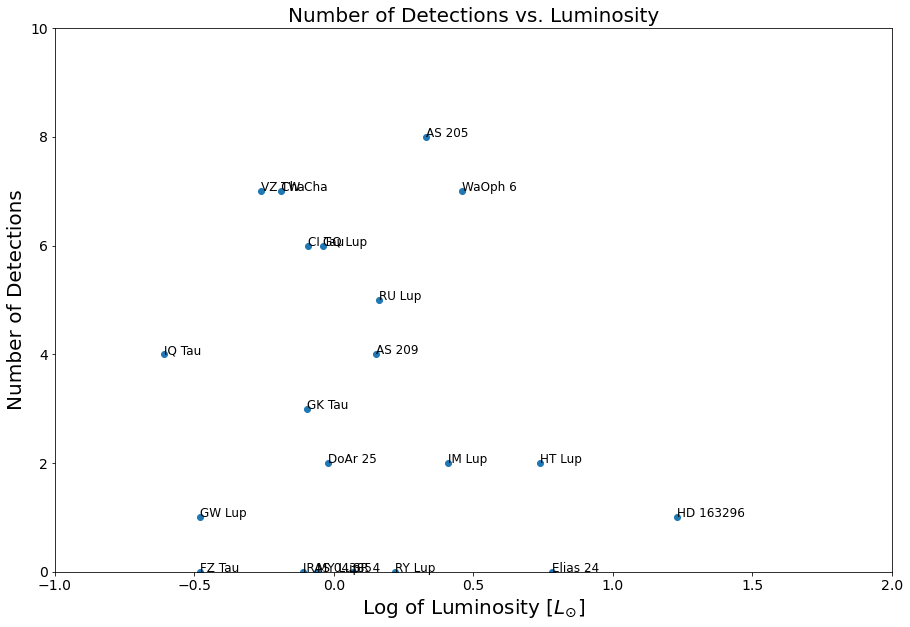

<Figure size 432x288 with 0 Axes>

In [18]:
# suppress values where age = -99
#df_age = df.loc[df['log_tstar'] != -99]
# changing size of df impacts totaldetections, different sizes

# send values to plot
star_list = df['Star'].tolist()
Lumin = df['log_Lstar'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(-1,2)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('Number of Detections vs. Luminosity')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Luminosity [$L_{\odot}$]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Detections')
ax.yaxis.label.set_fontsize(20)

ax.scatter(Lumin, totaldetections)

for i, (x, y) in enumerate(zip(Lumin, totaldetections)):
    ax.text(x,y,star_list[i],fontsize=12)

           

ax.tick_params(axis='both', labelsize=14)


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()
plt.savefig('lumin.numb.detec.png')

Conclusion: Interesting... more scattered than I expected. See a general trend that detections decrease as luminosity increases.
The high amount of scatter leads me to believe there is a correlation here, unlike the past few where there is more of a column. But could it be a result of a wide range of luminosities?

# Number of Detections vs. Distance
Predict that as distance increases, chemistry increases, up until a point... but shouldn't impact this selected set of disks that are a good distance away. Thinking of telescope saturation when close, and too dim for detections when far, both could impact detections.

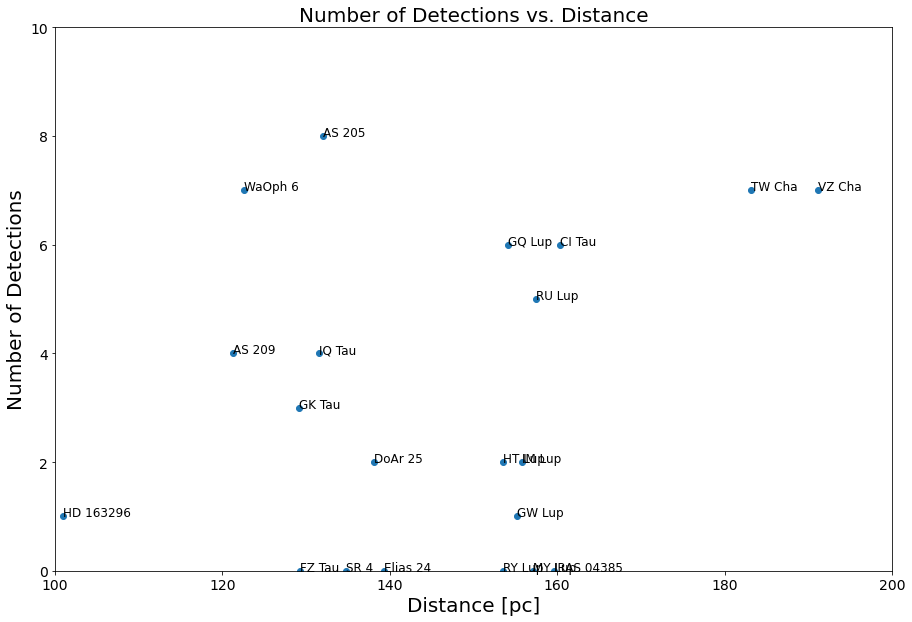

<Figure size 432x288 with 0 Axes>

In [19]:
# send values to plot
star_list = df['Star'].tolist()
dist = df['Distance'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(100,200)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('Number of Detections vs. Distance')

ax.title.set_fontsize(20)
ax.set_xlabel('Distance [pc]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Detections')
ax.yaxis.label.set_fontsize(20)

ax.scatter(dist, totaldetections)

for i, (x, y) in enumerate(zip(dist, totaldetections)):
    ax.text(x,y,star_list[i],fontsize=12)

           

ax.tick_params(axis='both', labelsize=14)


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()
plt.savefig('distance.numb.detec.png')

Conclusion: Interesting... our range is about 100 to 200 pc away. In this range (optimal for JWST observation), there is a slight trend that chemistry increases as distance increases

# Number of Detections vs. Stellar Mass

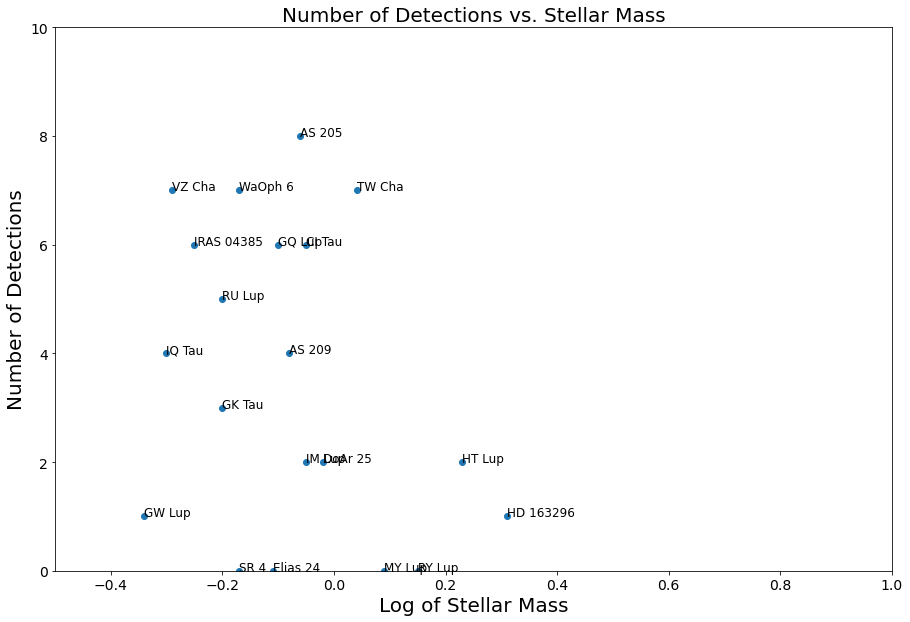

<Figure size 432x288 with 0 Axes>

In [20]:
# suppress targets with no stellar mass entry
dfstellarmass = df.loc[df['Log_Mstar'] != -99]

# redefine mybool with shortened data set

mybool_OH23 = (dfstellarmass.OH_23_2_microns_uncertainty != -99)
mybool_OH23 = mybool_OH23*1

mybool_OH27 = (dfstellarmass.OH_27_6_microns_uncertainty != -99)
mybool_OH27 = mybool_OH27*1

mybool_HCN = (dfstellarmass.HCN_flux_uncertainty != -99)
mybool_HCN = mybool_HCN*1

mybool_C2H2 = (dfstellarmass.C2H2_flux_uncertainty != -99)
mybool_C2H2 = mybool_C2H2*1

mybool_H2O15 = (dfstellarmass.H2O_15_17_uncertainty != -99)
mybool_H2O15 = mybool_H2O15*1

mybool_H2O17 = (dfstellarmass.H2O_17_22_uncertainty != -99)
mybool_H2O17 = mybool_H2O17*1

mybool_H2O29 = (dfstellarmass.H2O_29_85_uncertainty != -99)
mybool_H2O29 = mybool_H2O29*1

mybool_CO2 = (dfstellarmass.CO2_flux_uncertainty != -99)
mybool_CO2 = mybool_CO2*1

mybool_Ne = (dfstellarmass.NeII_12_8_flux_uncertainty != -99)
mybool_Ne = mybool_Ne*1

totaldetections = mybool_OH23 + mybool_OH27 + mybool_HCN + mybool_C2H2 + mybool_H2O15 + mybool_H2O17 + mybool_H2O29 + mybool_CO2 + mybool_Ne

# send values to plot
star_list = dfstellarmass['Star'].tolist()
stellarmass = dfstellarmass['Log_Mstar'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(-0.5,1.0)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('Number of Detections vs. Stellar Mass')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Stellar Mass')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Detections')
ax.yaxis.label.set_fontsize(20)

ax.scatter(stellarmass, totaldetections)

for i, (x, y) in enumerate(zip(stellarmass, totaldetections)):
    ax.text(x,y,star_list[i],fontsize=12)

           

ax.tick_params(axis='both', labelsize=14)


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()
plt.savefig('stellarmass.numb.detec.png')

Conclusion: See a general trend that as star gets more massive, fewer detections, which makes sense. 

# Number of Detections vs. Stellar Age
- Predict that detections will increase with age? More chemistry is formed and a less optically thick environment?

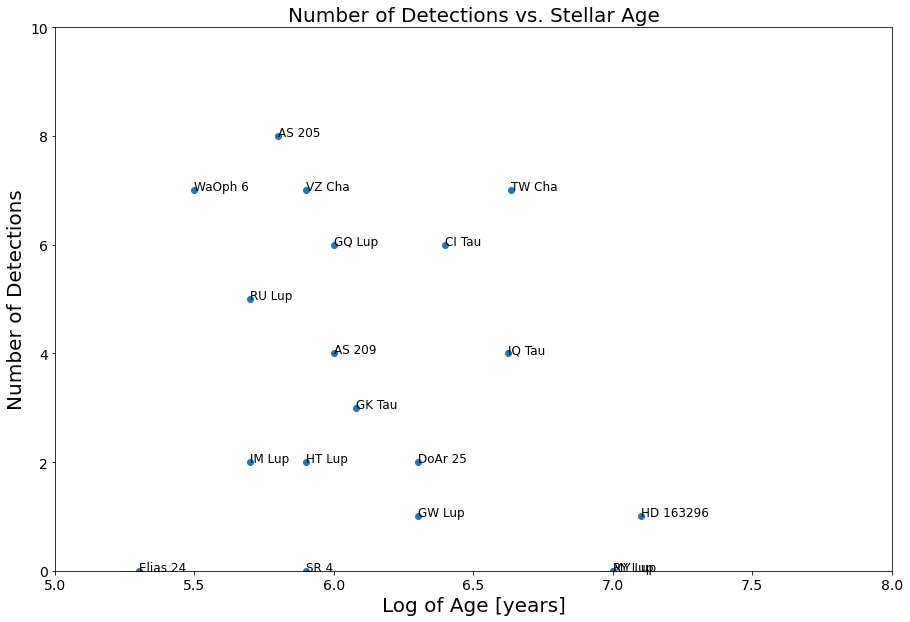

In [21]:
# suppress targets with no stellar mass entry
dfage = df.loc[df['log_tstar'] != -99]

# redefine mybool with shortened data set

mybool_OH23 = (dfage.OH_23_2_microns_uncertainty != -99)
mybool_OH23 = mybool_OH23*1

mybool_OH27 = (dfage.OH_27_6_microns_uncertainty != -99)
mybool_OH27 = mybool_OH27*1

mybool_HCN = (dfage.HCN_flux_uncertainty != -99)
mybool_HCN = mybool_HCN*1

mybool_C2H2 = (dfage.C2H2_flux_uncertainty != -99)
mybool_C2H2 = mybool_C2H2*1

mybool_H2O15 = (dfage.H2O_15_17_uncertainty != -99)
mybool_H2O15 = mybool_H2O15*1

mybool_H2O17 = (dfage.H2O_17_22_uncertainty != -99)
mybool_H2O17 = mybool_H2O17*1

mybool_H2O29 = (dfage.H2O_29_85_uncertainty != -99)
mybool_H2O29 = mybool_H2O29*1

mybool_CO2 = (dfage.CO2_flux_uncertainty != -99)
mybool_CO2 = mybool_CO2*1

mybool_Ne = (dfage.NeII_12_8_flux_uncertainty != -99)
mybool_Ne = mybool_Ne*1


totaldetections = mybool_OH23 + mybool_OH27 + mybool_HCN + mybool_C2H2 + mybool_H2O15 + mybool_H2O17 + mybool_H2O29 + mybool_CO2 + mybool_Ne

# send values to plot
star_list = dfage['Star'].tolist()
age = dfage['log_tstar'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(5,8)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('Number of Detections vs. Stellar Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Age [years]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Detections')
ax.yaxis.label.set_fontsize(20)

ax.scatter(age, totaldetections)

for i, (x, y) in enumerate(zip(age, totaldetections)):
    ax.text(x,y,star_list[i],fontsize=12)

           

ax.tick_params(axis='both', labelsize=14)


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()

Conclusion: See a general trend that as the star gets older, there is less chemistry detected

# Number of Detections vs. Disk Radius
Prediction: As radius grows, there will be less chemistry. Small disks will have richer chemistry inward towards the star. 

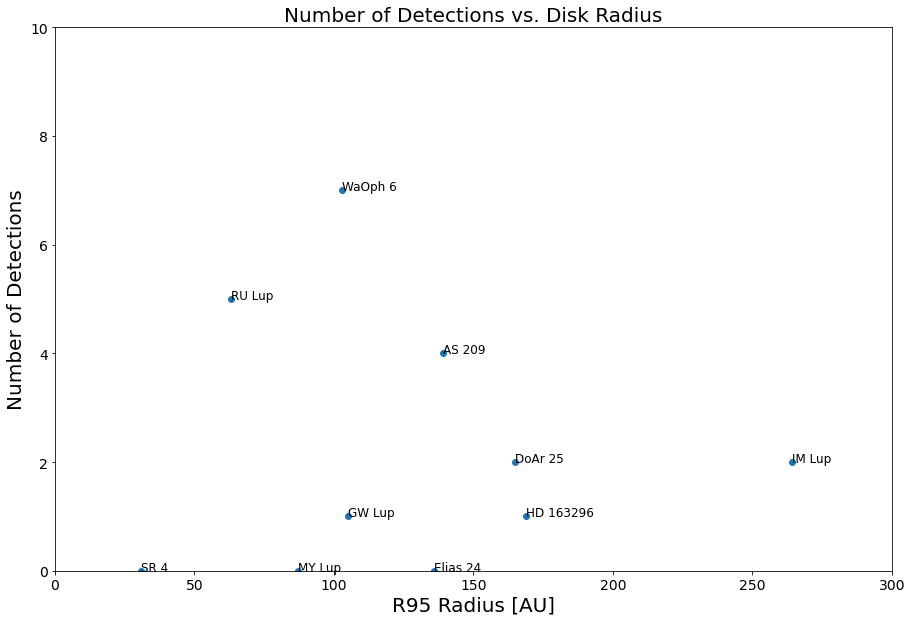

In [22]:
#R95

# suppress -99 characteristic
dfrad95 = df.loc[df['R95'] != -99]

# redefine mybool with shortened data set

mybool_OH23 = (dfrad95.OH_23_2_microns_uncertainty != -99)
mybool_OH23 = mybool_OH23*1

mybool_OH27 = (dfrad95.OH_27_6_microns_uncertainty != -99)
mybool_OH27 = mybool_OH27*1

mybool_HCN = (dfrad95.HCN_flux_uncertainty != -99)
mybool_HCN = mybool_HCN*1

mybool_C2H2 = (dfrad95.C2H2_flux_uncertainty != -99)
mybool_C2H2 = mybool_C2H2*1

mybool_H2O15 = (dfrad95.H2O_15_17_uncertainty != -99)
mybool_H2O15 = mybool_H2O15*1

mybool_H2O17 = (dfrad95.H2O_17_22_uncertainty != -99)
mybool_H2O17 = mybool_H2O17*1

mybool_H2O29 = (dfrad95.H2O_29_85_uncertainty != -99)
mybool_H2O29 = mybool_H2O29*1

mybool_CO2 = (dfrad95.CO2_flux_uncertainty != -99)
mybool_CO2 = mybool_CO2*1

mybool_Ne = (dfrad95.NeII_12_8_flux_uncertainty != -99)
mybool_Ne = mybool_Ne*1


totaldetections = mybool_OH23 + mybool_OH27 + mybool_HCN + mybool_C2H2 + mybool_H2O15 + mybool_H2O17 + mybool_H2O29 + mybool_CO2 + mybool_Ne

# send values to plot
star_list = dfrad95['Star'].tolist()
R95 = dfrad95['R95'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0,300)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('Number of Detections vs. Disk Radius')

ax.title.set_fontsize(20)
ax.set_xlabel('R95 Radius [AU]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Detections')
ax.yaxis.label.set_fontsize(20)

ax.scatter(R95, totaldetections)

for i, (x, y) in enumerate(zip(R95, totaldetections)):
    ax.text(x,y,star_list[i],fontsize=12)

           

ax.tick_params(axis='both', labelsize=14)


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()

# Questions following this first analysis:
- Would it be more compelling to group detections that occur frequently together, that are tied to a purpose?

# Subfeatures vs. Number of Detections
- Thinking Number of detections on x axis, 0 - 8 by group 
   - Y axis is percentage in each group with a subfeature type present
   - Similar to Anna's plots

In [23]:
#import statement
from matplotlib import ticker

#create blank figure
plt.figure(figsize=(9.6,7.2))

#spiral data
# number each group that have spirals / number in each group
spiral1= len(totaldetections ==1 & ['Disk_has_spirals'] == 'TRUE'  ) / (len(totaldetections == 1)
spiral2= len(oh[oh['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral3= len(hcn[hcn['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral4= len(c2h2[c2h2['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral5= len(co2[co2['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral6= len(neii[neii['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))


SyntaxError: invalid syntax (2800668526.py, line 10)

# Line Flux Ratios vs. Characteristics
Goal: Analyze all possible line flux ratios vs. characteristics
Questions:
- Do some ratios make more "sense" from either a chemistry or planetary science perspective? For example, when you have HCN, H2O is more likely to be present... Should I do this more strategically? 
- Is there a more compelling wavelength to pick for water and OH? I will do all of them for now
    - I could plot them all on the same chart
Thoughts:
- We do not have radial distribution information yet

How: 
- For each ratio, a source needs detections of both chemical
    - Maybe for each ratio, df.loc(chem 1 and chem 1 are not -99)
    - Could start with known ratios and see if I get a similar trend
- Assign a new variable, chem 1 / chem 2, y axis
- Plot a characteristic on the x axis. Ones I'm interested in:
- Scatter Plot:
    - Age
    - Radius
    - Temperature
- Bar Chart:
    - Subfeature type
    - Disk type (ie, transition disk)
    - Star system
    

In [25]:
df = pd.DataFrame(output1, columns= ['Star','Distance','Disk_has_Rings','Region','Log_Mstar','Mdisk','T_eff','uncertainty_Teff',
                                     'log_Lstar',
                                     'bright_ring_number','Spectral_Type','R95','R90','R68',
                                     'log_accretion_rate','Accrection_rate',
                                     'disk_inclination','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])

# HCN vs. H20

In [26]:
# suppress -99 values
#nodetections = df.loc[(df['OH_23_2_microns_uncertainty']== -99)& (df['OH_27_6_microns_uncertainty']==-99)
 #                      &(df['HCN_flux_uncertainty']==-99)&(df['C2H2_flux_uncertainty']==-99)
#                       &(df['H2O_15_17_uncertainty']==-99)&(df['H2O_17_22_uncertainty']==-99)
#                       &(df['H2O_17_22_uncertainty']==-99)&(df['H2O_29_85_uncertainty']==-99)
 #                      &(df['CO2_flux_uncertainty']==-99)&(df['NeII_12_8_flux_uncertainty']==-99)]

# HCN vs. H20 15.17 micron
hcnh2o15 = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcnh2o15nondethcn = df.loc[(df['HCN_flux'] != -99)&(df['HCN_flux_uncertainty'] == -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcnh2o15nondeth2o = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_microns'] != -99)&(df['H2O_15_17_uncertainty'] == -99)]
hcnh2o15nondetboth = df.loc[(df['HCN_flux'] != -99)&(df['HCN_flux_uncertainty'] == -99)
                            &(df['H2O_15_17_microns'] != -99)&(df['H2O_15_17_uncertainty'] == -99)]

hcn_vs_h2o15 = (hcnh2o15['HCN_flux'])/(hcnh2o15['H2O_15_17_microns'])



# HCN vs. H20 17.22 micron
hcnh2o17 = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
# Non detections
hcnh2o17nondethcn = df.loc[(df['HCN_flux'] != -99)&(df['HCN_flux_uncertainty'] == -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcnh2o17nondeth2o = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_microns'] != -99)&(df['H2O_17_22_uncertainty'] == -99)]
hcnh2o17nondetboth = df.loc[(df['HCN_flux'] != -99)&(df['HCN_flux_uncertainty'] == -99)
                            &(df['H2O_17_22_microns'] != -99)&(df['H2O_17_22_uncertainty'] == -99)]

hcn_vs_h2o17 = (hcnh2o17['HCN_flux'])/(hcnh2o17['H2O_17_22_microns'])


# HCN vs. H20 29.89 micron
hcnh2o29 = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
# Non detections
hcnh2o29nondethcn = df.loc[(df['HCN_flux'] != -99)&(df['HCN_flux_uncertainty'] == -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcnh2o29nondeth2o = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_microns'] != -99)&(df['H2O_29_85_uncertainty'] == -99)]
hcnh2o29nondetboth = df.loc[(df['HCN_flux'] != -99)&(df['HCN_flux_uncertainty'] == -99)
                            &(df['H2O_29_85_microns'] != -99)&(df['H2O_29_85_uncertainty'] == -99)]

hcn_vs_h2o29 = (hcnh2o29['HCN_flux'])/(hcnh2o29['H2O_29_85_microns'])

hcn_vs_h2o29

3     1.531120
9     2.352941
17    1.613208
18    3.505155
20    1.639769
21    4.127273
22    4.920000
23    2.932331
24    0.775087
dtype: float64

In [27]:
hcnh2o15temp = df.loc[(hcnh2o15['log_tstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]

hcnh2o15temp

,Star,Distance,Disk_has_Rings,Region,Log_Mstar,Mdisk,T_eff,uncertainty_Teff,log_Lstar,bright_ring_number,...,H2O_15_17_microns,H2O_15_17_uncertainty,H2O_17_22_microns,H2O_17_22_uncertainty,H2O_29_85_microns,H2O_29_85_uncertainty,CO2_flux,CO2_flux_uncertainty,NeII_12_8_flux,NeII_12_8_flux_uncertainty
3,RU Lup,157.508447,TRUE,Lup II,-0.200000,0.042619,4073.80,187.61,0.160,4,...,2.500000e-17,1.300000e-18,3.490000e-17,1.400000e-18,2.410000e-17,8.000000e-19,1.410000e-17,3.100000e-18,9.200000e-17,-9.900000e+01
9,AS 205,132.059618,FALSE,Upper Sco,-0.060000,0.029000,4265.80,294.67,0.330,-99,...,1.160000e-16,6.500000e-18,1.820000e-16,7.400000e-18,9.350000e-17,4.800000e-18,2.330000e-16,1.600000e-17,2.700000e-16,-9.900000e+01
17,WaOph 6,122.527084,TRUE,Oph N 3a,-0.170000,0.077000,4168.69,287.96,0.460,1,...,1.570000e-17,7.000000e-19,1.540000e-17,7.000000e-19,1.060000e-17,5.000000e-19,2.560000e-17,1.700000e-18,4.300000e-17,-9.900000e+01
21,TW Cha,183.118531,-99,Cha I south,0.041393,0.008803,3995.00,-99.00,-0.190,-99,...,6.100000e-18,2.000000e-19,1.040000e-17,3.000000e-19,5.500000e-18,2.000000e-19,2.200000e-18,-9.900000e+01,1.100000e-17,-9.900000e+01
22,VZ Cha,191.125728,-99,Cha I,-0.290000,0.018000,3780.00,-99.00,-0.260,-99,...,9.400000e-18,5.000000e-19,1.390000e-17,5.000000e-19,7.500000e-18,2.000000e-19,4.800000e-18,-9.900000e+01,2.600000e-17,-9.900000e+01
23,GQ Lup,154.099670,TRUE,-99,-0.100000,-99.000000,4192.00,65.00,-0.040,2,...,7.100000e-18,6.000000e-19,1.390000e-17,6.000000e-19,1.330000e-17,4.000000e-19,5.600000e-18,-9.900000e+01,2.700000e-17,-9.900000e+01
26,CI Tau,160.317771,TRUE,Taurus Molecular Cloud,-0.050610,0.040541,4277.00,-99.00,-0.092,-99,...,1.310000e-17,1.410000e-18,1.010000e-17,2.870000e-18,1.540000e-17,-9.900000e+01,5.860000e-18,1.090000e-18,6.530000e-18,6.560000e-19
28,IQ Tau,131.511965,TRUE,Taurus Molecular Cloud,-0.301030,-99.000000,3690.00,-99.00,-0.610,-99,...,5.700000e-18,1.000000e-18,9.000000e-18,9.000000e-19,5.100000e-18,-9.900000e+01,1.020000e-17,-9.900000e+01,2.500000e-17,-9.900000e+01


# HCN vs. H2O Plot

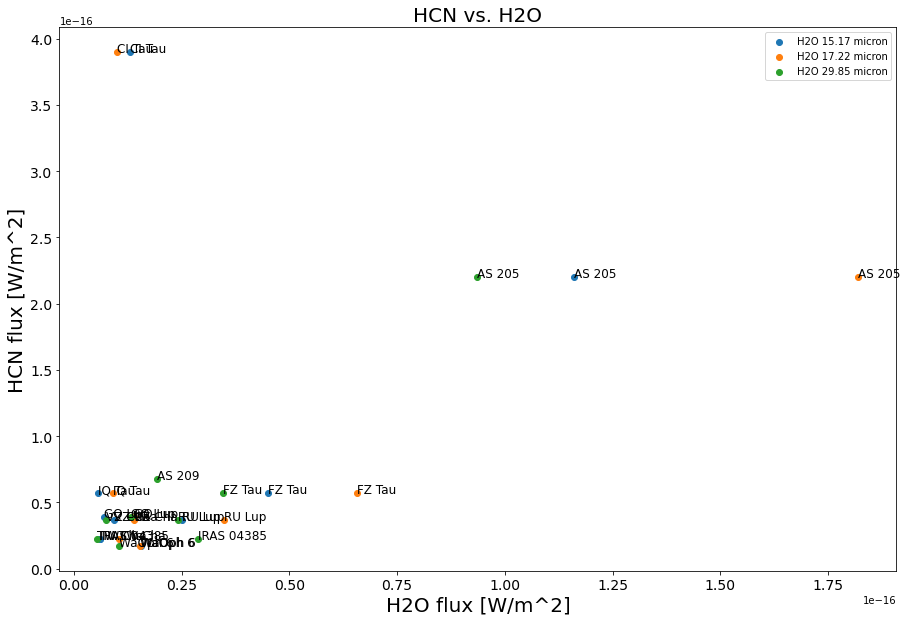

In [28]:
hcn_vs_h2o15_hcn = hcnh2o15['HCN_flux']
hcn_vs_h2o15_h2o = hcnh2o15['H2O_15_17_microns']

hcn_vs_h2o17_hcn = hcnh2o17['HCN_flux']
hcn_vs_h2o17_h2o = hcnh2o17['H2O_17_22_microns']

hcn_vs_h2o29_hcn = hcnh2o29['HCN_flux']
hcn_vs_h2o29_h2o = hcnh2o29['H2O_29_85_microns']

# send values to plot
star_list15 = hcnh2o15['Star'].tolist()

star_list17 = hcnh2o17['Star'].tolist()

star_list29 = hcnh2o29['Star'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

#ax.set_xlim(5,7)
#ax.set_ylim(0, 40)
#ax.grid()
ax.set_title('HCN vs. H2O')

ax.title.set_fontsize(20)
ax.set_xlabel('H2O flux [W/m^2]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN flux [W/m^2]')
ax.yaxis.label.set_fontsize(20)

ax.scatter(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn,label='H2O 15.17 micron')
ax.scatter(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn, label='H2O 17.22 micron')
ax.scatter(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn,label='H2O 29.85 micron')

for i, (x, y) in enumerate(zip(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn)):
    ax.text(x,y,star_list15[i],fontsize=12)

for i, (x, y) in enumerate(zip(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn)):
    ax.text(x,y,star_list17[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn)):
    ax.text(x,y,star_list29[i],fontsize=12)      

ax.tick_params(axis='both', labelsize=14)
ax.legend()


# HCN vs. H2O subplots x H2O wavelength

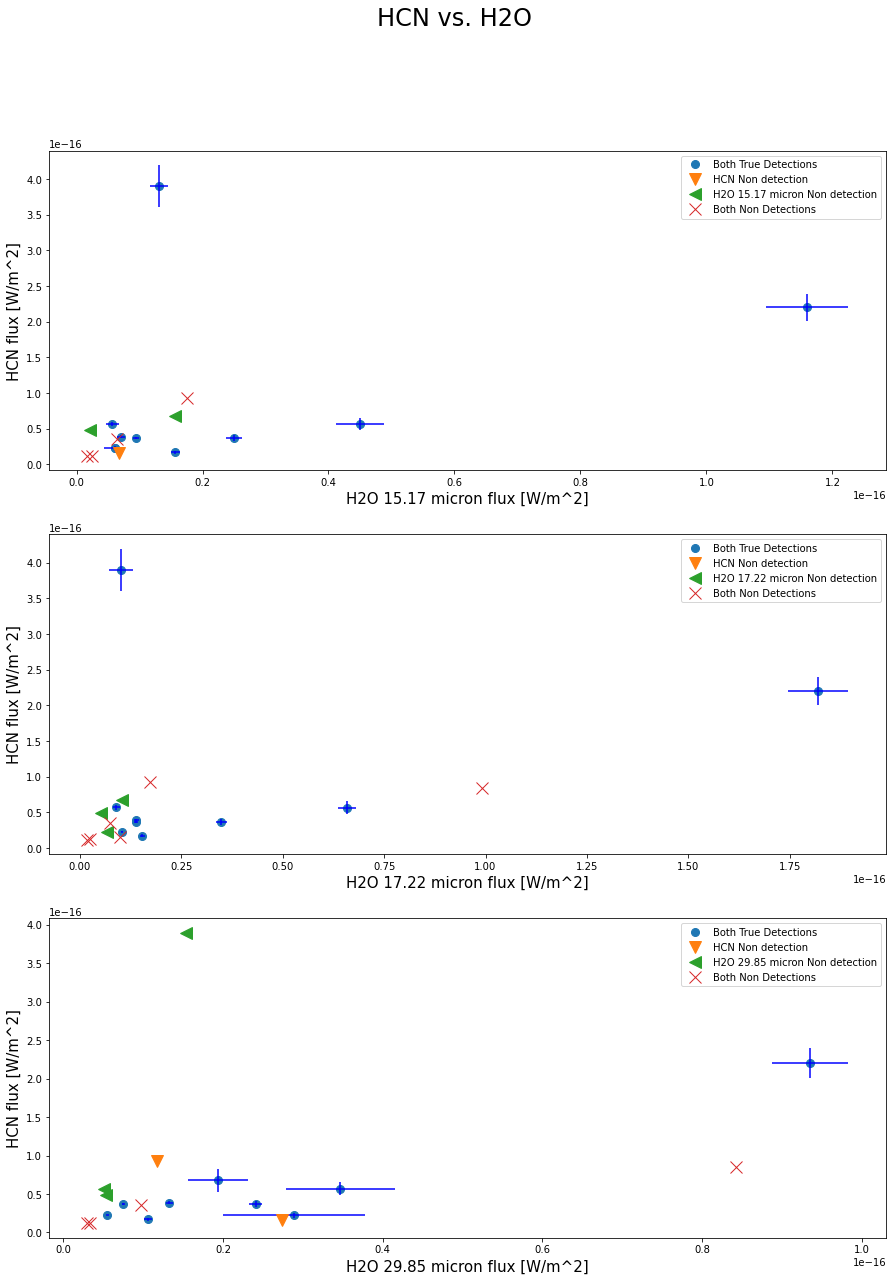

In [29]:
# H2O 15.17
# both true detections
hcn_vs_h2o15_hcn = hcnh2o15['HCN_flux']
hcn_vs_h2o15_h2o = hcnh2o15['H2O_15_17_microns']
hcn_vs_h2o15_h2oerror = hcnh2o15['H2O_15_17_uncertainty']
hcn_vs_h2o15_hcnerror = hcnh2o15['HCN_flux_uncertainty']
#hcn_vs_h2o15_error = np.sqrt( (hcnh2o15['HCN_flux_uncertainty']*hcnh2o15['HCN_flux_uncertainty']) +
#                               (hcnh2o15['H2O_15_17_uncertainty']*hcnh2o15['H2O_15_17_uncertainty'])  )
# non detections
# HCN non detec
hcnnon_vs_h2o15_hcn = hcnh2o15nondethcn['HCN_flux']
hcnnon_vs_h2o15_h2o = hcnh2o15nondethcn['H2O_15_17_microns']
hcnnon_vs_h2o15_error = hcnh2o15nondethcn['H2O_15_17_uncertainty']
# Water non detec
hcn_vs_h2o15non_hcn = hcnh2o15nondeth2o['HCN_flux']
hcn_vs_h2o15non_h2o = hcnh2o15nondeth2o['H2O_15_17_microns']
hcn_vs_h2o15non_error = hcnh2o15nondeth2o['HCN_flux_uncertainty']
# both non detec
nonhcn_vs_h2o15_hcn = hcnh2o15nondetboth['HCN_flux']
nonhcn_vs_h2o15_h2o = hcnh2o15nondetboth['H2O_15_17_microns']

# H2O 17.22
# both true detections
hcn_vs_h2o17_hcn = hcnh2o17['HCN_flux']
hcn_vs_h2o17_h2o = hcnh2o17['H2O_17_22_microns']
hcn_vs_h2o17_h2oerror = hcnh2o17['H2O_17_22_uncertainty']
hcn_vs_h2o17_hcnerror = hcnh2o17['HCN_flux_uncertainty']
# non detections
hcnnon_vs_h2o17_hcn = hcnh2o17nondethcn['HCN_flux']
hcnnon_vs_h2o17_h2o = hcnh2o17nondethcn['H2O_17_22_microns']
hcn_vs_h2o17non_hcn = hcnh2o17nondeth2o['HCN_flux']
hcn_vs_h2o17non_h2o = hcnh2o17nondeth2o['H2O_17_22_microns']
nonhcn_vs_h2o17_hcn = hcnh2o17nondetboth['HCN_flux']
nonhcn_vs_h2o17_h2o = hcnh2o17nondetboth['H2O_17_22_microns']

#H20 29
hcn_vs_h2o29_hcn = hcnh2o29['HCN_flux']
hcn_vs_h2o29_h2o = hcnh2o29['H2O_29_85_microns']
hcn_vs_h2o29_h2oerror = hcnh2o29['H2O_29_85_uncertainty']
hcn_vs_h2o29_hcnerror = hcnh2o29['HCN_flux_uncertainty']
# non detections
hcnnon_vs_h2o29_hcn = hcnh2o29nondethcn['HCN_flux']
hcnnon_vs_h2o29_h2o = hcnh2o29nondethcn['H2O_29_85_microns']
hcn_vs_h2o29non_hcn = hcnh2o29nondeth2o['HCN_flux']
hcn_vs_h2o29non_h2o = hcnh2o29nondeth2o['H2O_29_85_microns']
nonhcn_vs_h2o29_hcn = hcnh2o29nondetboth['HCN_flux']
nonhcn_vs_h2o29_h2o = hcnh2o29nondetboth['H2O_29_85_microns']

# send values to plot
star_list15 = hcnh2o15['Star'].tolist()
star_list15a = hcnh2o15nondethcn['Star'].tolist()
star_list15b = hcnh2o15nondeth2o['Star'].tolist()
star_list15c = hcnh2o15nondetboth['Star'].tolist()

star_list17 = hcnh2o17['Star'].tolist()
star_list17a = hcnh2o17nondethcn['Star'].tolist()
star_list17b = hcnh2o17nondeth2o['Star'].tolist()
star_list17c = hcnh2o17nondetboth['Star'].tolist()

star_list29 = hcnh2o29['Star'].tolist()
star_list29a = hcnh2o29nondethcn['Star'].tolist()
star_list29b = hcnh2o29nondeth2o['Star'].tolist()
star_list29c = hcnh2o29nondetboth['Star'].tolist()


fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
# make a little extra space between the subplots
#fig.subplots_adjust(hspace=0.5)
fig.suptitle('HCN vs. H2O',fontsize=24)

# H20 15
ax1.plot(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax1.errorbar(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn,hcn_vs_h2o15_hcnerror,hcn_vs_h2o15_h2oerror,linestyle='',color='b')
ax1.plot(hcnnon_vs_h2o15_h2o, hcnnon_vs_h2o15_hcn, label='HCN Non detection',linestyle='',marker = "v",markersize=12)
#ax1.errorbar(hcnnon_vs_h2o15_h2o, hcnnon_vs_h2o15_hcn,yerr=None,xerr=hcnnon_vs_h2o15_error,linestyle='',color='orange')
ax1.plot(hcn_vs_h2o15non_h2o, hcn_vs_h2o15non_hcn,label='H2O 15.17 micron Non detection',linestyle='',marker="<",markersize=12)
ax1.plot(nonhcn_vs_h2o15_h2o, nonhcn_vs_h2o15_hcn,label='Both Non Detections',linestyle='',marker='x',markersize=12)

ax1.title.set_fontsize(20)
ax1.set_xlabel('H2O 15.17 micron flux [W/m^2]')
ax1.xaxis.label.set_fontsize(15)
ax1.set_ylabel('HCN flux [W/m^2]')
ax1.yaxis.label.set_fontsize(15)
ax1.legend()

# H20 17
ax2.plot(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax2.errorbar(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn,hcn_vs_h2o17_hcnerror,hcn_vs_h2o17_h2oerror,linestyle='',color='b')
ax2.plot(hcnnon_vs_h2o17_h2o, hcnnon_vs_h2o17_hcn, label='HCN Non detection',linestyle='',marker = "v",markersize=12)
ax2.plot(hcn_vs_h2o17non_h2o, hcn_vs_h2o17non_hcn,label='H2O 17.22 micron Non detection',linestyle='',marker="<",markersize=12)
ax2.plot(nonhcn_vs_h2o17_h2o, nonhcn_vs_h2o17_hcn,label='Both Non Detections',linestyle='',marker='x',markersize=12)
ax2.title.set_fontsize(20)
ax2.set_xlabel('H2O 17.22 micron flux [W/m^2]')
ax2.xaxis.label.set_fontsize(15)
ax2.set_ylabel('HCN flux [W/m^2]')
ax2.yaxis.label.set_fontsize(15)
ax2.legend()

# H20 29
ax3.plot(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax3.errorbar(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn,hcn_vs_h2o29_hcnerror,hcn_vs_h2o29_h2oerror,linestyle='',color='b')
ax3.plot(hcnnon_vs_h2o29_h2o, hcnnon_vs_h2o29_hcn, label='HCN Non detection',linestyle='',marker = "v",markersize=12)
ax3.plot(hcn_vs_h2o29non_h2o, hcn_vs_h2o29non_hcn,label='H2O 29.85 micron Non detection',linestyle='',marker="<",markersize=12)
ax3.plot(nonhcn_vs_h2o29_h2o, nonhcn_vs_h2o29_hcn,label='Both Non Detections',linestyle='',marker='x',markersize=12)

ax3.title.set_fontsize(20)
ax3.set_xlabel('H2O 29.85 micron flux [W/m^2]')
ax3.xaxis.label.set_fontsize(15)
ax3.set_ylabel('HCN flux [W/m^2]')
ax3.yaxis.label.set_fontsize(15)
ax3.legend()


# Star Names, H2o 15.17 plot
#for i, (x, y) in enumerate(zip(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn)):
#    ax1.text(x,y,star_list15[i],fontsize=12)
#for i, (x, y) in enumerate(zip(hcnnon_vs_h2o15_h2o, hcnnon_vs_h2o15_hcn)):
 #   ax1.text(x,y,star_list15a[i],fontsize=12)
#for i, (x, y) in enumerate(zip(hcn_vs_h2o15non_h2o, hcn_vs_h2o15non_hcn)):
 #   ax1.text(x,y,star_list15b[i],fontsize=12)
#for i, (x, y) in enumerate(zip(nonhcn_vs_h2o17_h2o, nonhcn_vs_h2o17_hcn)):
#    ax1.text(x,y,star_list15c[i],fontsize=12)

# STar Names, H2o 17.22 plot
#for i, (x, y) in enumerate(zip(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn)):
#    ax2.text(x,y,star_list17[i],fontsize=12)  

# Stat names, H20 29.85 plot
#for i, (x, y) in enumerate(zip(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn)):
#    ax3.text(x,y,star_list29[i],fontsize=12)      

#plt.savefig('HCN.H2o.1.png')

Next: Vet pulling in the right data
Propagation of error for ratios
Fix for loop pulling in markers

Conclusion: This is a good indicator that CI Tau needs to be revisited 
The scales are quite different. Without AS 205 or CI Tau, it would be about square. That might be more interesting to look at. Ideas for markers? 
One plot:
Rings
Spirals
Assym
Another:
single
double 

# HCN vs. H2O vs. Rings

['TRUE', 'FALSE', 'TRUE', '-99', '-99', '-99', 'TRUE', '-99', 'TRUE', 'TRUE']
['TRUE', 'FALSE', 'TRUE', '-99', '-99', '-99', 'TRUE', 'TRUE', 'TRUE']
['TRUE', 'FALSE', 'TRUE', 'TRUE', '-99', '-99', '-99', 'TRUE', '-99']


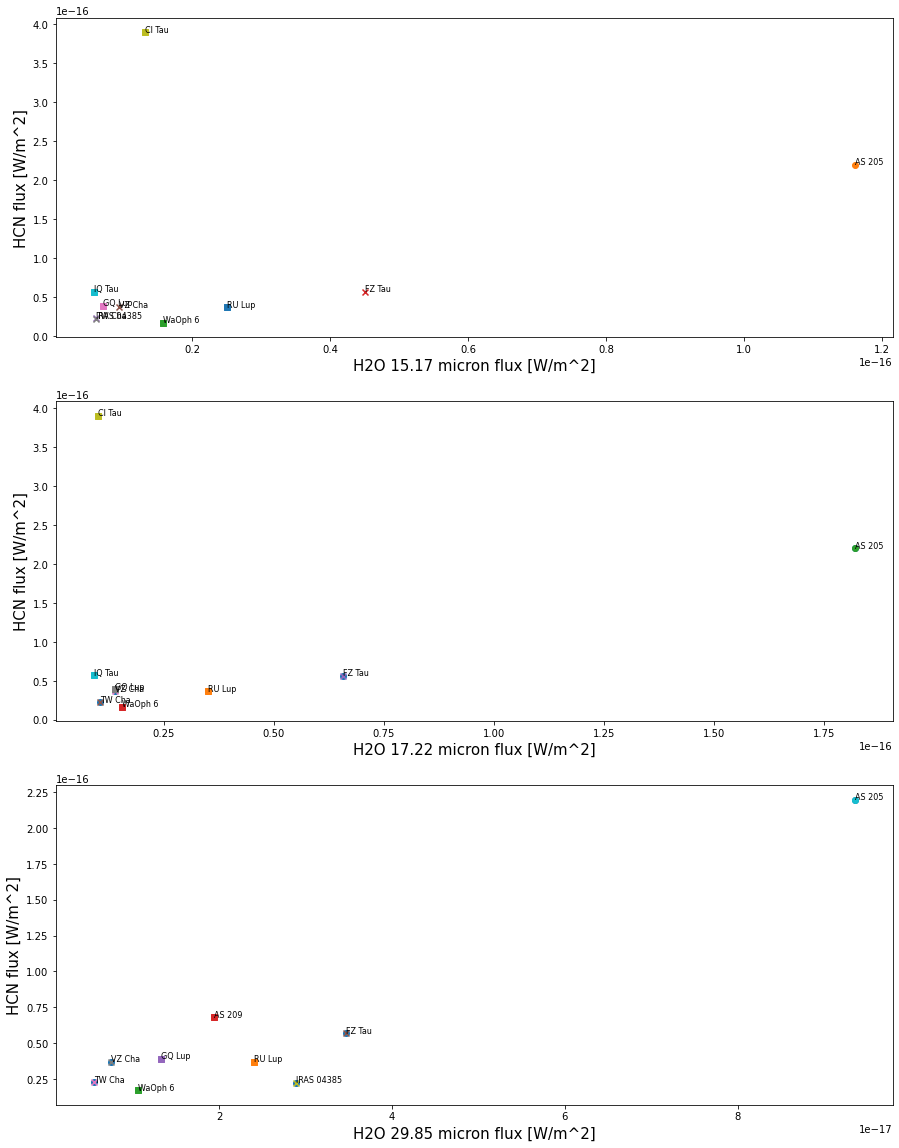

In [30]:
hcn_vs_h2o15_hcn = hcnh2o15['HCN_flux']
hcn_vs_h2o15_h2o = hcnh2o15['H2O_15_17_microns']

hcn_vs_h2o17_hcn = hcnh2o17['HCN_flux']
hcn_vs_h2o17_h2o = hcnh2o17['H2O_17_22_microns']

hcn_vs_h2o29_hcn = hcnh2o29['HCN_flux']
hcn_vs_h2o29_h2o = hcnh2o29['H2O_29_85_microns']

# send values to plot
star_list15 = hcnh2o15['Star'].tolist()
rings15 = hcnh2o15['Disk_has_Rings'].tolist()

star_list17 = hcnh2o17['Star'].tolist()
rings17 = hcnh2o17['Disk_has_Rings'].tolist()

star_list29 = hcnh2o29['Star'].tolist()
rings29 = hcnh2o29['Disk_has_Rings'].tolist()

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
# make a little extra space between the subplots
#fig.subplots_adjust(hspace=0.5)
#fig.suptitle('HCN vs. H2O')


#ax1.scatter(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn,label='H2O 15.17 micron')
ax1.title.set_fontsize(20)
ax1.set_xlabel('H2O 15.17 micron flux [W/m^2]')
ax1.xaxis.label.set_fontsize(15)
ax1.set_ylabel('HCN flux [W/m^2]')
ax1.yaxis.label.set_fontsize(15)
for i, (x, y) in enumerate(zip(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn)):
    ax1.text(x,y,star_list15[i],fontsize=8)
    if rings15[i] == 'TRUE':
        ax1.scatter(x,y,marker="s") 
    elif rings15[i] == 'FALSE':
        ax1.scatter(x,y,marker="o") 
    else:
        ax1.scatter(x,y,marker="x")

ax2.scatter(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn, label='H2O 17.22 micron')
ax2.title.set_fontsize(20)
ax2.set_xlabel('H2O 17.22 micron flux [W/m^2]')
ax2.xaxis.label.set_fontsize(15)
ax2.set_ylabel('HCN flux [W/m^2]')
ax2.yaxis.label.set_fontsize(15)
for j, (x, y) in enumerate(zip(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn)):
    ax2.text(x,y,star_list17[j],fontsize=8)
    if rings17[j] == 'TRUE':
        ax2.scatter(x,y,marker="s") 
    elif rings17[j] == 'FALSE':
        ax2.scatter(x,y,marker="o") 
    else:
        ax2.scatter(x,y,marker="x") 

ax3.scatter(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn,label='H2O 29.85 micron')
ax3.title.set_fontsize(20)
ax3.set_xlabel('H2O 29.85 micron flux [W/m^2]')
ax3.xaxis.label.set_fontsize(15)
ax3.set_ylabel('HCN flux [W/m^2]')
ax3.yaxis.label.set_fontsize(15)
for k, (x, y) in enumerate(zip(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn)):
    ax3.text(x,y,star_list29[k],fontsize=8) 
for k, (x, y) in enumerate(zip(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn)):
    if rings29[k] == 'TRUE':
        ax3.scatter(x,y,marker="s") 
for k, (x, y) in enumerate(zip(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn)):
    if rings29[k] == '-99':
        ax3.scatter(x,y,marker="x") 
for k, (x, y) in enumerate(zip(hcn_vs_h2o29_h2o, hcn_vs_h2o29_hcn)):
    if rings29[k] == 'FALSE':
        ax3.scatter(x,y,marker="o") 



# Marker for loop    
#for i, (x, y) in enumerate(zip(hcn_vs_h2o15_h2o, hcn_vs_h2o15_hcn)):
#    if rings15[i] == 'TRUE':
 #       ax1.scatter(x,y,marker="s") 
  #  elif rings15[i] == 'FALSE':
   #     ax1.scatter(x,y,marker="o") 
    #else:
     #   ax1.scatter(x,y,marker="x")



    
#ax.legend()

print(rings15)

print(rings17)
print(rings29)

# HCN / H20 vs. Age

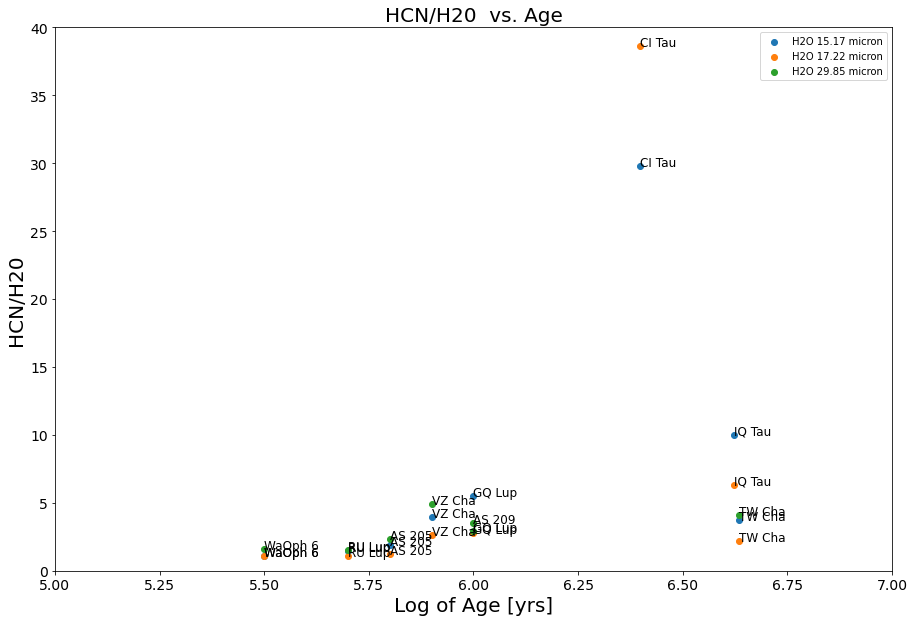

In [31]:
# suppress -99 characteristic values
# note: called variables temp bc thought log tstar was temp not age 
hcnh2o15temp = df.loc[(hcnh2o15['log_tstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]

hcnh2o15temp

hcn_vs_h2o15temp = (hcnh2o15temp['HCN_flux'])/(hcnh2o15temp['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17temp = df.loc[(hcnh2o17['log_tstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]

hcnh2o17temp

hcn_vs_h2o17temp = (hcnh2o17temp['HCN_flux'])/(hcnh2o17temp['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29temp = df.loc[(hcnh2o29['log_tstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]

hcnh2o29temp

hcn_vs_h2o29temp = (hcnh2o29temp['HCN_flux'])/(hcnh2o29temp['H2O_29_85_microns'])

# send values to plot
star_list15 = hcnh2o15temp['Star'].tolist()
age15 = hcnh2o15temp['log_tstar'].tolist()

star_list17 = hcnh2o17temp['Star'].tolist()
age17 = hcnh2o17temp['log_tstar'].tolist()

star_list29 = hcnh2o29temp['Star'].tolist()
age29 = hcnh2o29temp['log_tstar'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(5,7)
ax.set_ylim(0, 40)
#ax.grid()
ax.set_title('HCN/H20  vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Age [yrs]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/H20')
ax.yaxis.label.set_fontsize(20)

ax.scatter(age15, hcn_vs_h2o15temp,label='H2O 15.17 micron')
ax.scatter(age17, hcn_vs_h2o17temp,label='H2O 17.22 micron')
ax.scatter(age29, hcn_vs_h2o29temp,label='H2O 29.85 micron')

for i, (x, y) in enumerate(zip(age15, hcn_vs_h2o15temp)):
    ax.text(x,y,star_list15[i],fontsize=12)

for i, (x, y) in enumerate(zip(age17, hcn_vs_h2o17temp)):
    ax.text(x,y,star_list17[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(age29, hcn_vs_h2o29temp)):
    ax.text(x,y,star_list29[i],fontsize=12)      

ax.tick_params(axis='both', labelsize=14)
ax.legend()


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Wow! I was not expecting to see a correlation. We have few data points, but this plot suggests that as the star ages, HCN predominates water. 
Could this imply that more HCN is created, perhaps from water? (My chemistry knowledge is lacking) Does this have an implication on the water present during planet formation?
I am interested why CI Tau is an outlier. What kind of disk is it (transition?)? It's spec type? 
I also wonder if large age error impacts this result. I will add age error bars, and flux error.


# HCN / H20 vs. Disk Mass (removed CI Tau & DoAR 25)

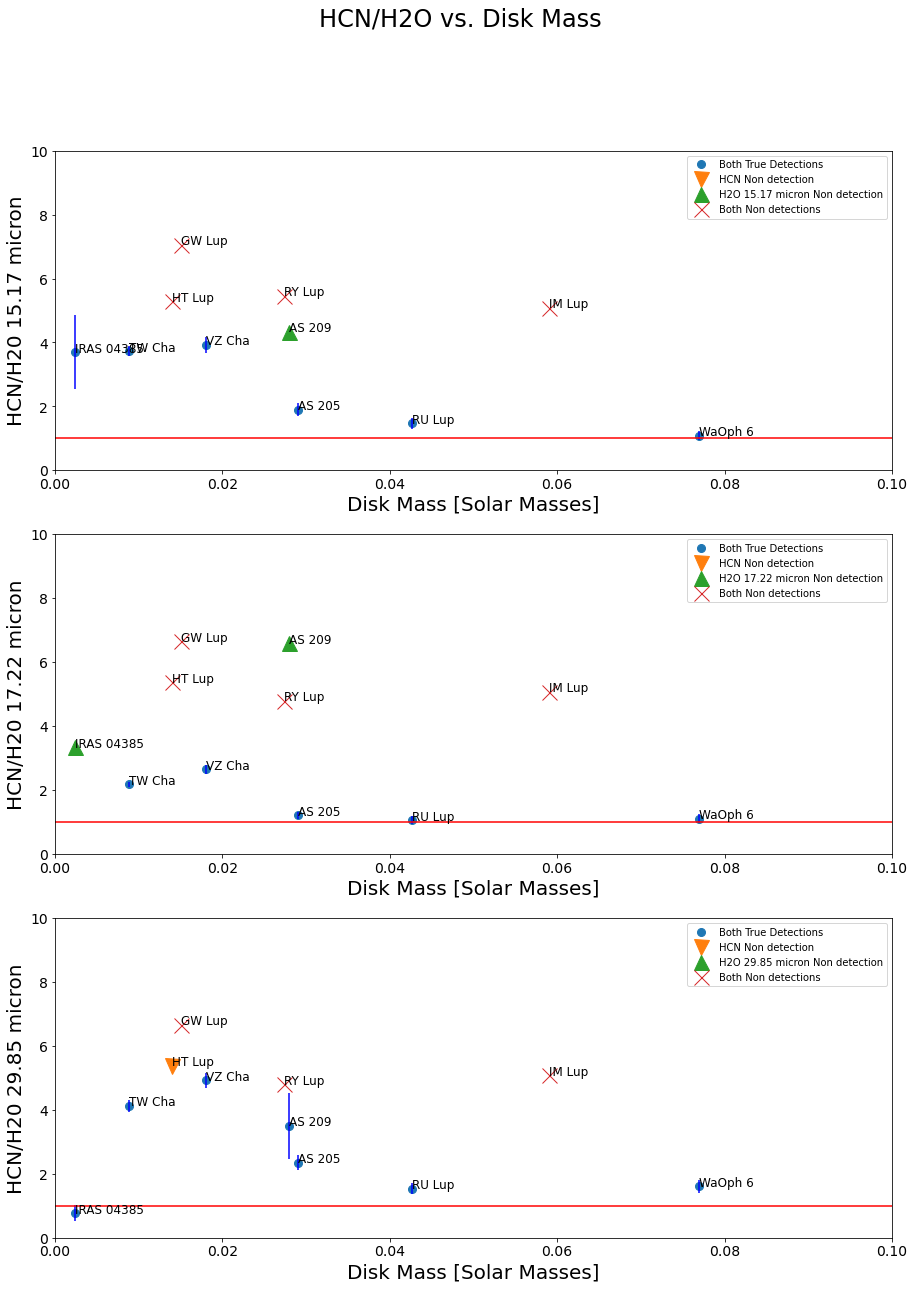

In [32]:
# H20 15
hcnh2o15diskm = df.loc[(hcnh2o15['Mdisk'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)
                      &(df['Star'] != 'CI Tau')]
hcn_vs_h2o15diskm = (hcnh2o15diskm['HCN_flux'])/(hcnh2o15diskm['H2O_15_17_microns'])
hcn_vs_h2o15error = np.sqrt( ((hcnh2o15diskm['H2O_15_17_uncertainty'])/(hcnh2o15diskm['H2O_15_17_microns']))**2 +
                             ((hcnh2o15diskm['HCN_flux_uncertainty'])/(hcnh2o15diskm['HCN_flux']))**2 ) * hcn_vs_h2o15diskm
# Non detections
hcnh2o15nondethcndiskm = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['Mdisk'] != -99]
hcnnon_vs_h2o15diskm = (hcnh2o15nondethcndiskm['HCN_flux'])/(hcnh2o15nondethcndiskm['H2O_15_17_microns'])
hcnh2o15nondeth2odiskm = hcnh2o15nondeth2o.loc[(hcnh2o15nondeth2o['Mdisk'] != -99) &(hcnh2o15nondeth2o['Star'] != 'DoAr 25')]
hcn_vs_h2o15nondiskm = (hcnh2o15nondeth2odiskm['HCN_flux'])/(hcnh2o15nondeth2odiskm['H2O_15_17_microns'])
hcnh2o15nondetbothdiskm = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['Mdisk'] != -99]
hcn_vs_h2o15bothnondiskm = (hcnh2o15nondetbothdiskm['HCN_flux'])/(hcnh2o15nondetbothdiskm['H2O_15_17_microns'])

# H20 17
hcnh2o17diskm = df.loc[(hcnh2o17['Mdisk'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)
                      &(df['Star'] != 'CI Tau')]
hcn_vs_h2o17diskm = (hcnh2o17diskm['HCN_flux'])/(hcnh2o17diskm['H2O_17_22_microns'])
hcn_vs_h2o17error = np.sqrt( ((hcnh2o17diskm['H2O_17_22_uncertainty'])/(hcnh2o17diskm['H2O_17_22_microns']))**2 +
                             ((hcnh2o17diskm['HCN_flux_uncertainty'])/(hcnh2o17diskm['HCN_flux']))**2 ) * hcn_vs_h2o17diskm
# Non detections
hcnh2o17nondethcndiskm = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['Mdisk'] != -99]
hcnnon_vs_h2o17diskm = (hcnh2o17nondethcndiskm['HCN_flux'])/(hcnh2o17nondethcndiskm['H2O_17_22_microns'])
hcnh2o17nondeth2odiskm = hcnh2o17nondeth2o.loc[(hcnh2o17nondeth2o['Mdisk'] != -99)&(hcnh2o17nondeth2o['Star'] != 'DoAr 25')]
hcn_vs_h2o17nondiskm = (hcnh2o17nondeth2odiskm['HCN_flux'])/(hcnh2o17nondeth2odiskm['H2O_17_22_microns'])
hcnh2o17nondetbothdiskm = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['Mdisk'] != -99]
hcn_vs_h2o17bothnondiskm = (hcnh2o17nondetbothdiskm['HCN_flux'])/(hcnh2o17nondetbothdiskm['H2O_17_22_microns'])

# H20 29
hcnh2o29diskm = df.loc[(hcnh2o29['Mdisk'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29diskm = (hcnh2o29diskm['HCN_flux'])/(hcnh2o29diskm['H2O_29_85_microns'])
hcn_vs_h2o29error = np.sqrt( ((hcnh2o29diskm['H2O_29_85_uncertainty'])/(hcnh2o29diskm['H2O_29_85_microns']))**2 +
                             ((hcnh2o29diskm['HCN_flux_uncertainty'])/(hcnh2o29diskm['HCN_flux']))**2 ) * hcn_vs_h2o29diskm
# Non detections
hcnh2o29nondethcndiskm = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['Mdisk'] != -99]
hcnnon_vs_h2o29diskm = (hcnh2o29nondethcndiskm['HCN_flux'])/(hcnh2o29nondethcndiskm['H2O_17_22_microns'])
hcnh2o29nondeth2odiskm = hcnh2o29nondeth2o.loc[(hcnh2o29nondeth2o['Mdisk'] != -99)&(hcnh2o29nondeth2o['Star'] != 'CI Tau')
                                               &(hcnh2o29nondeth2o['Star'] != 'DoAr 25')]
hcn_vs_h2o29nondiskm = (hcnh2o29nondeth2odiskm['HCN_flux'])/(hcnh2o29nondeth2odiskm['H2O_17_22_microns'])
hcnh2o29nondetbothdiskm = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['Mdisk'] != -99]
hcn_vs_h2o29bothnondiskm = (hcnh2o29nondetbothdiskm['HCN_flux'])/(hcnh2o29nondetbothdiskm['H2O_17_22_microns'])

# send values to plot
star_list15 = hcnh2o15diskm['Star'].tolist()
disk15 = hcnh2o15diskm['Mdisk'].tolist()
star_list15a = hcnh2o15nondethcndiskm['Star'].tolist()
disk15a = hcnh2o15nondethcndiskm['Mdisk'].tolist()
star_list15b = hcnh2o15nondeth2odiskm['Star'].tolist()
disk15b = hcnh2o15nondeth2odiskm['Mdisk'].tolist()
star_list15c = hcnh2o15nondetbothdiskm['Star'].tolist()
disk15c = hcnh2o15nondetbothdiskm['Mdisk'].tolist()

star_list17 = hcnh2o17diskm['Star'].tolist()
disk17 = hcnh2o17diskm['Mdisk'].tolist()
star_list17a = hcnh2o17nondethcndiskm['Star'].tolist()
disk17a = hcnh2o17nondethcndiskm['Mdisk'].tolist()
star_list17b = hcnh2o17nondeth2odiskm['Star'].tolist()
disk17b = hcnh2o17nondeth2odiskm['Mdisk'].tolist()
star_list17c = hcnh2o17nondetbothdiskm['Star'].tolist()
disk17c = hcnh2o17nondetbothdiskm['Mdisk'].tolist()

star_list29 = hcnh2o29diskm['Star'].tolist()
disk29 = hcnh2o29diskm['Mdisk'].tolist()
star_list29a = hcnh2o29nondethcndiskm['Star'].tolist()
disk29a = hcnh2o29nondethcndiskm['Mdisk'].tolist()
star_list29b = hcnh2o29nondeth2odiskm['Star'].tolist()
disk29b = hcnh2o29nondeth2odiskm['Mdisk'].tolist()
star_list29c = hcnh2o29nondetbothdiskm['Star'].tolist()
disk29c = hcnh2o29nondetbothdiskm['Mdisk'].tolist()

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('HCN/H2O vs. Disk Mass', fontsize=24)

# H20 15
ax1.plot(disk15, hcn_vs_h2o15diskm,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax1.errorbar(disk15, hcn_vs_h2o15diskm,hcn_vs_h2o15error,linestyle='',color='b')
ax1.plot(disk15a, hcnnon_vs_h2o15diskm,label='HCN Non detection',linestyle='',marker = "v",markersize=15)
ax1.plot(disk15b, hcn_vs_h2o15nondiskm,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=15)
ax1.plot(disk15c, hcn_vs_h2o15bothnondiskm,label='Both Non detections',linestyle='',marker = "x",markersize=15)

ax1.set_xlim(0,0.1)
ax1.set_ylim(0,10)
ax1.title.set_fontsize(20)
ax1.set_xlabel('Disk Mass [Solar Masses]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('HCN/H20 15.17 micron')
ax1.yaxis.label.set_fontsize(20)

# H20 17
ax2.plot(disk17, hcn_vs_h2o17diskm,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax2.errorbar(disk17, hcn_vs_h2o17diskm,hcn_vs_h2o17error,linestyle='',color='b')
ax2.plot(disk17a, hcnnon_vs_h2o17diskm,label='HCN Non detection',linestyle='',marker = "v",markersize=15)
ax2.plot(disk17b, hcn_vs_h2o17nondiskm,label='H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=15)
ax2.plot(disk17c, hcn_vs_h2o17bothnondiskm,label='Both Non detections',linestyle='',marker = "x",markersize=15)

ax2.set_xlim(0,0.1)
ax2.set_ylim(0,10)
ax2.title.set_fontsize(20)
ax2.set_xlabel('Disk Mass [Solar Masses]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('HCN/H20 17.22 micron')
ax2.yaxis.label.set_fontsize(20)

# H20 29
ax3.plot(disk29, hcn_vs_h2o29diskm,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax3.errorbar(disk29, hcn_vs_h2o29diskm,hcn_vs_h2o29error,linestyle='',color='b')
ax3.plot(disk29a, hcnnon_vs_h2o29diskm,label='HCN Non detection',linestyle='',marker = "v",markersize=15)
ax3.plot(disk29b, hcn_vs_h2o29nondiskm,label='H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=15)
ax3.plot(disk29c, hcn_vs_h2o29bothnondiskm,label='Both Non detections',linestyle='',marker = "x",markersize=15)

ax3.set_xlim(0,0.1)
ax3.set_ylim(0,10)
ax3.title.set_fontsize(20)
ax3.set_xlabel('Disk Mass [Solar Masses]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('HCN/H20 29.85 micron')
ax3.yaxis.label.set_fontsize(20)

# H20 15 star names
for i, (x, y) in enumerate(zip(disk15, hcn_vs_h2o15diskm)):
    ax1.text(x,y,star_list15[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk15a, hcnnon_vs_h2o15diskm)):
    ax1.text(x,y,star_list15a[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk15b, hcn_vs_h2o15nondiskm)):
    ax1.text(x,y,star_list15b[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk15c, hcn_vs_h2o15bothnondiskm)):
    ax1.text(x,y,star_list15c[i],fontsize=12)

# H20 17 star names    
for i, (x, y) in enumerate(zip(disk17, hcn_vs_h2o17diskm)):
    ax2.text(x,y,star_list17[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk17a, hcnnon_vs_h2o17diskm)):
    ax2.text(x,y,star_list17a[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk17b, hcn_vs_h2o17nondiskm)):
    ax2.text(x,y,star_list17b[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk17c, hcn_vs_h2o17bothnondiskm)):
    ax2.text(x,y,star_list17c[i],fontsize=12)

# H20 29 star names   
for i, (x, y) in enumerate(zip(disk29, hcn_vs_h2o29diskm)):
    ax3.text(x,y,star_list29[i],fontsize=12)         
for i, (x, y) in enumerate(zip(disk29a, hcnnon_vs_h2o29diskm)):
    ax3.text(x,y,star_list29a[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk29b, hcn_vs_h2o29nondiskm)):
    ax3.text(x,y,star_list29b[i],fontsize=12)
for i, (x, y) in enumerate(zip(disk29c, hcn_vs_h2o29bothnondiskm)):
    ax3.text(x,y,star_list29c[i],fontsize=12)

ax1.tick_params(axis='both', labelsize=14)
ax1.legend()
ax1.axhline(y=1, color='r', linestyle='-')
ax2.tick_params(axis='both', labelsize=14)
ax2.legend()
ax2.axhline(y=1, color='r', linestyle='-')
ax3.tick_params(axis='both', labelsize=14)
ax3.legend()
ax3.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

plt.savefig('HCN.H2o.diskmass.1.png')

# H20/HCN vs. Disk Mass

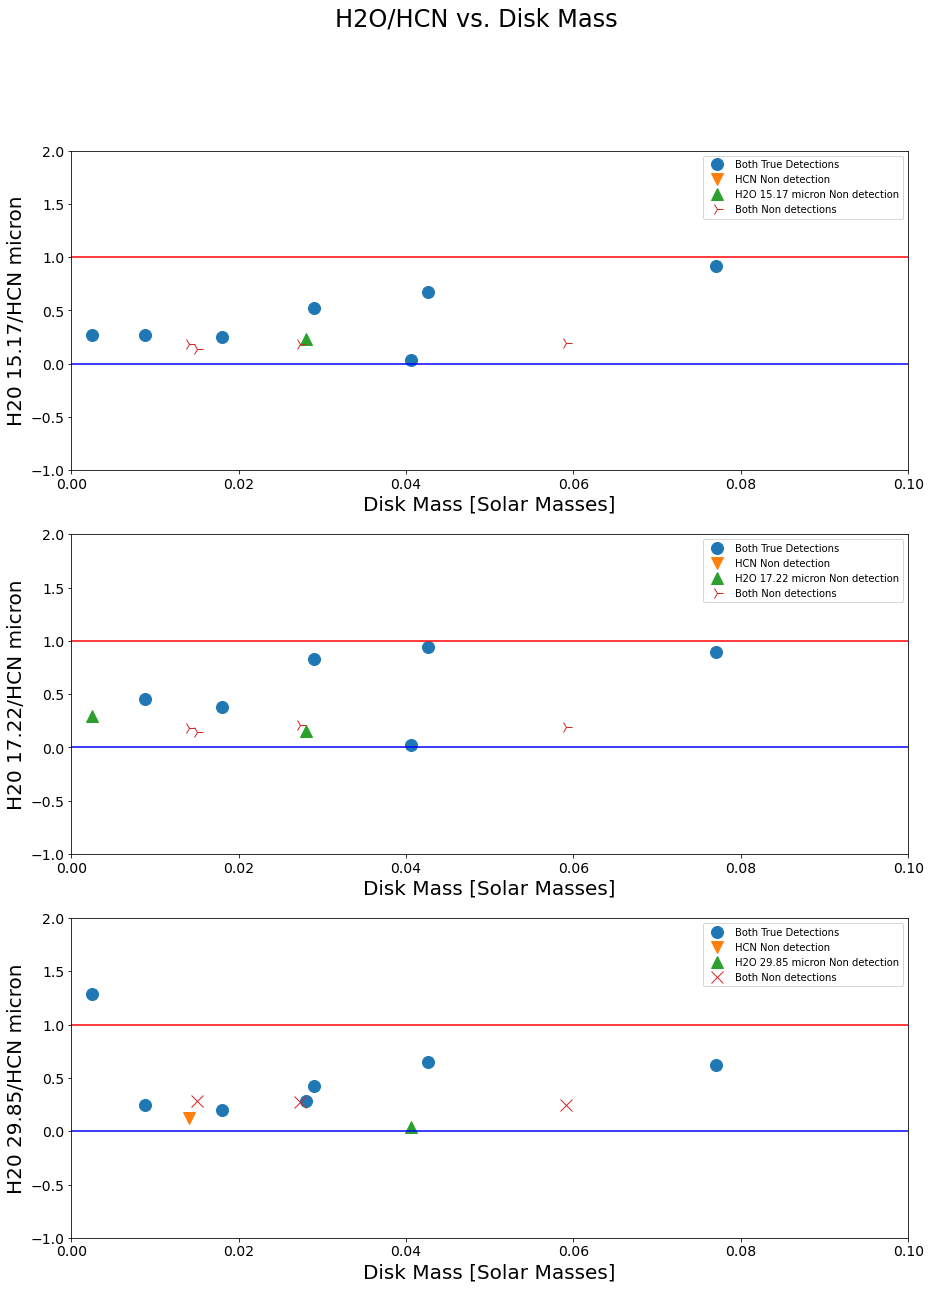

In [33]:
# H20 15
hcnh2o15diskm = df.loc[(hcnh2o15['Mdisk'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15diskm = (hcnh2o15diskm['H2O_15_17_microns'])/(hcnh2o15diskm['HCN_flux'])
# Non detections
hcnh2o15nondethcndiskm = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['Mdisk'] != -99]
hcnnon_vs_h2o15diskm = (hcnh2o15nondethcndiskm['H2O_15_17_microns'])/(hcnh2o15nondethcndiskm['HCN_flux'])
hcnh2o15nondeth2odiskm = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['Mdisk'] != -99]
hcn_vs_h2o15nondiskm = (hcnh2o15nondeth2odiskm['H2O_15_17_microns'])/(hcnh2o15nondeth2odiskm['HCN_flux'])
hcnh2o15nondetbothdiskm = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['Mdisk'] != -99]
hcn_vs_h2o15bothnondiskm = (hcnh2o15nondetbothdiskm['H2O_15_17_microns'])/(hcnh2o15nondetbothdiskm['HCN_flux'])

# H20 17
hcnh2o17diskm = df.loc[(hcnh2o17['Mdisk'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17diskm = (hcnh2o17diskm['H2O_17_22_microns'])/(hcnh2o17diskm['HCN_flux'])
# Non detections
hcnh2o17nondethcndiskm = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['Mdisk'] != -99]
hcnnon_vs_h2o17diskm = (hcnh2o17nondethcndiskm['H2O_17_22_microns'])/(hcnh2o17nondethcndiskm['HCN_flux'])
hcnh2o17nondeth2odiskm = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['Mdisk'] != -99]
hcn_vs_h2o17nondiskm = (hcnh2o17nondeth2odiskm['H2O_17_22_microns'])/(hcnh2o17nondeth2odiskm['HCN_flux'])
hcnh2o17nondetbothdiskm = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['Mdisk'] != -99]
hcn_vs_h2o17bothnondiskm = (hcnh2o17nondetbothdiskm['H2O_17_22_microns'])/(hcnh2o17nondetbothdiskm['HCN_flux'])

# H20 29
hcnh2o29diskm = df.loc[(hcnh2o29['Mdisk'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29diskm = (hcnh2o29diskm['H2O_29_85_microns'])/(hcnh2o29diskm['HCN_flux'])
# Non detections
hcnh2o29nondethcndiskm = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['Mdisk'] != -99]
hcnnon_vs_h2o29diskm = (hcnh2o29nondethcndiskm['H2O_29_85_microns'])/(hcnh2o29nondethcndiskm['HCN_flux'])
hcnh2o29nondeth2odiskm = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['Mdisk'] != -99]
hcn_vs_h2o29nondiskm = (hcnh2o29nondeth2odiskm['H2O_29_85_microns'])/(hcnh2o29nondeth2odiskm['HCN_flux'])
hcnh2o29nondetbothdiskm = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['Mdisk'] != -99]
hcn_vs_h2o29bothnondiskm = (hcnh2o29nondetbothdiskm['H2O_29_85_microns'])/(hcnh2o29nondetbothdiskm['HCN_flux'])

# send values to plot
star_list15 = hcnh2o15diskm['Star'].tolist()
disk15 = hcnh2o15diskm['Mdisk'].tolist()
disk15a = hcnh2o15nondethcndiskm['Mdisk'].tolist()
disk15b = hcnh2o15nondeth2odiskm['Mdisk'].tolist()
disk15c = hcnh2o15nondetbothdiskm['Mdisk'].tolist()

star_list17 = hcnh2o17diskm['Star'].tolist()
disk17 = hcnh2o17diskm['Mdisk'].tolist()
disk17a = hcnh2o17nondethcndiskm['Mdisk'].tolist()
disk17b = hcnh2o17nondeth2odiskm['Mdisk'].tolist()
disk17c = hcnh2o17nondetbothdiskm['Mdisk'].tolist()

star_list29 = hcnh2o29diskm['Star'].tolist()
disk29 = hcnh2o29diskm['Mdisk'].tolist()
disk29a = hcnh2o29nondethcndiskm['Mdisk'].tolist()
disk29b = hcnh2o29nondeth2odiskm['Mdisk'].tolist()
disk29c = hcnh2o29nondetbothdiskm['Mdisk'].tolist()

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('H2O/HCN vs. Disk Mass', fontsize=24)

# H20 15
ax1.plot(disk15, hcn_vs_h2o15diskm,label='Both True Detections',linestyle='',marker = "o",markersize=12)
ax1.plot(disk15a, hcnnon_vs_h2o15diskm,label='HCN Non detection',linestyle='',marker = "v",markersize=12)
ax1.plot(disk15b, hcn_vs_h2o15nondiskm,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=12)
ax1.plot(disk15c, hcn_vs_h2o15bothnondiskm,label='Both Non detections',linestyle='',marker = "4",markersize=12)

ax1.set_xlim(0,0.1)
ax1.set_ylim(-1,2)
ax1.title.set_fontsize(20)
ax1.set_xlabel('Disk Mass [Solar Masses]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('H20 15.17/HCN micron')
ax1.yaxis.label.set_fontsize(20)

# H20 17
ax2.plot(disk17, hcn_vs_h2o17diskm,label='Both True Detections',linestyle='',marker = "o",markersize=12)
ax2.plot(disk17a, hcnnon_vs_h2o17diskm,label='HCN Non detection',linestyle='',marker = "v",markersize=12)
ax2.plot(disk17b, hcn_vs_h2o17nondiskm,label='H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=12)
ax2.plot(disk17c, hcn_vs_h2o17bothnondiskm,label='Both Non detections',linestyle='',marker = "4",markersize=12)

ax2.set_xlim(0,0.1)
ax2.set_ylim(-1,2)
ax2.title.set_fontsize(20)
ax2.set_xlabel('Disk Mass [Solar Masses]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('H20 17.22/HCN micron')
ax2.yaxis.label.set_fontsize(20)

# H20 29
ax3.plot(disk29, hcn_vs_h2o29diskm,label='Both True Detections',linestyle='',marker = "o",markersize=12)
ax3.plot(disk29a, hcnnon_vs_h2o29diskm,label='HCN Non detection',linestyle='',marker = "v",markersize=12)
ax3.plot(disk29b, hcn_vs_h2o29nondiskm,label='H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=12)
ax3.plot(disk29c, hcn_vs_h2o29bothnondiskm,label='Both Non detections',linestyle='',marker = "x",markersize=12)

ax3.set_xlim(0,0.1)
ax3.set_ylim(-1,2)
ax3.title.set_fontsize(20)
ax3.set_xlabel('Disk Mass [Solar Masses]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('H20 29.85/HCN micron')
ax3.yaxis.label.set_fontsize(20)


for i, (x, y) in enumerate(zip(disk15, hcn_vs_h2o15diskm)):
    ax.text(x,y,star_list15[i],fontsize=12)

for i, (x, y) in enumerate(zip(disk17, hcn_vs_h2o17diskm)):
    ax.text(x,y,star_list17[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(disk29, hcn_vs_h2o29diskm)):
    ax.text(x,y,star_list29[i],fontsize=12)      

ax1.tick_params(axis='both', labelsize=14)
ax1.legend()
ax1.axhline(y=1, color='r', linestyle='-')
ax1.axhline(y=0, color='b', linestyle='-')
ax2.tick_params(axis='both', labelsize=14)
ax2.legend()
ax2.axhline(y=1, color='r', linestyle='-')
ax2.axhline(y=0, color='b', linestyle='-')
ax3.tick_params(axis='both', labelsize=14)
ax3.legend()
ax3.axhline(y=1, color='r', linestyle='-')
ax3.axhline(y=0, color='b', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: This shows that HCN becomes less dominant as disk mass grows

# HCN/H20 vs. Temperature

3     4.110961e-18
9     2.055480e-17
17    2.118962e-18
21    6.324555e-19
22    1.486607e-18
23    1.708801e-18
26    2.953368e-17
28    3.162278e-18
dtype: float64


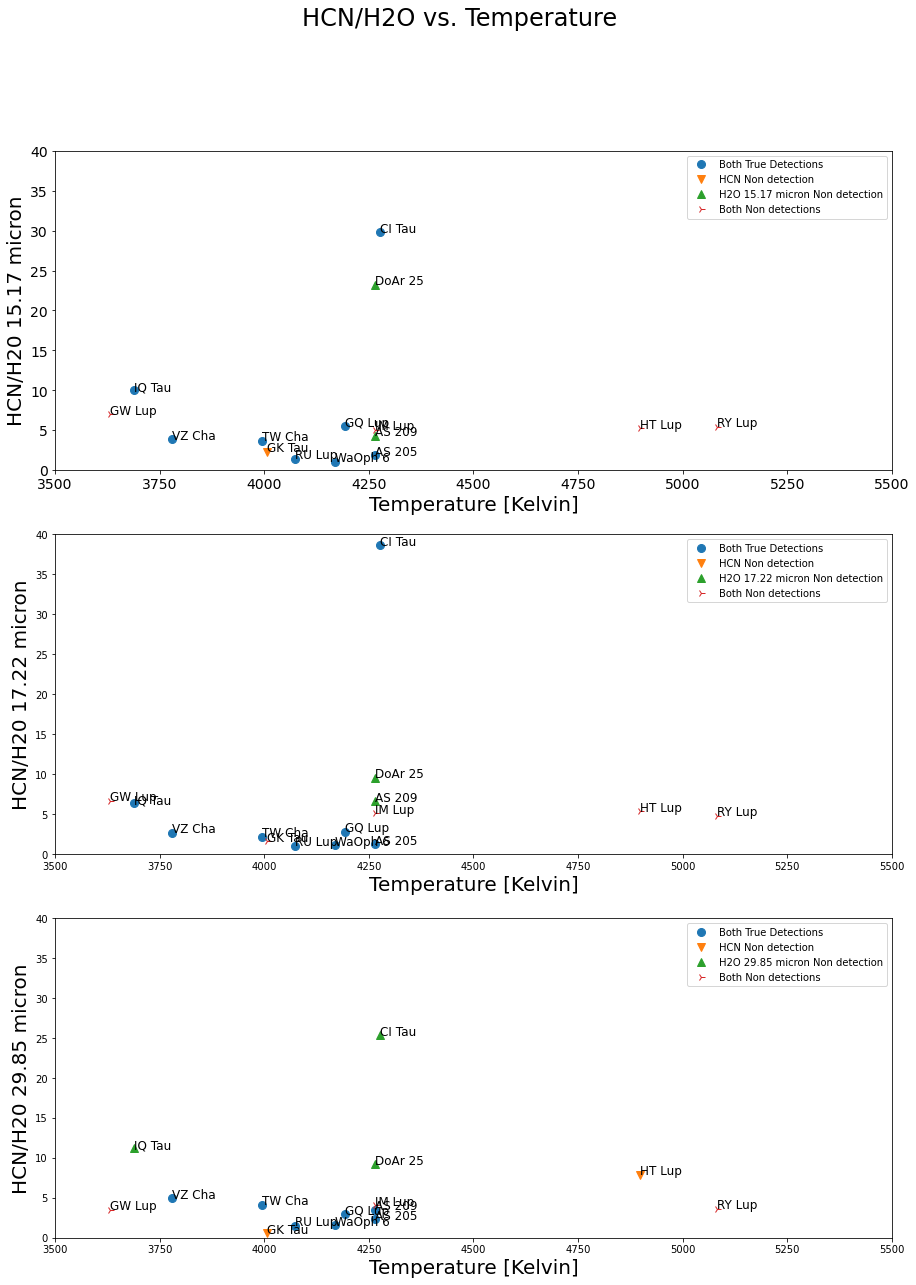

In [34]:
# suppress -99 characteristic values
hcnh2o15temp = df.loc[(hcnh2o15['T_eff'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15temp = (hcnh2o15temp['HCN_flux'])/(hcnh2o15temp['H2O_15_17_microns'])
hcnh2o15temperror = np.sqrt( (hcnh2o15temp['HCN_flux_uncertainty']*hcnh2o15temp['HCN_flux_uncertainty']) +
                               (hcnh2o15temp['H2O_15_17_uncertainty']*hcnh2o15temp['H2O_15_17_uncertainty'])  )
# Non detections
hcnh2o15nondethcntemp = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['T_eff'] != -99]
hcnnon_vs_h2o15temp = (hcnh2o15nondethcntemp['HCN_flux'])/(hcnh2o15nondethcntemp['H2O_15_17_microns'])
hcnh2o15nondeth2otemp = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['T_eff'] != -99]
hcn_vs_h2o15nontemp = (hcnh2o15nondeth2otemp['HCN_flux'])/(hcnh2o15nondeth2otemp['H2O_15_17_microns'])
hcnh2o15nondetbothtemp = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['T_eff'] != -99]
hcn_vs_h2o15bothnontemp = (hcnh2o15nondetbothtemp['HCN_flux'])/(hcnh2o15nondetbothtemp['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17temp = df.loc[(hcnh2o17['T_eff'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17temp = (hcnh2o17temp['HCN_flux'])/(hcnh2o17temp['H2O_17_22_microns'])
# Non detections
hcnh2o17nondethcntemp = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['T_eff'] != -99]
hcnnon_vs_h2o17temp = (hcnh2o17nondethcntemp['HCN_flux'])/(hcnh2o17nondethcntemp['H2O_17_22_microns'])
hcnh2o17nondeth2otemp = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['T_eff'] != -99]
hcn_vs_h2o17nontemp = (hcnh2o17nondeth2otemp['HCN_flux'])/(hcnh2o17nondeth2otemp['H2O_17_22_microns'])
hcnh2o17nondetbothtemp = hcnh2o17nondetboth.loc[(hcnh2o17nondetboth['T_eff'] != -99)&(hcnh2o17nondetboth['Star'] != 'HD 163296')]
hcn_vs_h2o17bothnontemp = (hcnh2o17nondetbothtemp['HCN_flux'])/(hcnh2o17nondetbothtemp['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29temp = df.loc[(hcnh2o29['T_eff'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29temp = (hcnh2o29temp['HCN_flux'])/(hcnh2o29temp['H2O_29_85_microns'])
# Non detections
hcnh2o29nondethcntemp = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['T_eff'] != -99]
hcnnon_vs_h2o29temp = (hcnh2o29nondethcntemp['HCN_flux'])/(hcnh2o29nondethcntemp['H2O_29_85_microns'])
hcnh2o29nondeth2otemp = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['T_eff'] != -99]
hcn_vs_h2o29nontemp = (hcnh2o29nondeth2otemp['HCN_flux'])/(hcnh2o29nondeth2otemp['H2O_29_85_microns'])
hcnh2o29nondetbothtemp = hcnh2o29nondetboth.loc[(hcnh2o29nondetboth['T_eff'] != -99)&(hcnh2o29nondetboth['Star'] != 'HD 163296')]
hcn_vs_h2o29bothnontemp = (hcnh2o29nondetbothtemp['HCN_flux'])/(hcnh2o29nondetbothtemp['H2O_29_85_microns'])

#errors
#hcnh2o15temperror = df.loc[(hcnh2o15temp['uncertainty_Teff'] != -99)
#hcnh2o17temperror = df.loc[(hcnh2o17temp['uncertainty_Teff'] != -99)
#hcnh2o29temperror = df.loc[(hcnh2o29temp['uncertainty_Teff'] != -99)

# send values to plot
star_list15 = hcnh2o15temp['Star'].tolist()
temp15 = hcnh2o15temp['T_eff'].tolist()
star_list15a = hcnh2o15nondethcntemp['Star'].tolist()
temp15a = hcnh2o15nondethcntemp['T_eff'].tolist()
star_list15b = hcnh2o15nondeth2otemp['Star'].tolist()
temp15b = hcnh2o15nondeth2otemp['T_eff'].tolist()
star_list15c = hcnh2o15nondetbothtemp['Star'].tolist()
temp15c = hcnh2o15nondetbothtemp['T_eff'].tolist()

star_list17 = hcnh2o17temp['Star'].tolist()
temp17 = hcnh2o17temp['T_eff'].tolist()
star_list17a = hcnh2o17nondethcntemp['Star'].tolist()
temp17a = hcnh2o17nondethcntemp['T_eff'].tolist()
star_list17b = hcnh2o17nondeth2otemp['Star'].tolist()
temp17b = hcnh2o17nondeth2otemp['T_eff'].tolist()
star_list17c = hcnh2o17nondetbothtemp['Star'].tolist()
temp17c = hcnh2o17nondetbothtemp['T_eff'].tolist()

star_list29 = hcnh2o29temp['Star'].tolist()
temp29 = hcnh2o29temp['T_eff'].tolist()
star_list29a = hcnh2o29nondethcntemp['Star'].tolist()
temp29a = hcnh2o29nondethcntemp['T_eff'].tolist()
star_list29b = hcnh2o29nondeth2otemp['Star'].tolist()
temp29b = hcnh2o29nondeth2otemp['T_eff'].tolist()
star_list29c = hcnh2o29nondetbothtemp['Star'].tolist()
temp29c = hcnh2o29nondetbothtemp['T_eff'].tolist()

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('HCN/H2O vs. Temperature', fontsize=24)

ax1.set_xlim(3500,5500)
ax1.set_ylim(0,40)
#ax.grid()
#ax1.set_title('HCN/H20  vs. Temperature')

ax1.title.set_fontsize(20)
ax1.set_xlabel('Temperature [Kelvin]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('HCN/H20 15.17 micron')
ax1.yaxis.label.set_fontsize(20)

ax1.plot(temp15, hcn_vs_h2o15temp,label='Both True Detections',linestyle='',marker = "o",markersize=8)
#ax1.errorbar(temp15, hcn_vs_h2o15temp,hcnh2o15temperror,hcnh2o15temperror,color='b')
# Issue with ratio error bar is error is in flux, not ratio, so very small, how to convert to ratio?
ax1.plot(temp15a, hcnnon_vs_h2o15temp,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax1.plot(temp15b, hcn_vs_h2o15nontemp,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8)
ax1.plot(temp15c, hcn_vs_h2o15bothnontemp,label='Both Non detections',linestyle='',marker = "4",markersize=8)

#ax2.plot(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn,label='Both True Detections',linestyle='',marker = "o",markersize=8)
#ax2.errorbar(hcn_vs_h2o17_h2o, hcn_vs_h2o17_hcn,hcn_vs_h2o17_error,hcn_vs_h2o17_error,linestyle='',color='b')

ax2.plot(temp17, hcn_vs_h2o17temp,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax2.plot(temp17a, hcnnon_vs_h2o17temp,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax2.plot(temp17b, hcn_vs_h2o17nontemp,label='H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=8)
ax2.plot(temp17c, hcn_vs_h2o17bothnontemp,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax3.plot(temp29, hcn_vs_h2o29temp,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax3.plot(temp29a, hcnnon_vs_h2o29temp,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax3.plot(temp29b, hcn_vs_h2o29nontemp,label='H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=8)
ax3.plot(temp29c, hcn_vs_h2o29bothnontemp,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax2.set_xlim(3500,5500)
ax2.set_ylim(0,40)
#ax.grid()
#ax2.set_title('HCN/H20 17.22 micron  vs. Temperature')

ax2.title.set_fontsize(20)
ax2.set_xlabel('Temperature [Kelvin]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('HCN/H20 17.22 micron')
ax2.yaxis.label.set_fontsize(20)

ax3.set_xlim(3500,5500)
ax3.set_ylim(0,40)
#ax.grid()
#ax3.set_title('HCN/H20 29.85 micron vs. Temperature')

ax3.title.set_fontsize(20)
ax3.set_xlabel('Temperature [Kelvin]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('HCN/H20 29.85 micron')
ax3.yaxis.label.set_fontsize(20)

# Star names are broken, here is the problem: 
# https://stackoverflow.com/questions/51980366/image-size-of-1005x132589-pixels-is-too-large-it-must-be-less-than-216-in-each

for i, (x, y) in enumerate(zip(temp15, hcn_vs_h2o15temp)):
    ax1.text(x,y,star_list15[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp15a, hcnnon_vs_h2o15temp)):
    ax1.text(x,y,star_list15a[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp15b, hcn_vs_h2o15nontemp)):
    ax1.text(x,y,star_list15b[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp15c, hcn_vs_h2o15bothnontemp)):
    ax1.text(x,y,star_list15c[i],fontsize=12)

for i, (x, y) in enumerate(zip(temp17, hcn_vs_h2o17temp)):
    ax2.text(x,y,star_list17[i],fontsize=12)  
for i, (x, y) in enumerate(zip(temp17a, hcnnon_vs_h2o17temp)):
    ax2.text(x,y,star_list17a[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp17b, hcn_vs_h2o17nontemp)):
    ax2.text(x,y,star_list17b[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp17c, hcn_vs_h2o17bothnontemp)):
    ax2.text(x,y,star_list17c[i],fontsize=12)
    
for i, (x, y) in enumerate(zip(temp29, hcn_vs_h2o29temp)):
    ax3.text(x,y,star_list29[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp29a, hcnnon_vs_h2o29temp)):
    ax3.text(x,y,star_list29a[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp29b, hcn_vs_h2o29nontemp)):
    ax3.text(x,y,star_list29b[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp29c, hcn_vs_h2o29bothnontemp)):
    ax3.text(x,y,star_list29c[i],fontsize=12)

ax1.tick_params(axis='both', labelsize=14)
ax1.legend()
ax2.legend()
ax3.legend()

#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

print(hcnh2o15temperror)



# HCN/H20 vs. Temp (remove CI Tau) 

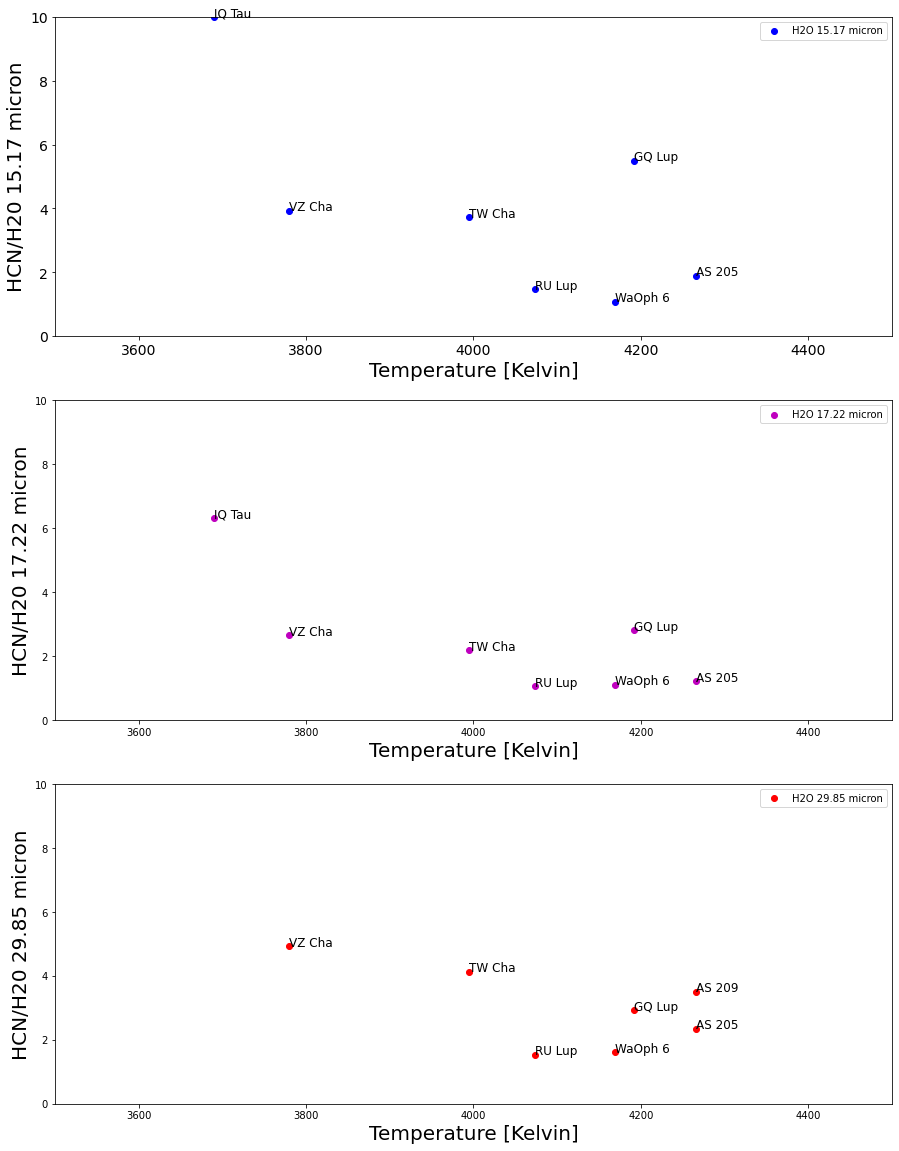

In [35]:
# suppress -99 characteristic values
hcnh2o15temp = df.loc[(hcnh2o15['T_eff'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)
                     &(df['Star'] != 'CI Tau')]

hcn_vs_h2o15temp = (hcnh2o15temp['HCN_flux'])/(hcnh2o15temp['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17temp = df.loc[(hcnh2o17['T_eff'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)
                     &(df['Star'] != 'CI Tau')]

hcn_vs_h2o17temp = (hcnh2o17temp['HCN_flux'])/(hcnh2o17temp['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29temp = df.loc[(hcnh2o29['T_eff'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)
                     &(df['Star'] != 'CI Tau')]

hcn_vs_h2o29temp = (hcnh2o29temp['HCN_flux'])/(hcnh2o29temp['H2O_29_85_microns'])

#errors
#hcnh2o15temperror = df.loc[(hcnh2o15temp['uncertainty_Teff'] != -99)
#hcnh2o17temperror = df.loc[(hcnh2o17temp['uncertainty_Teff'] != -99)
#hcnh2o29temperror = df.loc[(hcnh2o29temp['uncertainty_Teff'] != -99)

# send values to plot
star_list15 = hcnh2o15temp['Star'].tolist()
temp15 = hcnh2o15temp['T_eff'].tolist()

star_list17 = hcnh2o17temp['Star'].tolist()
temp17 = hcnh2o17temp['T_eff'].tolist()

star_list29 = hcnh2o29temp['Star'].tolist()
temp29 = hcnh2o29temp['T_eff'].tolist()

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))

ax1.set_xlim(3500,4500)
ax1.set_ylim(0,10)
#ax.grid()
#ax1.set_title('HCN/H20  vs. Temperature')

ax1.title.set_fontsize(20)
ax1.set_xlabel('Temperature [Kelvin]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('HCN/H20 15.17 micron')
ax1.yaxis.label.set_fontsize(20)

ax1.scatter(temp15, hcn_vs_h2o15temp,label='H2O 15.17 micron',color='b')
ax2.scatter(temp17, hcn_vs_h2o17temp,label='H2O 17.22 micron',color='m')
ax3.scatter(temp29, hcn_vs_h2o29temp,label='H2O 29.85 micron',color='r')

ax2.set_xlim(3500,4500)
ax2.set_ylim(0,10)
#ax.grid()
#ax2.set_title('HCN/H20 17.22 micron  vs. Temperature')

ax2.title.set_fontsize(20)
ax2.set_xlabel('Temperature [Kelvin]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('HCN/H20 17.22 micron')
ax2.yaxis.label.set_fontsize(20)

ax3.set_xlim(3500,4500)
ax3.set_ylim(0,10)
#ax.grid()
#ax3.set_title('HCN/H20 29.85 micron vs. Temperature')

ax3.title.set_fontsize(20)
ax3.set_xlabel('Temperature [Kelvin]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('HCN/H20 29.85 micron')
ax3.yaxis.label.set_fontsize(20)

# Star names are broken, here is the problem: 
# https://stackoverflow.com/questions/51980366/image-size-of-1005x132589-pixels-is-too-large-it-must-be-less-than-216-in-each

for i, (x, y) in enumerate(zip(temp15, hcn_vs_h2o15temp)):
    ax1.text(x,y,star_list15[i],fontsize=12)

for i, (x, y) in enumerate(zip(temp17, hcn_vs_h2o17temp)):
    ax2.text(x,y,star_list17[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(temp29, hcn_vs_h2o29temp)):
    ax3.text(x,y,star_list29[i],fontsize=12)      

ax1.tick_params(axis='both', labelsize=14)
ax1.legend()
ax2.legend()
ax3.legend()

#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

### Conclusion: See a general trend that as stellar temperature increases, the relationship between HCN and water becomes more equivalent. This could alos indicate that water becomes larger. 

#  HCN/H20 vs. Disk Radius
Predict that we should see a similar trend to Banzatti et al: HCN overtakes water as disk grows

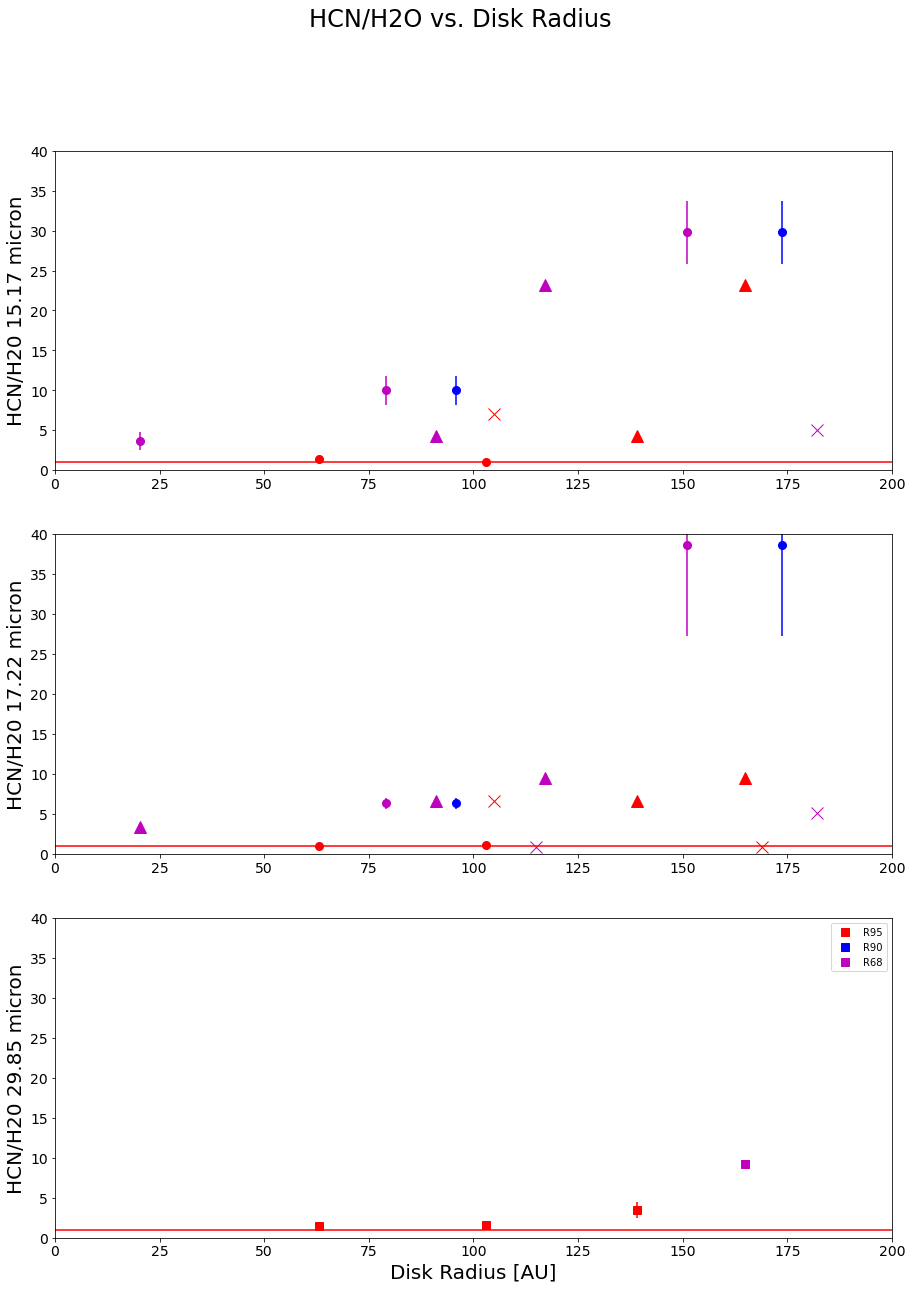

In [54]:
# H20 15
# R95
hcnh2o15rad95 = df.loc[(hcnh2o15['R95'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15rad95 = (hcnh2o15rad95['HCN_flux'])/(hcnh2o15rad95['H2O_15_17_microns'])
hcn_vs_h2o15rad95error = np.sqrt( ((hcnh2o15rad95['H2O_15_17_uncertainty'])/(hcnh2o15rad95['H2O_15_17_microns']))**2 +
                                (((hcnh2o15rad95['HCN_flux_uncertainty'])/(hcnh2o15rad95['HCN_flux']))**2)) * hcn_vs_h2o15rad95
# Non detections
hcnh2o15nondethcnrad95 = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['R95'] != -99]
hcnnon_vs_h2o15rad95 = (hcnh2o15nondethcnrad95['HCN_flux'])/(hcnh2o15nondethcnrad95['H2O_15_17_microns'])
hcnh2o15nondeth2orad95 = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['R95'] != -99]
hcn_vs_h2o15nonrad95 = (hcnh2o15nondeth2orad95['HCN_flux'])/(hcnh2o15nondeth2orad95['H2O_15_17_microns'])
hcnh2o15nondetbothrad95 = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['R95'] != -99]
hcn_vs_h2o15bothnonrad95 = (hcnh2o15nondetbothrad95['HCN_flux'])/(hcnh2o15nondetbothrad95['H2O_15_17_microns'])

#R90
hcnh2o15rad90 = df.loc[(hcnh2o15['R90'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15rad90 = (hcnh2o15rad90['HCN_flux'])/(hcnh2o15rad90['H2O_15_17_microns'])
hcn_vs_h2o15rad90error = np.sqrt( ((hcnh2o15rad90['H2O_15_17_uncertainty'])/(hcnh2o15rad90['H2O_15_17_microns']))**2 +
                                (((hcnh2o15rad90['HCN_flux_uncertainty'])/(hcnh2o15rad90['HCN_flux']))**2)) * hcn_vs_h2o15rad90                                 
# Non detections
hcnh2o15nondethcnrad90 = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['R90'] != -99]
hcnnon_vs_h2o15rad90 = (hcnh2o15nondethcnrad90['HCN_flux'])/(hcnh2o15nondethcnrad90['H2O_15_17_microns'])
hcnh2o15nondeth2orad90 = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['R90'] != -99]
hcn_vs_h2o15nonrad90 = (hcnh2o15nondeth2orad90['HCN_flux'])/(hcnh2o15nondeth2orad90['H2O_15_17_microns'])
hcnh2o15nondetbothrad90 = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['R90'] != -99]
hcn_vs_h2o15bothnonrad90 = (hcnh2o15nondetbothrad90['HCN_flux'])/(hcnh2o15nondetbothrad90['H2O_15_17_microns'])
#R68
hcnh2o15rad68 = df.loc[(hcnh2o15['R68'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15rad68 = (hcnh2o15rad68['HCN_flux'])/(hcnh2o15rad68['H2O_15_17_microns'])
hcn_vs_h2o15rad68error = np.sqrt( ((hcnh2o15rad68['H2O_15_17_uncertainty'])/(hcnh2o15rad68['H2O_15_17_microns']))**2 +
                                (((hcnh2o15rad68['HCN_flux_uncertainty'])/(hcnh2o15rad68['HCN_flux']))**2)) * hcn_vs_h2o15rad68
# Non detections
hcnh2o15nondethcnrad68 = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['R68'] != -99]
hcnnon_vs_h2o15rad68 = (hcnh2o15nondethcnrad68['HCN_flux'])/(hcnh2o15nondethcnrad68['H2O_15_17_microns'])
hcnh2o15nondeth2orad68 = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['R68'] != -99]
hcn_vs_h2o15nonrad68 = (hcnh2o15nondeth2orad68['HCN_flux'])/(hcnh2o15nondeth2orad68['H2O_15_17_microns'])
hcnh2o15nondetbothrad68 = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['R68'] != -99]
hcn_vs_h2o15bothnonrad68 = (hcnh2o15nondetbothrad68['HCN_flux'])/(hcnh2o15nondetbothrad68['H2O_15_17_microns'])

# H20 17
# R95
hcnh2o17rad95 = df.loc[(hcnh2o17['R95'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17rad95 = (hcnh2o17rad95['HCN_flux'])/(hcnh2o17rad95['H2O_17_22_microns'])
hcn_vs_h2o17rad95error = np.sqrt( ((hcnh2o17rad95['H2O_17_22_uncertainty'])/(hcnh2o17rad95['H2O_17_22_microns']))**2 +
                                (((hcnh2o17rad95['HCN_flux_uncertainty'])/(hcnh2o17rad95['HCN_flux']))**2)) * hcn_vs_h2o17rad95 
# Non detections
hcnh2o17nondethcnrad95 = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['R95'] != -99]
hcnnon_vs_h2o17rad95 = (hcnh2o17nondethcnrad95['HCN_flux'])/(hcnh2o17nondethcnrad95['H2O_17_22_microns'])
hcnh2o17nondeth2orad95 = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['R95'] != -99]
hcn_vs_h2o17nonrad95 = (hcnh2o17nondeth2orad95['HCN_flux'])/(hcnh2o17nondeth2orad95['H2O_17_22_microns'])
hcnh2o17nondetbothrad95 = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['R95'] != -99]
hcn_vs_h2o17bothnonrad95 = (hcnh2o17nondetbothrad95['HCN_flux'])/(hcnh2o17nondetbothrad95['H2O_17_22_microns'])

#R90
hcnh2o17rad90 = df.loc[(hcnh2o17['R90'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17rad90 = (hcnh2o17rad90['HCN_flux'])/(hcnh2o17rad90['H2O_17_22_microns'])
hcn_vs_h2o17rad90error = np.sqrt( ((hcnh2o17rad90['H2O_17_22_uncertainty'])/(hcnh2o17rad90['H2O_17_22_microns']))**2 +
                                (((hcnh2o17rad90['HCN_flux_uncertainty'])/(hcnh2o17rad90['HCN_flux']))**2)) * hcn_vs_h2o17rad90                                
# Non detections
hcnh2o17nondethcnrad90 = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['R90'] != -99]
hcnnon_vs_h2o17rad90 = (hcnh2o17nondethcnrad90['HCN_flux'])/(hcnh2o17nondethcnrad90['H2O_17_22_microns'])
hcnh2o17nondeth2orad90 = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['R90'] != -99]
hcn_vs_h2o17nonrad90 = (hcnh2o17nondeth2orad90['HCN_flux'])/(hcnh2o17nondeth2orad90['H2O_17_22_microns'])
hcnh2o17nondetbothrad90 = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['R90'] != -99]
hcn_vs_h2o17bothnonrad90 = (hcnh2o17nondetbothrad90['HCN_flux'])/(hcnh2o17nondetbothrad90['H2O_17_22_microns'])
#R68
hcnh2o17rad68 = df.loc[(hcnh2o17['R68'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17rad68 = (hcnh2o17rad68['HCN_flux'])/(hcnh2o17rad68['H2O_17_22_microns'])
hcn_vs_h2o17rad68error = np.sqrt( ((hcnh2o17rad68['H2O_17_22_uncertainty'])/(hcnh2o17rad68['H2O_17_22_microns']))**2 +
                                (((hcnh2o17rad68['HCN_flux_uncertainty'])/(hcnh2o17rad68['HCN_flux']))**2)) * hcn_vs_h2o17rad68
# Non detections
hcnh2o17nondethcnrad68 = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['R68'] != -99]
hcnnon_vs_h2o17rad68 = (hcnh2o17nondethcnrad68['HCN_flux'])/(hcnh2o17nondethcnrad68['H2O_17_22_microns'])
hcnh2o17nondeth2orad68 = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['R68'] != -99]
hcn_vs_h2o17nonrad68 = (hcnh2o17nondeth2orad68['HCN_flux'])/(hcnh2o17nondeth2orad68['H2O_17_22_microns'])
hcnh2o17nondetbothrad68 = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['R68'] != -99]
hcn_vs_h2o17bothnonrad68 = (hcnh2o17nondetbothrad68['HCN_flux'])/(hcnh2o17nondetbothrad68['H2O_17_22_microns'])

# H20 29
# R95
hcnh2o29rad95 = df.loc[(hcnh2o29['R95'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29rad95 = (hcnh2o29rad95['HCN_flux'])/(hcnh2o29rad95['H2O_29_85_microns'])
hcn_vs_h2o29rad95error = np.sqrt( ((hcnh2o29rad95['H2O_29_85_uncertainty'])/(hcnh2o29rad95['H2O_29_85_microns']))**2 +
                                (((hcnh2o29rad95['HCN_flux_uncertainty'])/(hcnh2o29rad95['HCN_flux']))**2)) * hcn_vs_h2o29rad95 
# Non detections
hcnh2o29nondethcnrad95 = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['R95'] != -99]
hcnnon_vs_h2o29rad95 = (hcnh2o29nondethcnrad95['HCN_flux'])/(hcnh2o29nondethcnrad95['H2O_29_85_microns'])
hcnh2o29nondeth2orad95 = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['R95'] != -99]
hcn_vs_h2o29nonrad95 = (hcnh2o29nondeth2orad95['HCN_flux'])/(hcnh2o29nondeth2orad95['H2O_29_85_microns'])
hcnh2o29nondetbothrad95 = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['R95'] != -99]
hcn_vs_h2o29bothnonrad95 = (hcnh2o29nondetbothrad95['HCN_flux'])/(hcnh2o29nondetbothrad95['H2O_29_85_microns'])
#R90
hcnh2o29rad90 = df.loc[(hcnh2o29['R90'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29rad90 = (hcnh2o29rad90['HCN_flux'])/(hcnh2o29rad90['H2O_29_85_microns'])
hcn_vs_h2o29rad90error = np.sqrt( ((hcnh2o29rad90['H2O_29_85_uncertainty'])/(hcnh2o29rad90['H2O_29_85_microns']))**2 +
                                (((hcnh2o29rad90['HCN_flux_uncertainty'])/(hcnh2o29rad90['HCN_flux']))**2)) * hcn_vs_h2o29rad90 
# Non detections
hcnh2o29nondethcnrad90 = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['R90'] != -99]
hcnnon_vs_h2o29rad90 = (hcnh2o29nondethcnrad90['HCN_flux'])/(hcnh2o29nondethcnrad90['H2O_29_85_microns'])
hcnh2o29nondeth2orad90 = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['R90'] != -99]
hcn_vs_h2o29nonrad90 = (hcnh2o29nondeth2orad90['HCN_flux'])/(hcnh2o29nondeth2orad90['H2O_29_85_microns'])
hcnh2o29nondetbothrad90 = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['R90'] != -99]
hcn_vs_h2o29bothnonrad90 = (hcnh2o29nondetbothrad90['HCN_flux'])/(hcnh2o29nondetbothrad90['H2O_29_85_microns'])
#R68
hcnh2o29rad68 = df.loc[(hcnh2o29['R68'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29rad68 = (hcnh2o29rad68['HCN_flux'])/(hcnh2o29rad68['H2O_29_85_microns'])
hcn_vs_h2o29rad68error = np.sqrt( ((hcnh2o29rad68['H2O_29_85_uncertainty'])/(hcnh2o29rad68['H2O_29_85_microns']))**2 +
                                (((hcnh2o29rad68['HCN_flux_uncertainty'])/(hcnh2o29rad68['HCN_flux']))**2)) * hcn_vs_h2o29rad68 
# Non detections
hcnh2o29nondethcnrad68 = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['R68'] != -99]
hcnnon_vs_h2o29rad68 = (hcnh2o29nondethcnrad68['HCN_flux'])/(hcnh2o29nondethcnrad68['H2O_29_85_microns'])
hcnh2o29nondeth2orad68 = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['R68'] != -99]
hcn_vs_h2o29nonrad68 = (hcnh2o29nondeth2orad68['HCN_flux'])/(hcnh2o29nondeth2orad68['H2O_29_85_microns'])
hcnh2o29nondetbothrad68 = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['R68'] != -99]
hcn_vs_h2o29bothnonrad68 = (hcnh2o29nondetbothrad68['HCN_flux'])/(hcnh2o29nondetbothrad68['H2O_29_85_microns'])


# send values to plot
# H20 15
#R95
star_list1595 = hcnh2o15rad95['Star'].tolist()
rad9515 = hcnh2o15rad95['R95'].tolist()
rad9515a = hcnh2o15nondethcnrad95['R95'].tolist()
rad9515b = hcnh2o15nondeth2orad95['R95'].tolist()
rad9515c = hcnh2o15nondetbothrad95['R95'].tolist()
#R90
star_list1590 = hcnh2o15rad90['Star'].tolist()
rad9015 = hcnh2o15rad90['R90'].tolist()
rad9015a = hcnh2o15nondethcnrad90['R90'].tolist()
rad9015b = hcnh2o15nondeth2orad90['R90'].tolist()
rad9015c = hcnh2o15nondetbothrad90['R90'].tolist()
#R68
star_list1568 = hcnh2o15rad68['Star'].tolist()
rad6815 = hcnh2o15rad68['R68'].tolist()
rad6815a = hcnh2o15nondethcnrad68['R68'].tolist()
rad6815b = hcnh2o15nondeth2orad68['R68'].tolist()
rad6815c = hcnh2o15nondetbothrad68['R68'].tolist()


# H20 17
#R95
star_list1795 = hcnh2o17rad95['Star'].tolist()
rad9517 = hcnh2o17rad95['R95'].tolist()
rad9517a = hcnh2o17nondethcnrad95['R95'].tolist()
rad9517b = hcnh2o17nondeth2orad95['R95'].tolist()
rad9517c = hcnh2o17nondetbothrad95['R95'].tolist()
#R90
star_list1790 = hcnh2o17rad90['Star'].tolist()
rad9017 = hcnh2o17rad90['R90'].tolist()
rad9017a = hcnh2o17nondethcnrad90['R90'].tolist()
rad9017b = hcnh2o17nondeth2orad90['R90'].tolist()
rad9017c = hcnh2o17nondetbothrad90['R90'].tolist()
#R68
star_list1768 = hcnh2o17rad68['Star'].tolist()
rad6817 = hcnh2o17rad68['R68'].tolist()
rad6817a = hcnh2o17nondethcnrad68['R68'].tolist()
rad6817b = hcnh2o17nondeth2orad68['R68'].tolist()
rad6817c = hcnh2o17nondetbothrad68['R68'].tolist()

# H20 29
#R95
star_list2995 = hcnh2o29rad95['Star'].tolist()
rad9529 = hcnh2o29rad95['R95'].tolist()
rad9529a = hcnh2o29nondethcnrad95['R95'].tolist()
rad9529b = hcnh2o29nondeth2orad95['R95'].tolist()
rad9529c = hcnh2o29nondetbothrad95['R95'].tolist()
#R90
star_list2990 = hcnh2o29rad90['Star'].tolist()
rad9029 = hcnh2o29rad90['R90'].tolist()
rad9029a = hcnh2o29nondethcnrad90['R90'].tolist()
rad9029b = hcnh2o29nondeth2orad90['R90'].tolist()
rad9029c = hcnh2o29nondetbothrad90['R90'].tolist()
#R68
star_list2968 = hcnh2o29rad68['Star'].tolist()
rad6829 = hcnh2o29rad68['R68'].tolist()
rad6829a = hcnh2o29nondethcnrad68['R68'].tolist()
rad6829b = hcnh2o29nondeth2orad68['R68'].tolist()
rad6829c = hcnh2o29nondetbothrad68['R68'].tolist()

# Prepare plot
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('HCN/H2O vs. Disk Radius',fontsize=24)

# H20 15
# R95
ax1.plot(rad9515, hcn_vs_h2o15rad95,label='R95 - Both true Detections',linestyle='',marker = "o",markersize=8,color='r')
ax1.errorbar(rad9515, hcn_vs_h2o15rad95,hcn_vs_h2o15rad95error,linestyle='',color='r')
ax1.plot(rad9515a, hcnnon_vs_h2o15rad95,label='R95 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='r')
ax1.plot(rad9515b, hcn_vs_h2o15nonrad95,label='R95 - H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=12,color='r')
ax1.plot(rad9515c, hcn_vs_h2o15bothnonrad95,label='R95 - Both Non detections',linestyle='',marker = "x",markersize=12,color='r')
# R90
ax1.plot(rad9015, hcn_vs_h2o15rad90,label='R90 - Both true Detections',linestyle='',marker = "o",markersize=8,color='b')
ax1.errorbar(rad9015, hcn_vs_h2o15rad90,hcn_vs_h2o15rad90error,linestyle='',color='b')
ax1.plot(rad9015a, hcnnon_vs_h2o15rad90,label='R90 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='b')
ax1.plot(rad9015b, hcn_vs_h2o15nonrad90,label='R90 - H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=12,color='b')
ax1.plot(rad9015c, hcn_vs_h2o15bothnonrad90,label='R90 - Both Non detections',linestyle='',marker = "x",markersize=12,color='b')
# R68
ax1.plot(rad6815, hcn_vs_h2o15rad68,label='R68 - Both true Detections',linestyle='',marker = "o",markersize=8,color='m')
ax1.errorbar(rad6815, hcn_vs_h2o15rad68,hcn_vs_h2o15rad68error,linestyle='',color='m')
ax1.plot(rad6815a, hcnnon_vs_h2o15rad68,label='R68 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='m')
ax1.plot(rad6815b, hcn_vs_h2o15nonrad68,label='R68 - H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=12,color='m')
ax1.plot(rad6815c, hcn_vs_h2o15bothnonrad68,label='R68 - Both Non detections',linestyle='',marker = "x",markersize=12,color='m')

ax1.set_xlim(0,200)
ax1.set_ylim(0,40)
ax1.title.set_fontsize(20)
#ax1.set_xlabel('Disk Radius [Au]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('HCN/H20 15.17 micron')
ax1.yaxis.label.set_fontsize(20)
#ax1.legend([marker = "o",marker = "v",marker = "^",marker = "4"], 
    #      ["Both True Detections", "HCN Non Detection","H2O Non Detection","Both Non Detections"],
  #        fontsize=15, title='Marker Legend',title_fontsize=18,markerscale=.7)
#ax1.legend([color = "r",color = "b",color = "m"], 
   #       ["R95 Model", "R90 Model","R68 Model"],
    #      fontsize=15, title='Color Legend',title_fontsize=18,markerscale=.7)



# H20 17
# R95
ax2.plot(rad9517, hcn_vs_h2o17rad95,label='R95 - Both true Detections',linestyle='',marker = "o",markersize=8,color='r')
ax2.errorbar(rad9517, hcn_vs_h2o17rad95,hcn_vs_h2o17rad95error,linestyle='',color='r')
ax2.plot(rad9517a, hcnnon_vs_h2o17rad95,label='R95 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='r')
ax2.plot(rad9517b, hcn_vs_h2o17nonrad95,label='R95 - H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=12,color='r')
ax2.plot(rad9517c, hcn_vs_h2o17bothnonrad95,label='R95 - Both Non detections',linestyle='',marker = "x",markersize=12,color='r')
# R90
ax2.plot(rad9017, hcn_vs_h2o17rad90,label='R90 - Both true Detections',linestyle='',marker = "o",markersize=8,color='b')
ax2.errorbar(rad9017, hcn_vs_h2o17rad90,hcn_vs_h2o17rad90error,linestyle='',color='b')
ax2.plot(rad9017a, hcnnon_vs_h2o17rad90,label='R90 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='b')
ax2.plot(rad9017b, hcn_vs_h2o17nonrad90,label='R90 - H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=12,color='b')
ax2.plot(rad9017c, hcn_vs_h2o17bothnonrad90,label='R90 - Both Non detections',linestyle='',marker = "x",markersize=12,color='b')
# R68
ax2.plot(rad6817, hcn_vs_h2o17rad68,label='R68 - Both true Detections',linestyle='',marker = "o",markersize=8,color='m')
ax2.errorbar(rad6817, hcn_vs_h2o17rad68,hcn_vs_h2o17rad68error,linestyle='',color='m')
ax2.plot(rad6817a, hcnnon_vs_h2o17rad68,label='R68 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='m')
ax2.plot(rad6817b, hcn_vs_h2o17nonrad68,label='R68 - H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=12,color='m')
ax2.plot(rad6817c, hcn_vs_h2o17bothnonrad68,label='R68 - Both Non detections',linestyle='',marker = "x",markersize=12,color='m')

ax2.set_xlim(0,200)
ax2.set_ylim(0,40)
ax2.title.set_fontsize(20)
#ax2.set_xlabel('Disk Radius [Au]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('HCN/H20 17.22 micron')
ax2.yaxis.label.set_fontsize(20)

# H20 29
# R95
ax3.plot(rad9529, hcn_vs_h2o29rad95,label='R95',linestyle='',marker = "s",markersize=8,color='r')
ax3.errorbar(rad9529, hcn_vs_h2o29rad95,hcn_vs_h2o29rad95error,linestyle='',color='r')
ax3.plot(rad9529a, hcnnon_vs_h2o29rad95,label='R90',linestyle='',marker = "s",markersize=8,color='b')
ax3.plot(rad9529b, hcn_vs_h2o29nonrad95,label='R68',linestyle='',marker = "s",markersize=8,color='m')
#ax3.plot(rad9529c, hcn_vs_h2o29bothnonrad95,label='Both Non detections',linestyle='',marker = "x",markersize=12,color='k')
# R90
#ax3.plot(rad9029, hcn_vs_h2o29rad90,label='R90 - Both true Detections',linestyle='',marker = "o",markersize=8,color='b')
#ax3.errorbar(rad9029, hcn_vs_h2o29rad90,hcn_vs_h2o29rad90error,linestyle='',color='b')
#ax3.plot(rad9029a, hcnnon_vs_h2o29rad90,label='R90 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='b')
#ax3.plot(rad9029b, hcn_vs_h2o29nonrad90,label='R90 - H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=12,color='b')
#ax3.plot(rad9029c, hcn_vs_h2o29bothnonrad90,label='R90 - Both Non detections',linestyle='',marker = "x",markersize=12,color='b')
# R68
#ax3.plot(rad6829, hcn_vs_h2o29rad68,label='R68 - Both true Detections',linestyle='',marker = "o",markersize=8,color='m')
#ax3.errorbar(rad6829, hcn_vs_h2o29rad68,hcn_vs_h2o29rad68error,linestyle='',color='m')
#ax3.plot(rad6829a, hcnnon_vs_h2o29rad68,label='R68 - HCN Non detection',linestyle='',marker = "v",markersize=12,color='m')
#ax3.plot(rad6829b, hcn_vs_h2o29nonrad68,label='R68 - H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=12,color='m')
#ax3.plot(rad6829c, hcn_vs_h2o29bothnonrad68,label='R68 - Both Non detections',linestyle='',marker = "x",markersize=12,color='m')

ax3.set_xlim(0,200)
ax3.set_ylim(0,40)
ax3.title.set_fontsize(20)
ax3.set_xlabel('Disk Radius [AU]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('HCN/H20 29.85 micron')
ax3.yaxis.label.set_fontsize(20)


#R95
for i, (x, y) in enumerate(zip(rad9515, hcn_vs_h2o15rad95)):
    ax.text(x,y,star_list1595[i],fontsize=12)
for i, (x, y) in enumerate(zip(rad9517, hcn_vs_h2o17rad95)):
    ax.text(x,y,star_list1795[i],fontsize=12)  
for i, (x, y) in enumerate(zip(rad9529, hcn_vs_h2o29rad95)):
    ax.text(x,y,star_list2995[i],fontsize=12)      

#R90
for i, (x, y) in enumerate(zip(rad9015, hcn_vs_h2o15rad90)):
    ax.text(x,y,star_list1590[i],fontsize=12)
for i, (x, y) in enumerate(zip(rad9017, hcn_vs_h2o17rad90)):
    ax.text(x,y,star_list1790[i],fontsize=12)  
for i, (x, y) in enumerate(zip(rad9029, hcn_vs_h2o29rad90)):
    ax.text(x,y,star_list2990[i],fontsize=12)   
    
    
#R68
for i, (x, y) in enumerate(zip(rad6815, hcn_vs_h2o15rad68)):
    ax.text(x,y,star_list1568[i],fontsize=12)
for i, (x, y) in enumerate(zip(rad6817, hcn_vs_h2o17rad68)):
    ax.text(x,y,star_list1768[i],fontsize=12)  
for i, (x, y) in enumerate(zip(rad6829, hcn_vs_h2o29rad68)):
    ax.text(x,y,star_list2968[i],fontsize=12)
    
ax1.tick_params(axis='both', labelsize=14)
#ax1.legend()
ax1.axhline(y=1, color='r', linestyle='-')
ax2.tick_params(axis='both', labelsize=14)
#ax2.legend()
ax2.axhline(y=1, color='r', linestyle='-')
ax3.tick_params(axis='both', labelsize=14)
ax3.legend()
ax3.axhline(y=1, color='r', linestyle='-')


plt.savefig('hcn.h2o.diskradius.png')   #, bbox_inches='tight')
#plt.show()

# H20/HCN vs. Disk Radius
Repeat Banzatti et al chart

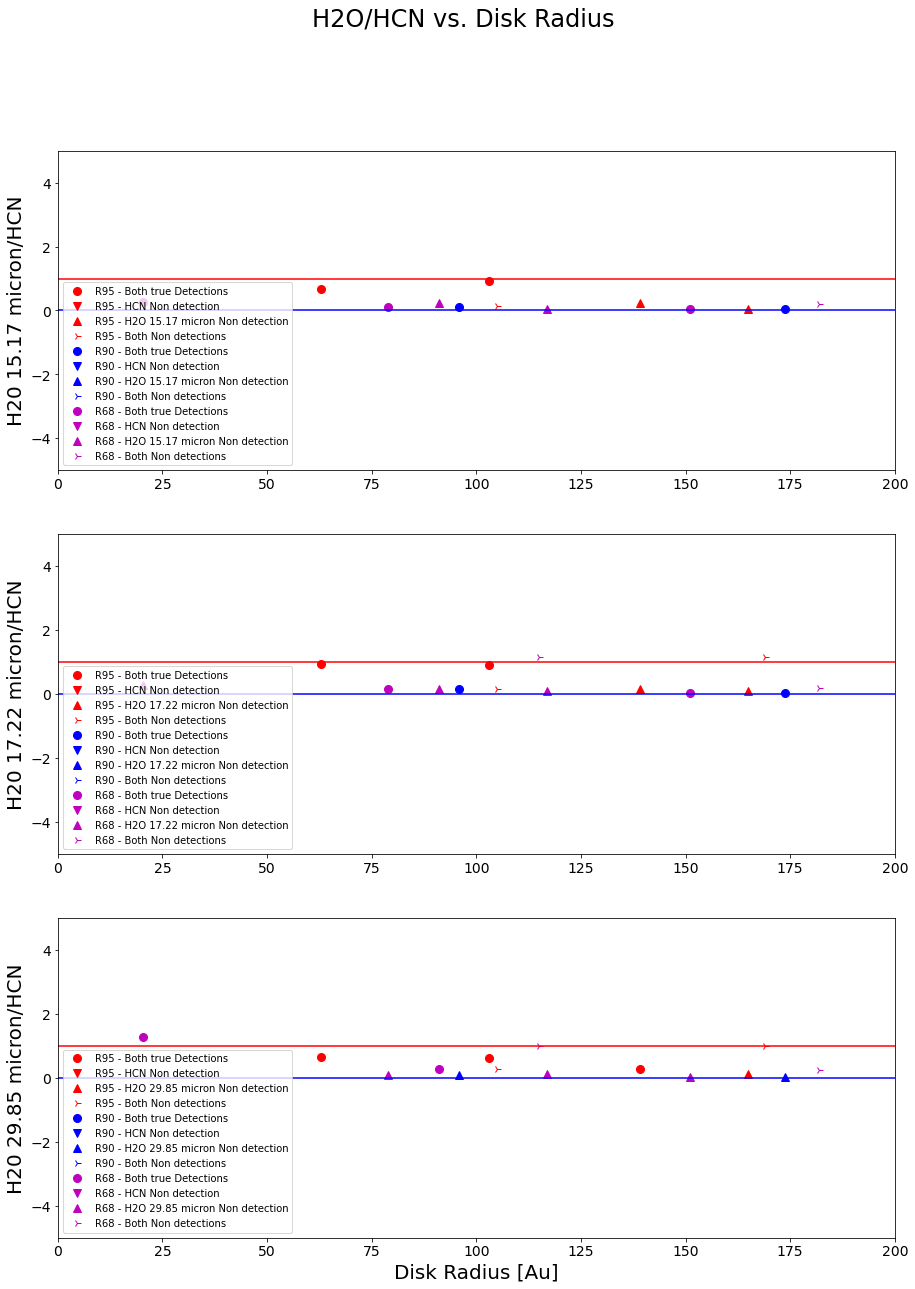

In [37]:
# H20 15
# R95
hcnh2o15rad95 = df.loc[(hcnh2o15['R95'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15rad95 = (hcnh2o15rad95['H2O_15_17_microns'])/(hcnh2o15rad95['HCN_flux'])
# Non detections
hcnh2o15nondethcnrad95 = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['R95'] != -99]
hcnnon_vs_h2o15rad95 = (hcnh2o15nondethcnrad95['H2O_15_17_microns'])/(hcnh2o15nondethcnrad95['HCN_flux'])
hcnh2o15nondeth2orad95 = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['R95'] != -99]
hcn_vs_h2o15nonrad95 = (hcnh2o15nondeth2orad95['H2O_15_17_microns'])/(hcnh2o15nondeth2orad95['HCN_flux'])
hcnh2o15nondetbothrad95 = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['R95'] != -99]
hcn_vs_h2o15bothnonrad95 = (hcnh2o15nondetbothrad95['H2O_15_17_microns'])/(hcnh2o15nondetbothrad95['HCN_flux'])

#R90
hcnh2o15rad90 = df.loc[(hcnh2o15['R90'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15rad90 = (hcnh2o15rad90['H2O_15_17_microns'])/(hcnh2o15rad90['HCN_flux'])
# Non detections
hcnh2o15nondethcnrad90 = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['R90'] != -99]
hcnnon_vs_h2o15rad90 = (hcnh2o15nondethcnrad90['H2O_15_17_microns'])/(hcnh2o15nondethcnrad90['HCN_flux'])
hcnh2o15nondeth2orad90 = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['R90'] != -99]
hcn_vs_h2o15nonrad90 = (hcnh2o15nondeth2orad90['H2O_15_17_microns'])/(hcnh2o15nondeth2orad90['HCN_flux'])
hcnh2o15nondetbothrad90 = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['R90'] != -99]
hcn_vs_h2o15bothnonrad90 = (hcnh2o15nondetbothrad90['H2O_15_17_microns'])/(hcnh2o15nondetbothrad90['HCN_flux'])
#R68
hcnh2o15rad68 = df.loc[(hcnh2o15['R68'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15rad68 = (hcnh2o15rad68['H2O_15_17_microns'])/(hcnh2o15rad68['HCN_flux'])
# Non detections
hcnh2o15nondethcnrad68 = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['R68'] != -99]
hcnnon_vs_h2o15rad68 = (hcnh2o15nondethcnrad68['H2O_15_17_microns'])/(hcnh2o15nondethcnrad68['HCN_flux'])
hcnh2o15nondeth2orad68 = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['R68'] != -99]
hcn_vs_h2o15nonrad68 = (hcnh2o15nondeth2orad68['H2O_15_17_microns'])/(hcnh2o15nondeth2orad68['HCN_flux'])
hcnh2o15nondetbothrad68 = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['R68'] != -99]
hcn_vs_h2o15bothnonrad68 = (hcnh2o15nondetbothrad68['H2O_15_17_microns'])/(hcnh2o15nondetbothrad68['HCN_flux'])

# H20 17
# R95
hcnh2o17rad95 = df.loc[(hcnh2o17['R95'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17rad95 = (hcnh2o17rad95['H2O_17_22_microns'])/(hcnh2o17rad95['HCN_flux'])
# Non detections
hcnh2o17nondethcnrad95 = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['R95'] != -99]
hcnnon_vs_h2o17rad95 = (hcnh2o17nondethcnrad95['H2O_17_22_microns'])/(hcnh2o17nondethcnrad95['HCN_flux'])
hcnh2o17nondeth2orad95 = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['R95'] != -99]
hcn_vs_h2o17nonrad95 = (hcnh2o17nondeth2orad95['H2O_17_22_microns'])/(hcnh2o17nondeth2orad95['HCN_flux'])
hcnh2o17nondetbothrad95 = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['R95'] != -99]
hcn_vs_h2o17bothnonrad95 = (hcnh2o17nondetbothrad95['H2O_17_22_microns'])/(hcnh2o17nondetbothrad95['HCN_flux'])

#R90
hcnh2o17rad90 = df.loc[(hcnh2o17['R90'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17rad90 = (hcnh2o17rad90['H2O_17_22_microns'])/(hcnh2o17rad90['HCN_flux'])
# Non detections
hcnh2o17nondethcnrad90 = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['R90'] != -99]
hcnnon_vs_h2o17rad90 = (hcnh2o17nondethcnrad90['H2O_17_22_microns'])/(hcnh2o17nondethcnrad90['HCN_flux'])
hcnh2o17nondeth2orad90 = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['R90'] != -99]
hcn_vs_h2o17nonrad90 = (hcnh2o17nondeth2orad90['H2O_17_22_microns'])/(hcnh2o17nondeth2orad90['HCN_flux'])
hcnh2o17nondetbothrad90 = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['R90'] != -99]
hcn_vs_h2o17bothnonrad90 = (hcnh2o17nondetbothrad90['H2O_17_22_microns'])/(hcnh2o17nondetbothrad90['HCN_flux'])
#R68
hcnh2o17rad68 = df.loc[(hcnh2o17['R68'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17rad68 = (hcnh2o17rad68['H2O_17_22_microns'])/(hcnh2o17rad68['HCN_flux'])
# Non detections
hcnh2o17nondethcnrad68 = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['R68'] != -99]
hcnnon_vs_h2o17rad68 = (hcnh2o17nondethcnrad68['H2O_17_22_microns'])/(hcnh2o17nondethcnrad68['HCN_flux'])
hcnh2o17nondeth2orad68 = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['R68'] != -99]
hcn_vs_h2o17nonrad68 = (hcnh2o17nondeth2orad68['H2O_17_22_microns'])/(hcnh2o17nondeth2orad68['HCN_flux'])
hcnh2o17nondetbothrad68 = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['R68'] != -99]
hcn_vs_h2o17bothnonrad68 = (hcnh2o17nondetbothrad68['H2O_17_22_microns'])/(hcnh2o17nondetbothrad68['HCN_flux'])

# H20 29
# R95
hcnh2o29rad95 = df.loc[(hcnh2o29['R95'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29rad95 = (hcnh2o29rad95['H2O_29_85_microns'])/(hcnh2o29rad95['HCN_flux'])
# Non detections
hcnh2o29nondethcnrad95 = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['R95'] != -99]
hcnnon_vs_h2o29rad95 = (hcnh2o29nondethcnrad95['H2O_29_85_microns'])/(hcnh2o29nondethcnrad95['HCN_flux'])
hcnh2o29nondeth2orad95 = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['R95'] != -99]
hcn_vs_h2o29nonrad95 = (hcnh2o29nondeth2orad95['H2O_29_85_microns'])/(hcnh2o29nondeth2orad95['HCN_flux'])
hcnh2o29nondetbothrad95 = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['R95'] != -99]
hcn_vs_h2o29bothnonrad95 = (hcnh2o29nondetbothrad95['H2O_29_85_microns'])/(hcnh2o29nondetbothrad95['HCN_flux'])
#R90
hcnh2o29rad90 = df.loc[(hcnh2o29['R90'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29rad90 = (hcnh2o29rad90['H2O_29_85_microns'])/(hcnh2o29rad90['HCN_flux'])
# Non detections
hcnh2o29nondethcnrad90 = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['R90'] != -99]
hcnnon_vs_h2o29rad90 = (hcnh2o29nondethcnrad90['H2O_29_85_microns'])/(hcnh2o29nondethcnrad90['HCN_flux'])
hcnh2o29nondeth2orad90 = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['R90'] != -99]
hcn_vs_h2o29nonrad90 = (hcnh2o29nondeth2orad90['H2O_29_85_microns'])/(hcnh2o29nondeth2orad90['HCN_flux'])
hcnh2o29nondetbothrad90 = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['R90'] != -99]
hcn_vs_h2o29bothnonrad90 = (hcnh2o29nondetbothrad90['H2O_29_85_microns'])/(hcnh2o29nondetbothrad90['HCN_flux'])
#R68
hcnh2o29rad68 = df.loc[(hcnh2o29['R68'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29rad68 = (hcnh2o29rad68['H2O_29_85_microns'])/(hcnh2o29rad68['HCN_flux'])
# Non detections
hcnh2o29nondethcnrad68 = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['R68'] != -99]
hcnnon_vs_h2o29rad68 = (hcnh2o29nondethcnrad68['H2O_29_85_microns'])/(hcnh2o29nondethcnrad68['HCN_flux'])
hcnh2o29nondeth2orad68 = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['R68'] != -99]
hcn_vs_h2o29nonrad68 = (hcnh2o29nondeth2orad68['H2O_29_85_microns'])/(hcnh2o29nondeth2orad68['HCN_flux'])
hcnh2o29nondetbothrad68 = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['R68'] != -99]
hcn_vs_h2o29bothnonrad68 = (hcnh2o29nondetbothrad68['H2O_29_85_microns'])/(hcnh2o29nondetbothrad68['HCN_flux'])


# send values to plot
# H20 15
#R95
star_list1595 = hcnh2o15rad95['Star'].tolist()
rad9515 = hcnh2o15rad95['R95'].tolist()
rad9515a = hcnh2o15nondethcnrad95['R95'].tolist()
rad9515b = hcnh2o15nondeth2orad95['R95'].tolist()
rad9515c = hcnh2o15nondetbothrad95['R95'].tolist()
#R90
star_list1590 = hcnh2o15rad90['Star'].tolist()
rad9015 = hcnh2o15rad90['R90'].tolist()
rad9015a = hcnh2o15nondethcnrad90['R90'].tolist()
rad9015b = hcnh2o15nondeth2orad90['R90'].tolist()
rad9015c = hcnh2o15nondetbothrad90['R90'].tolist()
#R68
star_list1568 = hcnh2o15rad68['Star'].tolist()
rad6815 = hcnh2o15rad68['R68'].tolist()
rad6815a = hcnh2o15nondethcnrad68['R68'].tolist()
rad6815b = hcnh2o15nondeth2orad68['R68'].tolist()
rad6815c = hcnh2o15nondetbothrad68['R68'].tolist()


# H20 17
#R95
star_list1795 = hcnh2o17rad95['Star'].tolist()
rad9517 = hcnh2o17rad95['R95'].tolist()
rad9517a = hcnh2o17nondethcnrad95['R95'].tolist()
rad9517b = hcnh2o17nondeth2orad95['R95'].tolist()
rad9517c = hcnh2o17nondetbothrad95['R95'].tolist()
#R90
star_list1790 = hcnh2o17rad90['Star'].tolist()
rad9017 = hcnh2o17rad90['R90'].tolist()
rad9017a = hcnh2o17nondethcnrad90['R90'].tolist()
rad9017b = hcnh2o17nondeth2orad90['R90'].tolist()
rad9017c = hcnh2o17nondetbothrad90['R90'].tolist()
#R68
star_list1768 = hcnh2o17rad68['Star'].tolist()
rad6817 = hcnh2o17rad68['R68'].tolist()
rad6817a = hcnh2o17nondethcnrad68['R68'].tolist()
rad6817b = hcnh2o17nondeth2orad68['R68'].tolist()
rad6817c = hcnh2o17nondetbothrad68['R68'].tolist()

# H20 29
#R95
star_list2995 = hcnh2o29rad95['Star'].tolist()
rad9529 = hcnh2o29rad95['R95'].tolist()
rad9529a = hcnh2o29nondethcnrad95['R95'].tolist()
rad9529b = hcnh2o29nondeth2orad95['R95'].tolist()
rad9529c = hcnh2o29nondetbothrad95['R95'].tolist()
#R90
star_list2990 = hcnh2o29rad90['Star'].tolist()
rad9029 = hcnh2o29rad90['R90'].tolist()
rad9029a = hcnh2o29nondethcnrad90['R90'].tolist()
rad9029b = hcnh2o29nondeth2orad90['R90'].tolist()
rad9029c = hcnh2o29nondetbothrad90['R90'].tolist()
#R68
star_list2968 = hcnh2o29rad68['Star'].tolist()
rad6829 = hcnh2o29rad68['R68'].tolist()
rad6829a = hcnh2o29nondethcnrad68['R68'].tolist()
rad6829b = hcnh2o29nondeth2orad68['R68'].tolist()
rad6829c = hcnh2o29nondetbothrad68['R68'].tolist()

# Prepare plot
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('H2O/HCN vs. Disk Radius',fontsize=24)

# H20 15
# R95
ax1.plot(rad9515, hcn_vs_h2o15rad95,label='R95 - Both true Detections',linestyle='',marker = "o",markersize=8,color='r')
ax1.plot(rad9515a, hcnnon_vs_h2o15rad95,label='R95 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='r')
ax1.plot(rad9515b, hcn_vs_h2o15nonrad95,label='R95 - H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8,color='r')
ax1.plot(rad9515c, hcn_vs_h2o15bothnonrad95,label='R95 - Both Non detections',linestyle='',marker = "4",markersize=8,color='r')
# R90
ax1.plot(rad9015, hcn_vs_h2o15rad90,label='R90 - Both true Detections',linestyle='',marker = "o",markersize=8,color='b')
ax1.plot(rad9015a, hcnnon_vs_h2o15rad90,label='R90 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='b')
ax1.plot(rad9015b, hcn_vs_h2o15nonrad90,label='R90 - H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8,color='b')
ax1.plot(rad9015c, hcn_vs_h2o15bothnonrad90,label='R90 - Both Non detections',linestyle='',marker = "4",markersize=8,color='b')
# R68
ax1.plot(rad6815, hcn_vs_h2o15rad68,label='R68 - Both true Detections',linestyle='',marker = "o",markersize=8,color='m')
ax1.plot(rad6815a, hcnnon_vs_h2o15rad68,label='R68 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='m')
ax1.plot(rad6815b, hcn_vs_h2o15nonrad68,label='R68 - H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8,color='m')
ax1.plot(rad6815c, hcn_vs_h2o15bothnonrad68,label='R68 - Both Non detections',linestyle='',marker = "4",markersize=8,color='m')

ax1.set_xlim(0,200)
ax1.set_ylim(-5,5)
ax1.title.set_fontsize(20)
#ax1.set_xlabel('Disk Radius [Au]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('H20 15.17 micron/HCN')
ax1.yaxis.label.set_fontsize(20)
ax1.axhline(y=1, color='r', linestyle='-')
ax1.axhline(y=0, color='b', linestyle='-')
#ax1.legend([marker = "o",marker = "v",marker = "^",marker = "4"], 
    #      ["Both True Detections", "HCN Non Detection","H2O Non Detection","Both Non Detections"],
  #        fontsize=15, title='Marker Legend',title_fontsize=18,markerscale=.7)
#ax1.legend([color = "r",color = "b",color = "m"], 
   #       ["R95 Model", "R90 Model","R68 Model"],
    #      fontsize=15, title='Color Legend',title_fontsize=18,markerscale=.7)



# H20 17
# R95
ax2.plot(rad9517, hcn_vs_h2o17rad95,label='R95 - Both true Detections',linestyle='',marker = "o",markersize=8,color='r')
ax2.plot(rad9517a, hcnnon_vs_h2o17rad95,label='R95 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='r')
ax2.plot(rad9517b, hcn_vs_h2o17nonrad95,label='R95 - H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=8,color='r')
ax2.plot(rad9517c, hcn_vs_h2o17bothnonrad95,label='R95 - Both Non detections',linestyle='',marker = "4",markersize=8,color='r')
# R90
ax2.plot(rad9017, hcn_vs_h2o17rad90,label='R90 - Both true Detections',linestyle='',marker = "o",markersize=8,color='b')
ax2.plot(rad9017a, hcnnon_vs_h2o17rad90,label='R90 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='b')
ax2.plot(rad9017b, hcn_vs_h2o17nonrad90,label='R90 - H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=8,color='b')
ax2.plot(rad9017c, hcn_vs_h2o17bothnonrad90,label='R90 - Both Non detections',linestyle='',marker = "4",markersize=8,color='b')
# R68
ax2.plot(rad6817, hcn_vs_h2o17rad68,label='R68 - Both true Detections',linestyle='',marker = "o",markersize=8,color='m')
ax2.plot(rad6817a, hcnnon_vs_h2o17rad68,label='R68 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='m')
ax2.plot(rad6817b, hcn_vs_h2o17nonrad68,label='R68 - H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=8,color='m')
ax2.plot(rad6817c, hcn_vs_h2o17bothnonrad68,label='R68 - Both Non detections',linestyle='',marker = "4",markersize=8,color='m')

ax2.set_xlim(0,200)
ax2.set_ylim(-5,5)
ax2.title.set_fontsize(20)
#ax2.set_xlabel('Disk Radius [Au]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('H20 17.22 micron/HCN')
ax2.yaxis.label.set_fontsize(20)
ax2.axhline(y=1, color='r', linestyle='-')
ax2.axhline(y=0, color='b', linestyle='-')

# H20 29
# R95
ax3.plot(rad9529, hcn_vs_h2o29rad95,label='R95 - Both true Detections',linestyle='',marker = "o",markersize=8,color='r')
ax3.plot(rad9529a, hcnnon_vs_h2o29rad95,label='R95 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='r')
ax3.plot(rad9529b, hcn_vs_h2o29nonrad95,label='R95 - H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=8,color='r')
ax3.plot(rad9529c, hcn_vs_h2o29bothnonrad95,label='R95 - Both Non detections',linestyle='',marker = "4",markersize=8,color='r')
# R90
ax3.plot(rad9029, hcn_vs_h2o29rad90,label='R90 - Both true Detections',linestyle='',marker = "o",markersize=8,color='b')
ax3.plot(rad9029a, hcnnon_vs_h2o29rad90,label='R90 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='b')
ax3.plot(rad9029b, hcn_vs_h2o29nonrad90,label='R90 - H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=8,color='b')
ax3.plot(rad9029c, hcn_vs_h2o29bothnonrad90,label='R90 - Both Non detections',linestyle='',marker = "4",markersize=8,color='b')
# R68
ax3.plot(rad6829, hcn_vs_h2o29rad68,label='R68 - Both true Detections',linestyle='',marker = "o",markersize=8,color='m')
ax3.plot(rad6829a, hcnnon_vs_h2o29rad68,label='R68 - HCN Non detection',linestyle='',marker = "v",markersize=8,color='m')
ax3.plot(rad6829b, hcn_vs_h2o29nonrad68,label='R68 - H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=8,color='m')
ax3.plot(rad6829c, hcn_vs_h2o29bothnonrad68,label='R68 - Both Non detections',linestyle='',marker = "4",markersize=8,color='m')

ax3.set_xlim(0,200)
ax3.set_ylim(-5,5)
ax3.title.set_fontsize(20)
ax3.set_xlabel('Disk Radius [Au]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('H20 29.85 micron/HCN')
ax3.yaxis.label.set_fontsize(20)
ax3.axhline(y=1, color='r', linestyle='-')
ax3.axhline(y=0, color='b', linestyle='-')


#R95
for i, (x, y) in enumerate(zip(rad9515, hcn_vs_h2o15rad95)):
    ax.text(x,y,star_list1595[i],fontsize=12)
for i, (x, y) in enumerate(zip(rad9517, hcn_vs_h2o17rad95)):
    ax.text(x,y,star_list1795[i],fontsize=12)  
for i, (x, y) in enumerate(zip(rad9529, hcn_vs_h2o29rad95)):
    ax.text(x,y,star_list2995[i],fontsize=12)      

#R90
for i, (x, y) in enumerate(zip(rad9015, hcn_vs_h2o15rad90)):
    ax.text(x,y,star_list1590[i],fontsize=12)
for i, (x, y) in enumerate(zip(rad9017, hcn_vs_h2o17rad90)):
    ax.text(x,y,star_list1790[i],fontsize=12)  
for i, (x, y) in enumerate(zip(rad9029, hcn_vs_h2o29rad90)):
    ax.text(x,y,star_list2990[i],fontsize=12)   
    
    
#R68
for i, (x, y) in enumerate(zip(rad6815, hcn_vs_h2o15rad68)):
    ax.text(x,y,star_list1568[i],fontsize=12)
for i, (x, y) in enumerate(zip(rad6817, hcn_vs_h2o17rad68)):
    ax.text(x,y,star_list1768[i],fontsize=12)  
for i, (x, y) in enumerate(zip(rad6829, hcn_vs_h2o29rad68)):
    ax.text(x,y,star_list2968[i],fontsize=12)
    
ax1.tick_params(axis='both', labelsize=14)
ax1.legend()
ax2.tick_params(axis='both', labelsize=14)
ax2.legend()
ax3.tick_params(axis='both', labelsize=14)
ax3.legend()


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: could see a potential trend that as disk radius grows, HCN becomes more prominent over water.

# HCN/H20 vs. Luminosity
Predict it will be harder to detect chemistry as star is more luminous. Perhaps, thinking of the age trend, as the star becomes more luminous, HCN dominates over H2O

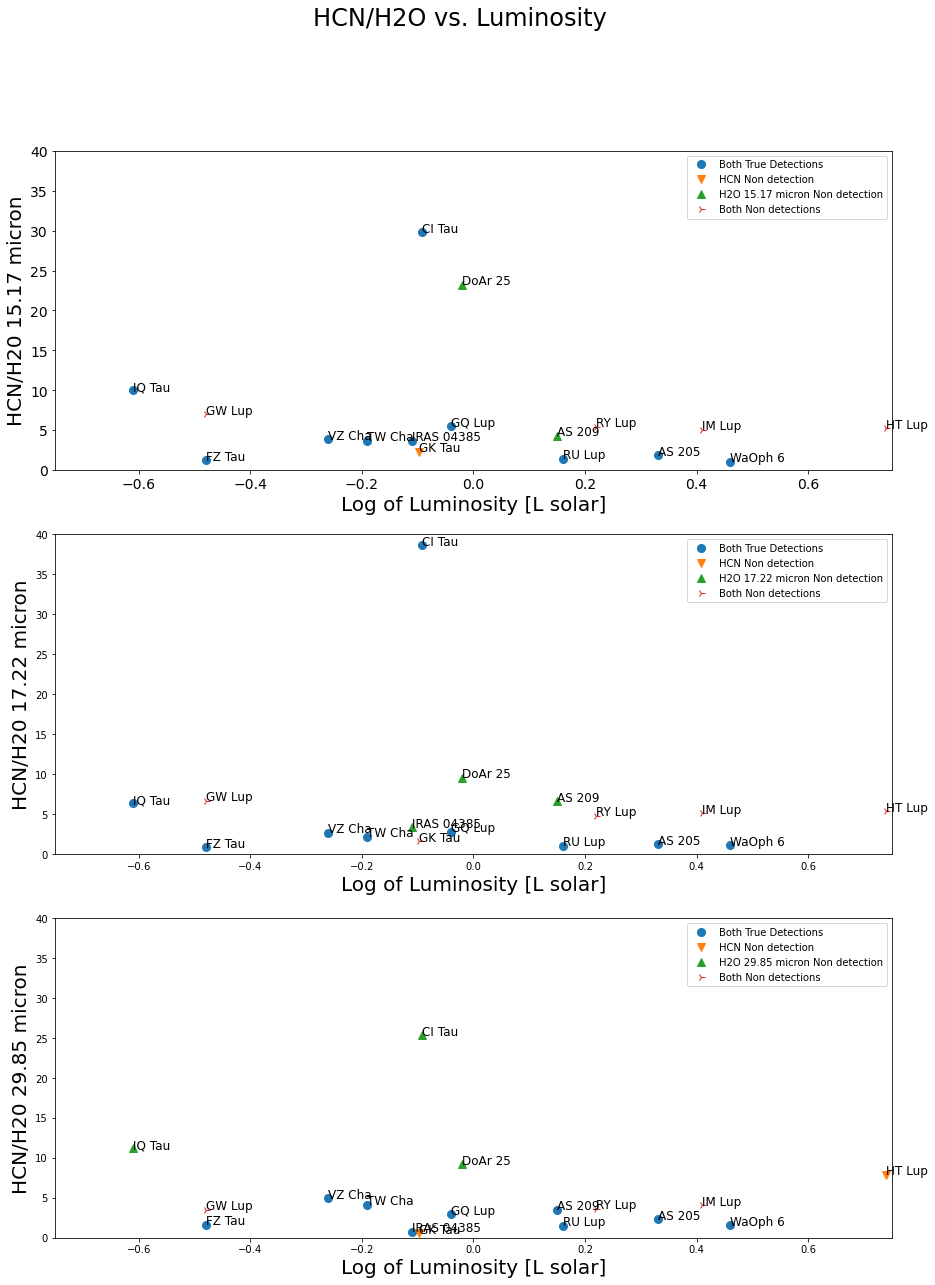

In [38]:
# suppress -99 characteristic values
hcnh2o15lumin = df.loc[(hcnh2o15['log_Lstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15lumin = (hcnh2o15lumin['HCN_flux'])/(hcnh2o15lumin['H2O_15_17_microns'])
# Non detections
hcnh2o15nondethcnlumin = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['log_Lstar'] != -99]
hcnnon_vs_h2o15lumin = (hcnh2o15nondethcnlumin['HCN_flux'])/(hcnh2o15nondethcnlumin['H2O_15_17_microns'])
hcnh2o15nondeth2olumin = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['log_Lstar'] != -99]
hcn_vs_h2o15nonlumin = (hcnh2o15nondeth2olumin['HCN_flux'])/(hcnh2o15nondeth2olumin['H2O_15_17_microns'])
hcnh2o15nondetbothlumin = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['log_Lstar'] != -99]
hcn_vs_h2o15bothnonlumin = (hcnh2o15nondetbothlumin['HCN_flux'])/(hcnh2o15nondetbothlumin['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17lumin = df.loc[(hcnh2o17['log_Lstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17lumin = (hcnh2o17lumin['HCN_flux'])/(hcnh2o17lumin['H2O_17_22_microns'])
# Non detections
hcnh2o17nondethcnlumin = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['log_Lstar'] != -99]
hcnnon_vs_h2o17lumin = (hcnh2o17nondethcnlumin['HCN_flux'])/(hcnh2o17nondethcnlumin['H2O_17_22_microns'])
hcnh2o17nondeth2olumin = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['log_Lstar'] != -99]
hcn_vs_h2o17nonlumin = (hcnh2o17nondeth2olumin['HCN_flux'])/(hcnh2o17nondeth2olumin['H2O_17_22_microns'])
hcnh2o17nondetbothlumin = hcnh2o17nondetboth.loc[(hcnh2o17nondetboth['log_Lstar'] != -99)&(hcnh2o17nondetboth['Star'] != 'HD 163296')]
hcn_vs_h2o17bothnonlumin = (hcnh2o17nondetbothlumin['HCN_flux'])/(hcnh2o17nondetbothlumin['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29lumin = df.loc[(hcnh2o29['log_Lstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29lumin = (hcnh2o29lumin['HCN_flux'])/(hcnh2o29lumin['H2O_29_85_microns'])
# Non detections
hcnh2o29nondethcnlumin = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['log_Lstar'] != -99]
hcnnon_vs_h2o29lumin = (hcnh2o29nondethcnlumin['HCN_flux'])/(hcnh2o29nondethcnlumin['H2O_29_85_microns'])
hcnh2o29nondeth2olumin = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['log_Lstar'] != -99]
hcn_vs_h2o29nonlumin = (hcnh2o29nondeth2olumin['HCN_flux'])/(hcnh2o29nondeth2olumin['H2O_29_85_microns'])
hcnh2o29nondetbothlumin = hcnh2o29nondetboth.loc[(hcnh2o29nondetboth['log_Lstar'] != -99)&(hcnh2o29nondetboth['Star'] != 'HD 163296')]
hcn_vs_h2o29bothnonlumin = (hcnh2o29nondetbothlumin['HCN_flux'])/(hcnh2o29nondetbothlumin['H2O_29_85_microns'])


# send values to plot
star_list15 = hcnh2o15lumin['Star'].tolist()
lumin15 = hcnh2o15lumin['log_Lstar'].tolist()
star_list15a = hcnh2o15nondethcnlumin['Star'].tolist()
lumin15a = hcnh2o15nondethcnlumin['log_Lstar'].tolist()
star_list15b = hcnh2o15nondeth2olumin['Star'].tolist()
lumin15b = hcnh2o15nondeth2olumin['log_Lstar'].tolist()
star_list15c = hcnh2o15nondetbothlumin['Star'].tolist()
lumin15c = hcnh2o15nondetbothlumin['log_Lstar'].tolist()

star_list17 = hcnh2o17lumin['Star'].tolist()
lumin17 = hcnh2o17lumin['log_Lstar'].tolist()
star_list17a = hcnh2o17nondethcnlumin['Star'].tolist()
lumin17a = hcnh2o17nondethcnlumin['log_Lstar'].tolist()
star_list17b = hcnh2o17nondeth2olumin['Star'].tolist()
lumin17b = hcnh2o17nondeth2olumin['log_Lstar'].tolist()
star_list17c = hcnh2o17nondetbothlumin['Star'].tolist()
lumin17c = hcnh2o17nondetbothlumin['log_Lstar'].tolist()

star_list29 = hcnh2o29lumin['Star'].tolist()
lumin29 = hcnh2o29lumin['log_Lstar'].tolist()
star_list29a = hcnh2o29nondethcnlumin['Star'].tolist()
lumin29a = hcnh2o29nondethcnlumin['log_Lstar'].tolist()
star_list29b = hcnh2o29nondeth2olumin['Star'].tolist()
lumin29b = hcnh2o29nondeth2olumin['log_Lstar'].tolist()
star_list29c = hcnh2o29nondetbothlumin['Star'].tolist()
lumin29c = hcnh2o29nondetbothlumin['log_Lstar'].tolist()

# Prepare plot
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('HCN/H2O vs. Luminosity',fontsize=24)

ax1.set_xlim(-0.75,0.75)
ax1.set_ylim(0,40)
#ax.grid()
#ax1.set_title('HCN/H20  vs. Temperature')

ax1.title.set_fontsize(20)
ax1.set_xlabel('Log of Luminosity [L solar]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('HCN/H20 15.17 micron')
ax1.yaxis.label.set_fontsize(20)

ax1.plot(lumin15, hcn_vs_h2o15lumin,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax1.plot(lumin15a, hcnnon_vs_h2o15lumin,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax1.plot(lumin15b, hcn_vs_h2o15nonlumin,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8)
ax1.plot(lumin15c, hcn_vs_h2o15bothnonlumin,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax2.plot(lumin17, hcn_vs_h2o17lumin,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax2.plot(lumin17a, hcnnon_vs_h2o17lumin,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax2.plot(lumin17b, hcn_vs_h2o17nonlumin,label='H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=8)
ax2.plot(lumin17c, hcn_vs_h2o17bothnonlumin,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax2.set_xlim(-0.75,0.75)
ax2.set_ylim(0,40)
#ax.grid()
#ax2.set_title('HCN/H20 17.22 micron  vs. Temperature')
ax2.title.set_fontsize(20)
ax2.set_xlabel('Log of Luminosity [L solar]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('HCN/H20 17.22 micron')
ax2.yaxis.label.set_fontsize(20)


ax3.plot(lumin29, hcn_vs_h2o29lumin,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax3.plot(lumin29a, hcnnon_vs_h2o29lumin,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax3.plot(lumin29b, hcn_vs_h2o29nonlumin,label='H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=8)
ax3.plot(lumin29c, hcn_vs_h2o29bothnonlumin,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax3.set_xlim(-0.75,0.75)
ax3.set_ylim(0,40)
#ax.grid()
#ax3.set_title('HCN/H20 29.85 micron vs. Temperature')
ax3.title.set_fontsize(20)
ax3.set_xlabel('Log of Luminosity [L solar]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('HCN/H20 29.85 micron')
ax3.yaxis.label.set_fontsize(20)


    
for i, (x, y) in enumerate(zip(lumin15, hcn_vs_h2o15lumin)):
    ax1.text(x,y,star_list15[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin15a, hcnnon_vs_h2o15lumin)):
    ax1.text(x,y,star_list15a[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin15b, hcn_vs_h2o15nonlumin)):
    ax1.text(x,y,star_list15b[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin15c, hcn_vs_h2o15bothnonlumin)):
    ax1.text(x,y,star_list15c[i],fontsize=12)

for i, (x, y) in enumerate(zip(lumin17, hcn_vs_h2o17lumin)):
    ax2.text(x,y,star_list17[i],fontsize=12)  
for i, (x, y) in enumerate(zip(lumin17a, hcnnon_vs_h2o17lumin)):
    ax2.text(x,y,star_list17a[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin17b, hcn_vs_h2o17nonlumin)):
    ax2.text(x,y,star_list17b[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin17c, hcn_vs_h2o17bothnonlumin)):
    ax2.text(x,y,star_list17c[i],fontsize=12)
    
for i, (x, y) in enumerate(zip(lumin29, hcn_vs_h2o29lumin)):
    ax3.text(x,y,star_list29[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin29a, hcnnon_vs_h2o29lumin)):
    ax3.text(x,y,star_list29a[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin29b, hcn_vs_h2o29nonlumin)):
    ax3.text(x,y,star_list29b[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin29c, hcn_vs_h2o29bothnonlumin)):
    ax3.text(x,y,star_list29c[i],fontsize=12)


ax1.tick_params(axis='both', labelsize=14)
ax1.legend()
ax2.legend()
ax3.legend()


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

# HCN/H20 vs Luminosity (remove CI Tau)

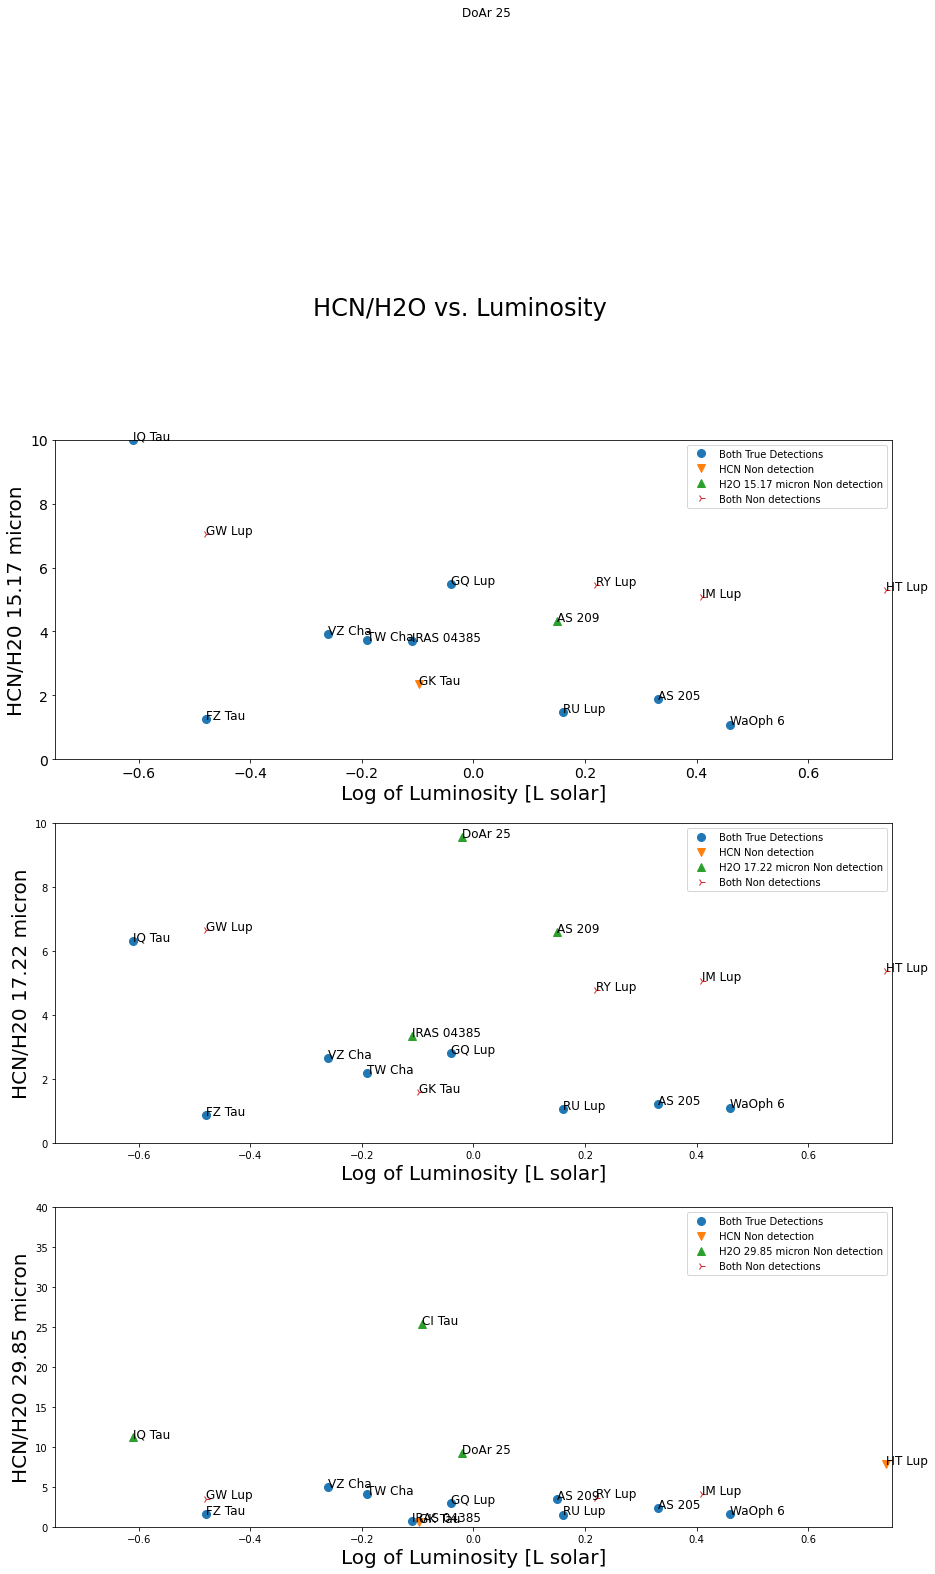

In [39]:
# suppress -99 characteristic values
hcnh2o15lumin = df.loc[(hcnh2o15['log_Lstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)
                      &(df['Star'] != 'CI Tau')]
hcn_vs_h2o15lumin = (hcnh2o15lumin['HCN_flux'])/(hcnh2o15lumin['H2O_15_17_microns'])
# Non detections
hcnh2o15nondethcnlumin = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['log_Lstar'] != -99]
hcnnon_vs_h2o15lumin = (hcnh2o15nondethcnlumin['HCN_flux'])/(hcnh2o15nondethcnlumin['H2O_15_17_microns'])
hcnh2o15nondeth2olumin = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['log_Lstar'] != -99]
hcn_vs_h2o15nonlumin = (hcnh2o15nondeth2olumin['HCN_flux'])/(hcnh2o15nondeth2olumin['H2O_15_17_microns'])
hcnh2o15nondetbothlumin = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['log_Lstar'] != -99]
hcn_vs_h2o15bothnonlumin = (hcnh2o15nondetbothlumin['HCN_flux'])/(hcnh2o15nondetbothlumin['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17lumin = df.loc[(hcnh2o17['log_Lstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)
                        &(df['Star'] != 'CI Tau')]
hcn_vs_h2o17lumin = (hcnh2o17lumin['HCN_flux'])/(hcnh2o17lumin['H2O_17_22_microns'])
# Non detections
hcnh2o17nondethcnlumin = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['log_Lstar'] != -99]
hcnnon_vs_h2o17lumin = (hcnh2o17nondethcnlumin['HCN_flux'])/(hcnh2o17nondethcnlumin['H2O_17_22_microns'])
hcnh2o17nondeth2olumin = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['log_Lstar'] != -99]
hcn_vs_h2o17nonlumin = (hcnh2o17nondeth2olumin['HCN_flux'])/(hcnh2o17nondeth2olumin['H2O_17_22_microns'])
hcnh2o17nondetbothlumin = hcnh2o17nondetboth.loc[(hcnh2o17nondetboth['log_Lstar'] != -99)&(hcnh2o17nondetboth['Star'] != 'HD 163296')]
hcn_vs_h2o17bothnonlumin = (hcnh2o17nondetbothlumin['HCN_flux'])/(hcnh2o17nondetbothlumin['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29lumin = df.loc[(hcnh2o29['log_Lstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29lumin = (hcnh2o29lumin['HCN_flux'])/(hcnh2o29lumin['H2O_29_85_microns'])
# Non detections
hcnh2o29nondethcnlumin = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['log_Lstar'] != -99]
hcnnon_vs_h2o29lumin = (hcnh2o29nondethcnlumin['HCN_flux'])/(hcnh2o29nondethcnlumin['H2O_29_85_microns'])
hcnh2o29nondeth2olumin = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['log_Lstar'] != -99]
hcn_vs_h2o29nonlumin = (hcnh2o29nondeth2olumin['HCN_flux'])/(hcnh2o29nondeth2olumin['H2O_29_85_microns'])
hcnh2o29nondetbothlumin = hcnh2o29nondetboth.loc[(hcnh2o29nondetboth['log_Lstar'] != -99)&(hcnh2o29nondetboth['Star'] != 'HD 163296')]
hcn_vs_h2o29bothnonlumin = (hcnh2o29nondetbothlumin['HCN_flux'])/(hcnh2o29nondetbothlumin['H2O_29_85_microns'])


# send values to plot
star_list15 = hcnh2o15lumin['Star'].tolist()
lumin15 = hcnh2o15lumin['log_Lstar'].tolist()
star_list15a = hcnh2o15nondethcnlumin['Star'].tolist()
lumin15a = hcnh2o15nondethcnlumin['log_Lstar'].tolist()
star_list15b = hcnh2o15nondeth2olumin['Star'].tolist()
lumin15b = hcnh2o15nondeth2olumin['log_Lstar'].tolist()
star_list15c = hcnh2o15nondetbothlumin['Star'].tolist()
lumin15c = hcnh2o15nondetbothlumin['log_Lstar'].tolist()

star_list17 = hcnh2o17lumin['Star'].tolist()
lumin17 = hcnh2o17lumin['log_Lstar'].tolist()
star_list17a = hcnh2o17nondethcnlumin['Star'].tolist()
lumin17a = hcnh2o17nondethcnlumin['log_Lstar'].tolist()
star_list17b = hcnh2o17nondeth2olumin['Star'].tolist()
lumin17b = hcnh2o17nondeth2olumin['log_Lstar'].tolist()
star_list17c = hcnh2o17nondetbothlumin['Star'].tolist()
lumin17c = hcnh2o17nondetbothlumin['log_Lstar'].tolist()

star_list29 = hcnh2o29lumin['Star'].tolist()
lumin29 = hcnh2o29lumin['log_Lstar'].tolist()
star_list29a = hcnh2o29nondethcnlumin['Star'].tolist()
lumin29a = hcnh2o29nondethcnlumin['log_Lstar'].tolist()
star_list29b = hcnh2o29nondeth2olumin['Star'].tolist()
lumin29b = hcnh2o29nondeth2olumin['log_Lstar'].tolist()
star_list29c = hcnh2o29nondetbothlumin['Star'].tolist()
lumin29c = hcnh2o29nondetbothlumin['log_Lstar'].tolist()

# Prepare plot
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('HCN/H2O vs. Luminosity',fontsize=24)

ax1.set_xlim(-0.75,0.75)
ax1.set_ylim(0,10)
#ax.grid()
#ax1.set_title('HCN/H20  vs. Temperature')

ax1.title.set_fontsize(20)
ax1.set_xlabel('Log of Luminosity [L solar]')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('HCN/H20 15.17 micron')
ax1.yaxis.label.set_fontsize(20)

ax1.plot(lumin15, hcn_vs_h2o15lumin,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax1.plot(lumin15a, hcnnon_vs_h2o15lumin,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax1.plot(lumin15b, hcn_vs_h2o15nonlumin,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8)
ax1.plot(lumin15c, hcn_vs_h2o15bothnonlumin,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax2.plot(lumin17, hcn_vs_h2o17lumin,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax2.plot(lumin17a, hcnnon_vs_h2o17lumin,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax2.plot(lumin17b, hcn_vs_h2o17nonlumin,label='H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=8)
ax2.plot(lumin17c, hcn_vs_h2o17bothnonlumin,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax2.set_xlim(-0.75,0.75)
ax2.set_ylim(0,10)
#ax.grid()
#ax2.set_title('HCN/H20 17.22 micron  vs. Temperature')
ax2.title.set_fontsize(20)
ax2.set_xlabel('Log of Luminosity [L solar]')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('HCN/H20 17.22 micron')
ax2.yaxis.label.set_fontsize(20)


ax3.plot(lumin29, hcn_vs_h2o29lumin,label='Both True Detections',linestyle='',marker = "o",markersize=8)
ax3.plot(lumin29a, hcnnon_vs_h2o29lumin,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax3.plot(lumin29b, hcn_vs_h2o29nonlumin,label='H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=8)
ax3.plot(lumin29c, hcn_vs_h2o29bothnonlumin,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax3.set_xlim(-0.75,0.75)
ax3.set_ylim(0,40)
#ax.grid()
#ax3.set_title('HCN/H20 29.85 micron vs. Temperature')
ax3.title.set_fontsize(20)
ax3.set_xlabel('Log of Luminosity [L solar]')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('HCN/H20 29.85 micron')
ax3.yaxis.label.set_fontsize(20)


    
for i, (x, y) in enumerate(zip(lumin15, hcn_vs_h2o15lumin)):
    ax1.text(x,y,star_list15[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin15a, hcnnon_vs_h2o15lumin)):
    ax1.text(x,y,star_list15a[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin15b, hcn_vs_h2o15nonlumin)):
    ax1.text(x,y,star_list15b[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin15c, hcn_vs_h2o15bothnonlumin)):
    ax1.text(x,y,star_list15c[i],fontsize=12)

for i, (x, y) in enumerate(zip(lumin17, hcn_vs_h2o17lumin)):
    ax2.text(x,y,star_list17[i],fontsize=12)  
for i, (x, y) in enumerate(zip(lumin17a, hcnnon_vs_h2o17lumin)):
    ax2.text(x,y,star_list17a[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin17b, hcn_vs_h2o17nonlumin)):
    ax2.text(x,y,star_list17b[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin17c, hcn_vs_h2o17bothnonlumin)):
    ax2.text(x,y,star_list17c[i],fontsize=12)
    
for i, (x, y) in enumerate(zip(lumin29, hcn_vs_h2o29lumin)):
    ax3.text(x,y,star_list29[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin29a, hcnnon_vs_h2o29lumin)):
    ax3.text(x,y,star_list29a[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin29b, hcn_vs_h2o29nonlumin)):
    ax3.text(x,y,star_list29b[i],fontsize=12)
for i, (x, y) in enumerate(zip(lumin29c, hcn_vs_h2o29bothnonlumin)):
    ax3.text(x,y,star_list29c[i],fontsize=12)


ax1.tick_params(axis='both', labelsize=14)
ax1.legend()
ax2.legend()
ax3.legend()


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Opposite to prediction, we see a slight trend that as luminosity increases, HCN becomes less dominant over water. This could correlate to brighter stars have less detections?

# HCN/H20 vs. Spectral Type

In [40]:
# suppress rows with -99 values
df_spec = df.loc[df['Spectral_Type'] != -99]

# Add a column to dataframe of spectral type as digits  
f = lambda s: s[0:2]
df_spec['SpType2'] = df_spec['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
# NOTE, currently pulling integer, not float, missing dec place. Not sure how to amend instruction #########
f = lambda s: order[s[0]]+s[1]
df_spec['SpType2'] = df_spec['SpType2'].apply(f)
# sort list by spectral type "digits"
df_spec2 = df_spec.sort_values('SpType2', ascending = True).reset_index(drop=True)

# suppress -99 characteristic values
hcnh2o15spec = df_spec2[(df_spec2['HCN_flux_uncertainty'] != -99)&(df_spec2['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15spec = (hcnh2o15spec['HCN_flux'])/(hcnh2o15spec['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17spec = df_spec2.loc[(df_spec2['HCN_flux_uncertainty'] != -99)&(df_spec2['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17spec = (hcnh2o17spec['HCN_flux'])/(hcnh2o17spec['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29spec = df_spec2.loc[(df_spec2['HCN_flux_uncertainty'] != -99)&(df_spec2['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29spec = (hcnh2o29spec['HCN_flux'])/(hcnh2o29spec['H2O_29_85_microns'])

#print(df_spec2)

# send values to plot
star_list15 = hcnh2o15spec['Star'].tolist()
spectral_type215 = hcnh2o15spec['SpType2'].tolist()
star_list15 = hcnh2o17spec['Star'].tolist()
spectral_type215 = hcnh2o17spec['SpType2'].tolist()
star_list15 = hcnh2o29spec['Star'].tolist()
spectral_type215 = hcnh2o29spec['SpType2'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('HCN/H2O vs. Spectral Type')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/H2O')
ax.yaxis.label.set_fontsize(20)

ax.scatter(hcnh2o15spec['SpType2'].astype(float), hcn_vs_h2o15spec)
ax.scatter(hcnh2o17spec['SpType2'].astype(float), hcn_vs_h2o17spec)
ax.scatter(hcnh2o29spec['SpType2'].astype(float), hcn_vs_h2o29spec)


#for i, (x, y) in enumerate(zip(df_spec['SpType2'].astype(int), totaldetections)):
    #ax.text(x,y,star_list[i],fontsize=12)

           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()



# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


ValueError: Cannot index with multidimensional key

# HCN/H20 vs. Accretion Rate
Predict that as accretion rate decreases (as the star ages), HCN will become more dominant over water

In [ ]:
# H2O 15
hcnh2o15acc = df.loc[(hcnh2o15['log_accretion_rate'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15acc = (hcnh2o15acc['HCN_flux'])/(hcnh2o15acc['H2O_15_17_microns'])
# Non detections
hcnh2o15nondethcnacc = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['log_accretion_rate'] != -99]
hcnnon_vs_h2o15acc = (hcnh2o15nondethcnlumin['HCN_flux'])/(hcnh2o15nondethcnlumin['H2O_15_17_microns'])
hcnh2o15nondeth2oacc = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['log_accretion_rate'] != -99]
hcn_vs_h2o15nonacc = (hcnh2o15nondeth2olumin['HCN_flux'])/(hcnh2o15nondeth2olumin['H2O_15_17_microns'])
hcnh2o15nondetbothacc = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['log_accretion_rate'] != -99]
hcn_vs_h2o15bothnonacc = (hcnh2o15nondetbothlumin['HCN_flux'])/(hcnh2o15nondetbothlumin['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17acc = df.loc[(hcnh2o17['log_accretion_rate'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]

hcn_vs_h2o17acc = (hcnh2o17acc['HCN_flux'])/(hcnh2o17acc['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29acc = df.loc[(hcnh2o29['log_accretion_rate'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]

hcn_vs_h2o29acc = (hcnh2o29acc['HCN_flux'])/(hcnh2o29acc['H2O_29_85_microns'])

# send values to plot
star_list15 = hcnh2o15acc['Star'].tolist()
acc15 = hcnh2o15acc['log_accretion_rate'].tolist()

star_list17 = hcnh2o17acc['Star'].tolist()
acc17 = hcnh2o17acc['log_accretion_rate'].tolist()

star_list29 = hcnh2o29acc['Star'].tolist()
acc29 = hcnh2o29acc['log_accretion_rate'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0,0.0000003)
ax.set_ylim(0,40)
#ax.grid()
ax.set_title('HCN/H20  vs. Accretion Rate')

ax.title.set_fontsize(20)
ax.set_xlabel('Accretion Rate [M solar / year]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/H20')
ax.yaxis.label.set_fontsize(20)

ax.scatter(acc15, hcn_vs_h2o15acc,label='H2O 15.17 micron')
ax.scatter(acc17, hcn_vs_h2o17acc,label='H2O 17.22 micron')
ax.scatter(acc29, hcn_vs_h2o29acc,label='H2O 29.85 micron')


# Star names are broken, here is the problem: 
# https://stackoverflow.com/questions/51980366/image-size-of-1005x132589-pixels-is-too-large-it-must-be-less-than-216-in-each

for i, (x, y) in enumerate(zip(acc15, hcn_vs_h2o15acc)):
    ax.text(x,y,star_list15[i],fontsize=12)

for i, (x, y) in enumerate(zip(acc17, hcn_vs_h2o17acc)):
    ax.text(x,y,star_list17[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(acc29, hcn_vs_h2o29acc)):
    ax.text(x,y,star_list29[i],fontsize=12)      

ax.tick_params(axis='both', labelsize=14)
ax.legend()
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: See a potential trend that as accretion rate increases, HCN becomes less dominant over H2O

# HCN/H20 vs. Log of Accretion Rate

In [ ]:
# suppress -99 characteristic values
hcnh2o15acc = df.loc[(hcnh2o15['log_accretion_rate'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]

hcn_vs_h2o15acc = (hcnh2o15acc['HCN_flux'])/(hcnh2o15acc['H2O_15_17_microns'])

# suppress -99 characteristic values
hcnh2o17acc = df.loc[(hcnh2o17['log_accretion_rate'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]

hcn_vs_h2o17acc = (hcnh2o17acc['HCN_flux'])/(hcnh2o17acc['H2O_17_22_microns'])

# suppress -99 characteristic values
hcnh2o29acc = df.loc[(hcnh2o29['log_accretion_rate'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]

hcn_vs_h2o29acc = (hcnh2o29acc['HCN_flux'])/(hcnh2o29acc['H2O_29_85_microns'])

# send values to plot
star_list15 = hcnh2o15acc['Star'].tolist()
acc15 = hcnh2o15acc['log_accretion_rate'].tolist()

star_list17 = hcnh2o17acc['Star'].tolist()
acc17 = hcnh2o17acc['log_accretion_rate'].tolist()

star_list29 = hcnh2o29acc['Star'].tolist()
acc29 = hcnh2o29acc['log_accretion_rate'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(-9,-6)
ax.set_ylim(0,6)
#ax.grid()
ax.set_title('HCN/H20  vs. Log of Accretion Rate')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Accretion Rate [M solar / year]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/H20')
ax.yaxis.label.set_fontsize(20)

ax.scatter(acc15, hcn_vs_h2o15acc,label='H2O 15.17 micron')
ax.scatter(acc17, hcn_vs_h2o17acc,label='H2O 17.22 micron')
ax.scatter(acc29, hcn_vs_h2o29acc,label='H2O 29.85 micron')

# Star names are broken, here is the problem: 
# https://stackoverflow.com/questions/51980366/image-size-of-1005x132589-pixels-is-too-large-it-must-be-less-than-216-in-each

for i, (x, y) in enumerate(zip(acc15, hcn_vs_h2o15acc)):
    ax.text(x,y,star_list15[i],fontsize=12)

for i, (x, y) in enumerate(zip(acc17, hcn_vs_h2o17acc)):
    ax.text(x,y,star_list17[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(acc29, hcn_vs_h2o29acc)):
    ax.text(x,y,star_list29[i],fontsize=12)      

ax.tick_params(axis='both', labelsize=14)
ax.legend()
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: See a potential trend that as accretion rate increases, HCN becomes less dominant over H2O. Also, we can assume that accretion rate decreases as the star ages, so we should see that HCN becomes more dominant over water as the star ages, which matches the finding in the age plot!!! 

# HCN/H20 vs. Number of Rings

In [ ]:
# suppress -99 characteristic values
# H20 15
hcnh2o15rings = df.loc[(hcnh2o15['bright_ring_number'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcnh2o15norings = df.loc[(hcnh2o15['Disk_has_Rings'] == 'FALSE')&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
hcn_vs_h2o15rings = (hcnh2o15rings['HCN_flux'])/(hcnh2o15rings['H2O_15_17_microns'])
hcn_vs_h2o15norings = (hcnh2o15norings['HCN_flux'])/(hcnh2o15norings['H2O_15_17_microns'])
#hcnh2o15rings = df.loc[(hcnh2o15['bright_ring_number'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
#non detections
# non HCN, rings
hcnh2o15nondethcnrings = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['bright_ring_number'] != -99]
hcnnon_vs_h2o15rings = (hcnh2o15nondethcnrings['HCN_flux'])/(hcnh2o15nondethcnrings['H2O_15_17_microns'])
# non HCN, no rings
hcnh2o15nondethcnnorings = hcnh2o15nondethcn.loc[hcnh2o15nondethcn['Disk_has_Rings'] == 'FALSE']
hcnnon_vs_h2o15norings = (hcnh2o15nondethcnnorings['HCN_flux'])/(hcnh2o15nondethcnnorings['H2O_15_17_microns'])
# non H2O, rings
hcnh2o15nondeth2orings = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['bright_ring_number'] != -99]
hcn_vs_h2o15nonrings = (hcnh2o15nondeth2orings['HCN_flux'])/(hcnh2o15nondeth2orings['H2O_15_17_microns'])
# non H2O, no rings
hcnh2o15nondeth2onorings = hcnh2o15nondeth2o.loc[hcnh2o15nondeth2o['Disk_has_Rings'] == 'FALSE']
hcn_vs_h2o15nonnorings = (hcnh2o15nondeth2onorings['HCN_flux'])/(hcnh2o15nondeth2onorings['H2O_15_17_microns'])
# Both non, rings
hcnh2o15nondetbothrings = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['bright_ring_number'] != -99]
hcn_vs_h2o15bothnonrings = (hcnh2o15nondetbothrings['HCN_flux'])/(hcnh2o15nondetbothrings['H2O_15_17_microns'])
# both non, no rings
hcnh2o15nondetbothnorings = hcnh2o15nondetboth.loc[hcnh2o15nondetboth['Disk_has_Rings'] == 'FALSE']
hcn_vs_h2o15bothnonnorings = (hcnh2o15nondetbothnorings['HCN_flux'])/(hcnh2o15nondetbothnorings['H2O_15_17_microns'])

# H20 17
hcnh2o17rings = df.loc[(hcnh2o17['bright_ring_number'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcnh2o17norings = df.loc[(hcnh2o17['Disk_has_Rings'] == 'FALSE')&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
hcn_vs_h2o17rings = (hcnh2o17rings['HCN_flux'])/(hcnh2o17rings['H2O_17_22_microns'])
hcn_vs_h2o17norings = (hcnh2o17norings['HCN_flux'])/(hcnh2o17norings['H2O_17_22_microns'])
#non detections
# non HCN, rings
hcnh2o17nondethcnrings = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['bright_ring_number'] != -99]
hcnnon_vs_h2o17rings = (hcnh2o17nondethcnrings['HCN_flux'])/(hcnh2o17nondethcnrings['H2O_17_22_microns'])
# non HCN, no rings
hcnh2o17nondethcnnorings = hcnh2o17nondethcn.loc[hcnh2o17nondethcn['Disk_has_Rings'] == 'FALSE']
hcnnon_vs_h2o17norings = (hcnh2o17nondethcnnorings['HCN_flux'])/(hcnh2o17nondethcnnorings['H2O_17_22_microns'])
# non H2O, rings
hcnh2o17nondeth2orings = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['bright_ring_number'] != -99]
hcn_vs_h2o17nonrings = (hcnh2o17nondeth2orings['HCN_flux'])/(hcnh2o17nondeth2orings['H2O_17_22_microns'])
# non H2O, no rings
hcnh2o17nondeth2onorings = hcnh2o17nondeth2o.loc[hcnh2o17nondeth2o['Disk_has_Rings'] == 'FALSE']
hcn_vs_h2o17nonnorings = (hcnh2o17nondeth2onorings['HCN_flux'])/(hcnh2o17nondeth2onorings['H2O_17_22_microns'])
# Both non, rings
hcnh2o17nondetbothrings = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['bright_ring_number'] != -99]
hcn_vs_h2o17bothnonrings = (hcnh2o17nondetbothrings['HCN_flux'])/(hcnh2o17nondetbothrings['H2O_17_22_microns'])
# both non, no rings
hcnh2o17nondetbothnorings = hcnh2o17nondetboth.loc[hcnh2o17nondetboth['Disk_has_Rings'] == 'FALSE']
hcn_vs_h2o17bothnonnorings = (hcnh2o17nondetbothnorings['HCN_flux'])/(hcnh2o17nondetbothnorings['H2O_17_22_microns'])


# H20 29
hcnh2o29rings = df.loc[(hcnh2o29['bright_ring_number'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcnh2o29norings = df.loc[(hcnh2o29['Disk_has_Rings'] == 'FALSE')&(df['HCN_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
hcn_vs_h2o29rings = (hcnh2o29rings['HCN_flux'])/(hcnh2o29rings['H2O_17_22_microns'])
hcn_vs_h2o29norings = (hcnh2o29norings['HCN_flux'])/(hcnh2o29norings['H2O_17_22_microns'])
#non detections
# non HCN, rings
hcnh2o29nondethcnrings = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['bright_ring_number'] != -99]
hcnnon_vs_h2o29rings = (hcnh2o29nondethcnrings['HCN_flux'])/(hcnh2o29nondethcnrings['H2O_29_85_microns'])
# non HCN, no rings
hcnh2o29nondethcnnorings = hcnh2o29nondethcn.loc[hcnh2o29nondethcn['Disk_has_Rings'] == 'FALSE']
hcnnon_vs_h2o29norings = (hcnh2o29nondethcnnorings['HCN_flux'])/(hcnh2o29nondethcnnorings['H2O_29_85_microns'])
# non H2O, rings
hcnh2o29nondeth2orings = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['bright_ring_number'] != -99]
hcn_vs_h2o29nonrings = (hcnh2o29nondeth2orings['HCN_flux'])/(hcnh2o29nondeth2orings['H2O_29_85_microns'])
# non H2O, no rings
hcnh2o29nondeth2onorings = hcnh2o29nondeth2o.loc[hcnh2o29nondeth2o['Disk_has_Rings'] == 'FALSE']
hcn_vs_h2o29nonnorings = (hcnh2o29nondeth2onorings['HCN_flux'])/(hcnh2o29nondeth2onorings['H2O_29_85_microns'])
# Both non, rings
hcnh2o29nondetbothrings = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['bright_ring_number'] != -99]
hcn_vs_h2o29bothnonrings = (hcnh2o29nondetbothrings['HCN_flux'])/(hcnh2o29nondetbothrings['H2O_29_85_microns'])
# both non, no rings
hcnh2o29nondetbothnorings = hcnh2o29nondetboth.loc[hcnh2o29nondetboth['Disk_has_Rings'] == 'FALSE']
hcn_vs_h2o29bothnonnorings = (hcnh2o29nondetbothnorings['HCN_flux'])/(hcnh2o29nondetbothnorings['H2O_29_85_microns'])

# send values to plot
# H2o 15
star_list15 = hcnh2o15rings['Star'].tolist()
rings15 = hcnh2o15rings['bright_ring_number'].tolist()
norings15 = 0
rings15a = hcnh2o15nondethcnrings['bright_ring_number'].tolist()
norings15a = 0
rings15b = hcnh2o15nondeth2orings['bright_ring_number'].tolist()
norings15b = 0
rings15c = hcnh2o15nondetbothrings['bright_ring_number'].tolist()
norings15c = 0

# H2o 17
star_list17 = hcnh2o17rings['Star'].tolist()
rings17 = hcnh2o17rings['bright_ring_number'].tolist()
norings17 = 0
rings17a = hcnh2o17nondethcnrings['bright_ring_number'].tolist()
norings17a = 0
rings17b = hcnh2o17nondeth2orings['bright_ring_number'].tolist()
norings17b = 0
rings17c = hcnh2o17nondetbothrings['bright_ring_number'].tolist()
norings17c = [0,0]

# H2o 29
star_list29 = hcnh2o29rings['Star'].tolist()
rings29 = hcnh2o29rings['bright_ring_number'].tolist()
norings29 = 0
rings29a = hcnh2o29nondethcnrings['bright_ring_number'].tolist()
norings29a = [0,0]
rings29b = hcnh2o29nondeth2orings['bright_ring_number'].tolist()
norings29b = 0
rings29c = hcnh2o29nondetbothrings['bright_ring_number'].tolist()
norings29c = 0


fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('HCN/H2O vs. Number of Rings',fontsize=24)

# H20 15
ax1.plot(rings15, hcn_vs_h2o15rings,label='Both True Detections',linestyle='',marker = "o",markersize=15,color='b')
ax1.plot(norings15, hcn_vs_h2o15norings,label='Both True Detections',linestyle='',marker = "o",markersize=15,color='b')
ax1.plot(rings15a, hcnnon_vs_h2o15rings,label='HCN Non detection',linestyle='',marker = "v",markersize=15,color='orange')
ax1.plot(norings15a, hcnnon_vs_h2o15norings,label='HCN Non detection',linestyle='',marker = "v",markersize=15,color='orange')
ax1.plot(rings15b, hcn_vs_h2o15nonrings,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=15,color='g')
#ax1.plot(norings15b, hcn_vs_h2o15nonnorings,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8)
ax1.plot(rings15c, hcn_vs_h2o15bothnonrings,label='Both Non detections',linestyle='',marker = "x",markersize=15,color='r')
ax1.plot(norings15c, hcn_vs_h2o15bothnonnorings,label='Both Non detections',linestyle='',marker = "x",markersize=15,color='r')

ax1.title.set_fontsize(20)
ax1.set_xlabel('Number of Bright Rings')
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel('HCN/H20 15.17 micron')
ax1.yaxis.label.set_fontsize(20)
ax1.set_xlim(-1,8)
ax1.set_ylim(0,10)

# H20 17
ax2.plot(rings17, hcn_vs_h2o17rings,label='Both True Detections',linestyle='',marker = "o",markersize=15,color='b')
ax2.plot(norings17, hcn_vs_h2o17norings,label='Both True Detections',linestyle='',marker = "o",markersize=15,color='b')
ax2.plot(rings17a, hcnnon_vs_h2o17rings,label='HCN Non detection',linestyle='',marker = "v",markersize=15,color='orange')
#ax2.plot(norings17a, hcnnon_vs_h2o17norings,label='HCN Non detection',linestyle='',marker = "v",markersize=8)
ax2.plot(rings17b, hcn_vs_h2o17nonrings,label='H2O 17.22 micron Non detection',linestyle='',marker = "^",markersize=15,color='g')
#ax2.plot(norings15b, hcn_vs_h2o15nonnorings,label='H2O 15.17 micron Non detection',linestyle='',marker = "^",markersize=8)
ax2.plot(rings17c, hcn_vs_h2o17bothnonrings,label='Both Non detections',linestyle='',marker = "x",markersize=15,color='r')
ax2.plot(norings17c, hcn_vs_h2o17bothnonnorings,label='Both Non detections',linestyle='',marker = "x",markersize=15,color='r')

ax2.title.set_fontsize(20)
ax2.set_xlabel('Number of Bright Rings')
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel('HCN/H20 17.22 micron')
ax2.yaxis.label.set_fontsize(20)
ax2.set_xlim(-1,8)
ax2.set_ylim(0,10)

# H20 29
ax3.plot(rings29, hcn_vs_h2o29rings,label='Both True Detections',linestyle='',marker = "o",markersize=15,color='b')
ax3.plot(norings29, hcn_vs_h2o29norings,label='Both True Detections',linestyle='',marker = "o",markersize=15,color='b')
ax3.plot(rings29a, hcnnon_vs_h2o29rings,label='HCN Non detection',linestyle='',marker = "v",markersize=15,color='orange')
ax3.plot(norings29a, hcnnon_vs_h2o29norings,label='HCN Non detection',linestyle='',marker = "v",markersize=15,color='orange')
ax3.plot(rings29b, hcn_vs_h2o29nonrings,label='H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=15,color='g')
#ax3.plot(norings29b, hcn_vs_h2o29nonnorings,label='H2O 29.85 micron Non detection',linestyle='',marker = "^",markersize=8)
ax3.plot(rings29c, hcn_vs_h2o29bothnonrings,label='Both Non detections',linestyle='',marker = "x",markersize=15,color='r')
#ax3.plot(norings29c, hcn_vs_h2o29bothnonnorings,label='Both Non detections',linestyle='',marker = "4",markersize=8)

ax3.title.set_fontsize(20)
ax3.set_xlabel('Number of Bright Rings')
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel('HCN/H20 29.85 micron')
ax3.yaxis.label.set_fontsize(20)
ax3.set_xlim(-1,8)
ax3.set_ylim(0,10)


# Star names are broken, here is the problem: 
# https://stackoverflow.com/questions/51980366/image-size-of-1005x132589-pixels-is-too-large-it-must-be-less-than-216-in-each

#for i, (x, y) in enumerate(zip(rings15, hcn_vs_h2o15rings)):
#    ax1.text(x,y,star_list15[i],fontsize=12)

#for i, (x, y) in enumerate(zip(rings17, hcn_vs_h2o17rings)):
#    ax2.text(x,y,star_list17[i],fontsize=12)  
    
#for i, (x, y) in enumerate(zip(rings29, hcn_vs_h2o29rings)):
#    ax3.text(x,y,star_list29[i],fontsize=12)      

ax1.tick_params(axis='both', labelsize=14)
#ax1.legend()
ax2.tick_params(axis='both', labelsize=14)
#ax2.legend()
ax3.tick_params(axis='both', labelsize=14)
#ax3.legend()


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

plt.savefig('HCn.H20.number.rings.png')


Conclusion: Not much of a trend

In [ ]:
hcn_vs_h2o29bothnonnorings

# HCN vs. C2H2
Chose this as the next ratio because of Pascucci et al 2009's finding that "Disks surrounding
sun-like stars, type K1 to M5 in their sample, were rich in HCN, and had a high HCN/C2H2 ratio
compared to disks surrounding cool brown dwarfs, type M5 and later." (from our paper)

In [ ]:
df = pd.DataFrame(output1, columns= ['Star','Distance','Disk_has_Rings','Region','Log_Mstar','Mdisk','T_eff','log_Lstar',
                                     'bright_ring_number','Spectral_Type','R95','R90','R68',
                                     'log_accretion_rate','Accrection_rate',
                                     'disk_inclination','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])

In [ ]:
# suppress -99 values

# HCN vs. C2H2
hcnc2h2 = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['C2H2_flux_uncertainty'] != -99)]

hcn_vs_c2h2 = (hcnc2h2['HCN_flux'])/(hcnc2h2['C2H2_flux'])


hcn_vs_c2h2



C2H2 dominates in one of the disks, row 22 = 0.80: VZ Cha

# HCN/C2H2 vs. Age

In [ ]:
# suppress -99 characteristic values

hcnc2h2age = df.loc[(hcnc2h2['log_tstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['C2H2_flux_uncertainty'] != -99)]

hcn_vs_c2h2age = (hcnc2h2age['HCN_flux'])/(hcnc2h2age['C2H2_flux'])

# send values to plot
star_list = hcnc2h2age['Star'].tolist()
age = hcnc2h2age['log_tstar'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(5.5,7)
ax.set_ylim(0, 20)
#ax.grid()
ax.set_title('HCN/C2H2  vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Age [yrs]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/C2H2')
ax.yaxis.label.set_fontsize(20)

ax.scatter(age, hcn_vs_c2h2age)



for i, (x, y) in enumerate(zip(age, hcn_vs_c2h2age)):
    ax.text(x,y,star_list[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Not much of a trend. 

# HCN/C2H2 vs. Disk Mass

In [ ]:
# suppress -99 characteristic values

hcnc2h2diskm = df.loc[(hcnc2h2['Mdisk'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['C2H2_flux_uncertainty'] != -99)]

hcn_vs_c2h2diskm = (hcnc2h2diskm['HCN_flux'])/(hcnc2h2diskm['C2H2_flux'])

# send values to plot
star_list = hcnc2h2diskm['Star'].tolist()
diskm = hcnc2h2diskm['Mdisk'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0,0.15)
ax.set_ylim(0, 20)
#ax.grid()
ax.set_title('HCN/C2H2  vs. Disk Mass')

ax.title.set_fontsize(20)
ax.set_xlabel('Disk Mass [M solar]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/C2H2')
ax.yaxis.label.set_fontsize(20)

ax.scatter(diskm, hcn_vs_c2h2diskm)



for i, (x, y) in enumerate(zip(diskm, hcn_vs_c2h2diskm)):
    ax.text(x,y,star_list[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Not much of a trend

# HCN/C2H2 vs. Temperature
Should see the trend spotted by Pascucci et al: Higher ratio of HCN in hotter stars 

In [ ]:
# suppress -99 characteristic values

hcnc2h2temp = df.loc[(hcnc2h2['T_eff'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['C2H2_flux_uncertainty'] != -99)]

hcn_vs_c2h2temp = (hcnc2h2temp['HCN_flux'])/(hcnc2h2temp['C2H2_flux'])

# send values to plot
star_list = hcnc2h2temp['Star'].tolist()
temp = hcnc2h2temp['T_eff'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(3500,4500)
ax.set_ylim(0, 20)
#ax.grid()
ax.set_title('HCN/C2H2  vs. Temperature')

ax.title.set_fontsize(20)
ax.set_xlabel('Stellar Temperature [Kelvin]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/C2H2')
ax.yaxis.label.set_fontsize(20)

ax.scatter(temp, hcn_vs_c2h2temp)



for i, (x, y) in enumerate(zip(temp, hcn_vs_c2h2temp)):
    ax.text(x,y,star_list[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: We see a slight trend that as temperature increases, HCN dominates over C2H2

# HCN/C2H2 vs. Luminosity
Prediction: We should see a trend that as the star becomes more luminous, HCN dominates over C2H2

In [ ]:
# suppress -99 characteristic values

hcnc2h2lumin = df.loc[(hcnc2h2['log_Lstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['C2H2_flux_uncertainty'] != -99)]

hcn_vs_c2h2lumin = (hcnc2h2lumin['HCN_flux'])/(hcnc2h2lumin['C2H2_flux'])

# send values to plot
star_list = hcnc2h2lumin['Star'].tolist()
lumin = hcnc2h2lumin['log_Lstar'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(-0.75,0.5)
ax.set_ylim(0, 20)
#ax.grid()
ax.set_title('HCN/C2H2  vs. Temperature')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Luminosity [L solar]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/C2H2')
ax.yaxis.label.set_fontsize(20)

ax.scatter(lumin, hcn_vs_c2h2lumin)



for i, (x, y) in enumerate(zip(lumin, hcn_vs_c2h2lumin)):
    ax.text(x,y,star_list[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Nothing of note, except that maybe stars with solar luminosities approach a peak HCN/C2H2, then decline. But not enough data

# HCN/C2H2 vs. Accretion Rate

In [ ]:
# suppress -99 characteristic values

hcnc2h2acc = df.loc[(hcnc2h2['log_accretion_rate'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['C2H2_flux_uncertainty'] != -99)]

hcn_vs_c2h2acc = (hcnc2h2acc['HCN_flux'])/(hcnc2h2acc['C2H2_flux'])

# send values to plot
star_list = hcnc2h2acc['Star'].tolist()
acc = hcnc2h2acc['log_accretion_rate'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(-9,-6)
ax.set_ylim(0, 20)
#ax.grid()
ax.set_title('HCN/C2H2  vs. Accretion Rate')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Accretion Rate [M solar / year]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/C2H2')
ax.yaxis.label.set_fontsize(20)

ax.scatter(acc, hcn_vs_c2h2acc)



for i, (x, y) in enumerate(zip(acc, hcn_vs_c2h2acc)):
    ax.text(x,y,star_list[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

# HCN/C2H2 vs. Disk Radius

# Interested in adding fluxes without uncertainties for added data points (non detections)

# HCN vs. CO2
Chose this ratio because I was interested in a CO2 analysis

In [ ]:
df = pd.DataFrame(output1, columns= ['Star','Distance','Disk_has_Rings','Region','Log_Mstar','Mdisk','T_eff','log_Lstar',
                                     'bright_ring_number','Spectral_Type','R95','R90','R68',
                                     'log_accretion_rate','Accrection_rate',
                                     'disk_inclination','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])

In [ ]:
# suppress -99 values

# HCN vs. CO2
hcnco2 = df.loc[(df['HCN_flux_uncertainty'] != -99)&(df['CO2_flux_uncertainty'] != -99)]

hcn_vs_co2 = (hcnco2['HCN_flux'])/(hcnco2['CO2_flux'])


hcn_vs_co2

# Try CO2 vs. HCN bc mostly sub 1 values for HCN/CO2

co2_vs_hcn = (hcnco2['CO2_flux'])/(hcnco2['HCN_flux'])

co2_vs_hcn


# HCN/CO2 vs. Age

In [ ]:
# suppress -99 characteristic values

hcnco2age = df.loc[(hcnco2['log_tstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['CO2_flux_uncertainty'] != -99)]

hcn_vs_co2age = (hcnco2age['HCN_flux'])/(hcnco2age['CO2_flux'])

# send values to plot
star_list = hcnco2age['Star'].tolist()
age = hcnco2age['log_tstar'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(5.5,7)
ax.set_ylim(0, 60)
#ax.grid()
ax.set_title('HCN/CO2  vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Age [yrs]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('HCN/CO2')
ax.yaxis.label.set_fontsize(20)

ax.scatter(age, hcn_vs_co2age)



for i, (x, y) in enumerate(zip(age, hcn_vs_co2age)):
    ax.text(x,y,star_list[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

# CO2/HCN vs. Age

In [ ]:
# suppress -99 characteristic values

hcnco2age = df.loc[(hcnco2['log_tstar'] != -99)&(df['HCN_flux_uncertainty'] != -99)&(df['CO2_flux_uncertainty'] != -99)]

co2_vs_hcnage = (hcnco2age['CO2_flux'])/(hcnco2age['HCN_flux'])

# send values to plot
star_list = hcnco2age['Star'].tolist()
age = hcnco2age['log_tstar'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(5.5,7)
ax.set_ylim(0, 3)
#ax.grid()
ax.set_title('HCN/CO2  vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Age [yrs]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('CO2/HCN')
ax.yaxis.label.set_fontsize(20)

ax.scatter(age, co2_vs_hcnage)



for i, (x, y) in enumerate(zip(age, co2_vs_hcnage)):
    ax.text(x,y,star_list[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Nothing of note.

# Ideas: Add spectral type, add nondetections
Nondetections: Have 4 categories for each ratio: detec/detec, non/non, detec/non, non/detec

# OH vs H2O
Chose this ratio bc both chemicals are very common in our disks
I'll do ratios of all fluxes, so six ratios total

In [ ]:
df = pd.DataFrame(output1, columns= ['Star','Distance','Disk_has_Rings','Region','Log_Mstar','Mdisk','T_eff','log_Lstar',
                                     'disk_inclination','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])

In [ ]:
# suppress -99 values

oh23 = df.loc[(df['OH_23_2_microns_uncertainty'] != -99)] 
oh27 = df.loc[(df['OH_27_6_microns_uncertainty'] != -99)] 
h2o15 = df.loc[(df['H2O_15_17_uncertainty'] != -99)] 

# OH 23.2 and H20 15.17 micron
oh23h2o15 = df.loc[(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]


#oh23_vs_h2o15 = (oh23h2o15['OH_23_2_microns'])/(oh23h2o15['H2O_15_17_microns'])

#h2o15_vs_oh23 = (oh23h2o15['H2O_15_17_microns'])/(oh23h2o15['OH_23_2_microns'])

# OH 23.2 and H20 17.22 micron
oh23h2o17 = df.loc[(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]

#oh23_vs_h2o17 = (oh23h2o17['OH_23_2_microns'])/(oh23h2o17['H2O_17_22_microns'])

#h2o17_vs_oh23 = (oh23h2o17['H2O_17_22_microns'])/(oh23h2o17['OH_23_2_microns'])

# OH 23.2 and H20 29.85 micron
oh23h2o29 = df.loc[(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]

#oh23_vs_h2o29 = (oh23h2o29['OH_23_2_microns'])/(oh23h2o29['H2O_17_22_microns'])

#h2o17_vs_oh23 = (oh23h2o29['H2O_17_22_microns'])/(oh23h2o29['OH_23_2_microns'])


# OH 27.6 and H20 29.85 micron
oh27h2o29 = df.loc[(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]

# OH 27.6 and H20 17.22 micron
oh27h2o17 = df.loc[(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]

# OH 27.6 and H20 15.17 micron
oh27h2o15 = df.loc[(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]

oh27h2o15
oh27h2o17
oh23h2o15
oh23
#print(oh27)
h2o15

# OH/H2O vs. Age

In [ ]:
# suppress -99 characteristic values

# OH 23.2 and H20 15.17 micron
oh23h2o15age = df.loc[(oh23h2o15['log_tstar'] != -99)&(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
# Both possible ratios
oh23_vs_h2o15age = (oh23h2o15age['OH_23_2_microns'])/(oh23h2o15age['H2O_15_17_microns'])
h2o15_vs_oh23age = (oh23h2o15age['H2O_15_17_microns'])/(oh23h2o15age['OH_23_2_microns'])

# OH 23.2 and H20 17.22 micron
oh23h2o17age = df.loc[(oh23h2o17['log_tstar'] != -99)&(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
# Both possible ratios
oh23_vs_h2o17age = (oh23h2o17age['OH_23_2_microns'])/(oh23h2o17age['H2O_17_22_microns'])
h2o17_vs_oh23age = (oh23h2o17age['H2O_17_22_microns'])/(oh23h2o17age['OH_23_2_microns'])

# OH 23.2 and H20 29.85 micron
oh23h2o29age = df.loc[(oh23h2o29['log_tstar'] != -99)&(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
# Both possible ratios
oh23_vs_h2o29age = (oh23h2o29age['OH_23_2_microns'])/(oh23h2o29age['H2O_29_85_microns'])
h2o29_vs_oh23age = (oh23h2o29age['H2O_29_85_microns'])/(oh23h2o29age['OH_23_2_microns'])

# OH 27.6 and H20 15.17 micron
oh27h2o15age = df.loc[(oh27h2o15['log_tstar'] != -99)&(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
# Both possible ratios
oh27_vs_h2o15age = (oh27h2o15age['OH_27_6_microns'])/(oh27h2o15age['H2O_15_17_microns'])
h2o15_vs_oh27age = (oh27h2o15age['H2O_15_17_microns'])/(oh27h2o15age['OH_27_6_microns'])

# OH 27.6 and H20 17.22 micron
oh27h2o17age = df.loc[(oh27h2o17['log_tstar'] != -99)&(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
# Both possible ratios
oh27_vs_h2o17age = (oh27h2o17age['OH_27_6_microns'])/(oh27h2o17age['H2O_17_22_microns'])
h2o17_vs_oh27age = (oh27h2o17age['H2O_17_22_microns'])/(oh27h2o17age['OH_27_6_microns'])

# OH 27.6 and H20 29.85 micron
oh27h2o29age = df.loc[(oh27h2o29['log_tstar'] != -99)&(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
# Both possible ratios
oh27_vs_h2o29age = (oh27h2o29age['OH_27_6_microns'])/(oh27h2o29age['H2O_29_85_microns'])
h2o29_vs_oh27age = (oh27h2o29age['H2O_29_85_microns'])/(oh27h2o29age['OH_27_6_microns'])

# send values to plot
star_list2315 = oh23h2o15age['Star'].tolist()
age2315 = oh23h2o15age['log_tstar'].tolist()

star_list2317 = oh23h2o17age['Star'].tolist()
age2317 = oh23h2o17age['log_tstar'].tolist()

star_list2329 = oh23h2o29age['Star'].tolist()
age2329 = oh23h2o29age['log_tstar'].tolist()

star_list2715 = oh27h2o15age['Star'].tolist()
age2715 = oh27h2o15age['log_tstar'].tolist()

star_list2717 = oh27h2o17age['Star'].tolist()
age2717 = oh27h2o17age['log_tstar'].tolist()

star_list2729 = oh27h2o29age['Star'].tolist()
age2729 = oh27h2o29age['log_tstar'].tolist()

# Plot OH/H2O
fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(5.25,6.75)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('OH/H20  vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Age [yrs]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('OH/H20')
ax.yaxis.label.set_fontsize(20)

ax.scatter(age2315, oh23_vs_h2o15age)
ax.scatter(age2317, oh23_vs_h2o17age)
ax.scatter(age2329, oh23_vs_h2o29age)
ax.scatter(age2715, oh27_vs_h2o15age)
ax.scatter(age2717, oh27_vs_h2o17age)
ax.scatter(age2729, oh27_vs_h2o29age)

# Star names
for i, (x, y) in enumerate(zip(age2315, oh23_vs_h2o15age)):
    ax.text(x,y,star_list2315[i],fontsize=12)

for i, (x, y) in enumerate(zip(age2317, oh23_vs_h2o17age)):
    ax.text(x,y,star_list2317[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(age2329, oh23_vs_h2o29age)):
    ax.text(x,y,star_list2329[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(age2715, oh27_vs_h2o15age)):
    ax.text(x,y,star_list2715[i],fontsize=12)

for i, (x, y) in enumerate(zip(age2717, oh27_vs_h2o17age)):
    ax.text(x,y,star_list2717[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(age2729, oh27_vs_h2o29age)):
    ax.text(x,y,star_list2729[i],fontsize=12) 


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')
#ax.legend()


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: This could indicate that OH/H2O is relatively constant throughout the protostar phase, where OH dominates H2O. We see a relatively small range, averaging around 3:1. 


I think there should be more data points. This looks like 5 stars, showing each of the 6 ratios. Maybe it's treating it like an AND statement. Must have all 6. 
CONCLUSION: Only 5 or 6 true OH detections in data set


In [ ]:
#ax.scatter(age2315, oh23_vs_h2o15age)
#ax.scatter(age2317, oh23_vs_h2o17age)
#ax.scatter(age2329, oh23_vs_h2o29age)
#ax.scatter(age2715, oh27_vs_h2o15age)
#ax.scatter(age2717, oh27_vs_h2o17age)
#ax.scatter(age2729, oh27_vs_h2o29age)

oh23_vs_h2o15age
oh23_vs_h2o17age
oh23_vs_h2o29age
oh27_vs_h2o15age
oh27_vs_h2o17age
oh27_vs_h2o29age

# Hmm, yes, the same 5 stars are appearing in each of these variables

# ONLY 5 DETECTIONS OF OH, THOUGHT THERE WERE MORE

# OH/H20 vs. Spectral Type

In [ ]:

# Add a column to dataframe of spectral type as digits  
f = lambda s: s[0:2]
df['SpType2'] = df['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
# NOTE, currently pulling integer, not float, missing dec place. Not sure how to amend instruction #########
f = lambda s: order[s[0]]+s[1]
df['SpType2'] = df['SpType2'].apply(f)
# sort list by spectral type "digits"
df_spec = df.sort_values('SpType2', ascending = True).reset_index(drop=True)

# PROBLEM IS HERE, BRAIN IS ASLEEP HOW TO ISOLATE STARS

#print(df_spec2)

# send values to plot
star_list = df_spec['Star'].tolist()
spectral_type2 = df_spec['SpType2'].tolist()
#totaldetections = totaldetections.tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(0, 10)
#ax.grid()
ax.set_title('OH/H2O vs. Spectral Type')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('OH/H2O')
ax.yaxis.label.set_fontsize(20)


ax.scatter(df_spec['SpType2'].astype(float), oh23_vs_h2o15age)
ax.scatter(df_spec['SpType2'].astype(float), oh23_vs_h2o17age)
ax.scatter(df_spec['SpType2'].astype(float), oh23_vs_h2o29age)
ax.scatter(df_spec['SpType2'].astype(float), oh27_vs_h2o15age)
ax.scatter(df_spec['SpType2'].astype(float), oh27_vs_h2o17age)
ax.scatter(df_spec['SpType2'].astype(float), oh27_vs_h2o29age)

#for i, (x, y) in enumerate(zip(df_spec['SpType2'].astype(int), totaldetections)):
    #ax.text(x,y,star_list[i],fontsize=12)

           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()



# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html
df

# OH/H2O vs. Disk Mass

In [ ]:
# suppress -99 characteristic values

# OH 23.2 and H20 15.17 micron
oh23h2o15diskm = df.loc[(oh23h2o15['Mdisk'] != -99)&(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
oh23_vs_h2o15diskm = (oh23h2o15diskm['OH_23_2_microns'])/(oh23h2o15diskm['H2O_15_17_microns'])

# OH 23.2 and H20 17.22 micron
oh23h2o17diskm = df.loc[(oh23h2o17['Mdisk'] != -99)&(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
oh23_vs_h2o17diskm = (oh23h2o17diskm['OH_23_2_microns'])/(oh23h2o17diskm['H2O_17_22_microns'])

# OH 23.2 and H20 29.85 micron
oh23h2o29diskm = df.loc[(oh23h2o29['Mdisk'] != -99)&(df['OH_23_2_microns_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
oh23_vs_h2o29diskm = (oh23h2o29diskm['OH_23_2_microns'])/(oh23h2o29diskm['H2O_29_85_microns'])

# OH 27.6 and H20 15.17 micron
oh27h2o15diskm = df.loc[(oh27h2o15['Mdisk'] != -99)&(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
oh27_vs_h2o15diskm = (oh27h2o15diskm['OH_27_6_microns'])/(oh27h2o15diskm['H2O_15_17_microns'])

# OH 27.6 and H20 17.22 micron
oh27h2o17diskm = df.loc[(oh27h2o17['Mdisk'] != -99)&(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
oh27_vs_h2o17diskm = (oh27h2o17diskm['OH_27_6_microns'])/(oh27h2o17diskm['H2O_17_22_microns'])

# OH 27.6 and H20 29.85 micron
oh27h2o29diskm = df.loc[(oh27h2o29['Mdisk'] != -99)&(df['OH_27_6_microns_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
oh27_vs_h2o29diskm = (oh27h2o29diskm['OH_27_6_microns'])/(oh27h2o29diskm['H2O_29_85_microns'])

# send values to plot
star_list2315 = oh23h2o15diskm['Star'].tolist()
diskm2315 = oh23h2o15diskm['Mdisk'].tolist()

star_list2317 = oh23h2o17diskm['Star'].tolist()
diskm2317 = oh23h2o17diskm['Mdisk'].tolist()

star_list2329 = oh23h2o29diskm['Star'].tolist()
diskm2329 = oh23h2o29diskm['Mdisk'].tolist()

star_list2715 = oh27h2o15diskm['Star'].tolist()
diskm2715 = oh27h2o15diskm['Mdisk'].tolist()

star_list2717 = oh27h2o17diskm['Star'].tolist()
diskm2717 = oh27h2o17diskm['Mdisk'].tolist()

star_list2729 = oh27h2o29diskm['Star'].tolist()
diskm2729 = oh27h2o29diskm['Mdisk'].tolist()

# Plot OH/H2O
fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0,0.1)
ax.set_ylim(0, 8)
#ax.grid()
ax.set_title('OH/H20  vs. Disk Mass')

ax.title.set_fontsize(20)
ax.set_xlabel('Disk Mass [Solar masses]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('OH/H20')
ax.yaxis.label.set_fontsize(20)

ax.scatter(diskm2315, oh23_vs_h2o15diskm)
ax.scatter(diskm2317, oh23_vs_h2o17diskm)
ax.scatter(diskm2329, oh23_vs_h2o29diskm)
ax.scatter(diskm2715, oh27_vs_h2o15diskm)
ax.scatter(diskm2717, oh27_vs_h2o17diskm)
ax.scatter(diskm2729, oh27_vs_h2o29diskm)

# Star names
for i, (x, y) in enumerate(zip(diskm2315, oh23_vs_h2o15diskm)):
    ax.text(x,y,star_list2315[i],fontsize=12)

for i, (x, y) in enumerate(zip(diskm2317, oh23_vs_h2o17diskm)):
    ax.text(x,y,star_list2317[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(diskm2329, oh23_vs_h2o29diskm)):
    ax.text(x,y,star_list2329[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(diskm2715, oh27_vs_h2o15diskm)):
    ax.text(x,y,star_list2715[i],fontsize=12)

for i, (x, y) in enumerate(zip(diskm2717, oh27_vs_h2o17diskm)):
    ax.text(x,y,star_list2717[i],fontsize=12)  
    
for i, (x, y) in enumerate(zip(diskm2729, oh27_vs_h2o29diskm)):
    ax.text(x,y,star_list2729[i],fontsize=12) 


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')
#ax.legend()



Conclusion: Again, looks like OH/H2O remains relatively constant with disk mass. Our dataset of OH/H2O are all relatively constant like this, so may not be compelling to plot, but compelling to ask the question why the values are constant.

# CO2/H2O
Chose this ratio because there is a wide range of CO2 fluxes, across 2 orders of magnitude

In [ ]:
df = pd.DataFrame(output1, columns= ['Star','Distance','Disk_has_Rings','Region','Log_Mstar','Mdisk','T_eff','log_Lstar',
                                     'disk_inclination','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])


In [ ]:
# suppress -99 values

# CO2 and H20 15.17 micron
co2h2o15 = df.loc[(df['CO2_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]

# CO2 and H20 17.22 micron
co2h2o17 = df.loc[(df['CO2_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]

# CO2 23.2 and H20 29.85 micron
co2h2o29 = df.loc[(df['CO2_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]


In [ ]:
# suppress -99 characteristic values

co2h2o15age = df.loc[(co2h2o15['log_tstar'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
co2_vs_h2o15age = (co2h2o15age['CO2_flux'])/(co2h2o15age['H2O_15_17_microns'])

co2h2o17age = df.loc[(co2h2o17['log_tstar'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
co2_vs_h2o17age = (co2h2o17age['CO2_flux'])/(co2h2o17age['H2O_17_22_microns'])

co2h2o29age = df.loc[(co2h2o29['log_tstar'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
co2_vs_h2o29age = (co2h2o29age['CO2_flux'])/(co2h2o29age['H2O_29_85_microns'])

# send values to plot
star_list15 = co2h2o15age['Star'].tolist()
age15 = co2h2o15age['log_tstar'].tolist()
star_list17 = co2h2o17age['Star'].tolist()
age17 = co2h2o17age['log_tstar'].tolist()
star_list29 = co2h2o29age['Star'].tolist()
age29 = co2h2o29age['log_tstar'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(5.5,7)
ax.set_ylim(-5, 10)
#ax.grid()
ax.set_title('CO2/H2O  vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Log of Age [yrs]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('CO2/H2O')
ax.yaxis.label.set_fontsize(20)

ax.scatter(age15, co2_vs_h2o15age)
ax.scatter(age17, co2_vs_h2o17age)
ax.scatter(age29, co2_vs_h2o29age)


# Add Star names
for i, (x, y) in enumerate(zip(age15, co2_vs_h2o15age)):
    ax.text(x,y,star_list15[i],fontsize=12)
for i, (x, y) in enumerate(zip(age17, co2_vs_h2o17age)):
    ax.text(x,y,star_list17[i],fontsize=12)
for i, (x, y) in enumerate(zip(age29, co2_vs_h2o29age)):
    ax.text(x,y,star_list29[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: I recognize the stars where CO2 is dominant as bright, massive stars. Spectral type analysis would be interesting. Doesn't appear to have any noteworthy trend.

# CO2/H20 vs. Temperature
Prediction: There could be a trend with temperature and luminosity and spectral type vs. CO2/H2O. Perhaps as the star is hotter, CO2 dominates, and H2O dominates in cooler stars

In [ ]:
# suppress -99 characteristic values

co2h2o15temp = df.loc[(co2h2o15['T_eff'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
co2_vs_h2o15temp = (co2h2o15temp['CO2_flux'])/(co2h2o15age['H2O_15_17_microns'])

co2h2o17temp = df.loc[(co2h2o17['T_eff'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
co2_vs_h2o17temp = (co2h2o17temp['CO2_flux'])/(co2h2o17temp['H2O_17_22_microns'])

co2h2o29temp = df.loc[(co2h2o29['T_eff'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
co2_vs_h2o29temp = (co2h2o29temp['CO2_flux'])/(co2h2o29temp['H2O_29_85_microns'])

# send values to plot
star_list15 = co2h2o15temp['Star'].tolist()
temp15 = co2h2o15temp['T_eff'].tolist()
star_list17 = co2h2o17temp['Star'].tolist()
temp17 = co2h2o17temp['T_eff'].tolist()
star_list29 = co2h2o29temp['Star'].tolist()
temp29 = co2h2o29temp['T_eff'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(4000,5000)
ax.set_ylim(-0.5, 10)
#ax.grid()
ax.set_title('CO2/H2O  vs. Stellar Temperature')

ax.title.set_fontsize(20)
ax.set_xlabel('Temperature [Kelvin]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('CO2/H2O')
ax.yaxis.label.set_fontsize(20)

ax.scatter(temp15, co2_vs_h2o15temp)
ax.scatter(temp17, co2_vs_h2o17temp)
ax.scatter(temp29, co2_vs_h2o29temp)


# Add Star names
for i, (x, y) in enumerate(zip(temp15, co2_vs_h2o15temp)):
    ax.text(x,y,star_list15[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp17, co2_vs_h2o17temp)):
    ax.text(x,y,star_list17[i],fontsize=12)
for i, (x, y) in enumerate(zip(temp29, co2_vs_h2o29temp)):
    ax.text(x,y,star_list29[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=0, color='b', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Prediction seems to be wrong. Interesting to note that HT Lup is the hottest star, and water dominates HUGELY if the ratio approaches 0. Confirmed: water is in 10^-14 range, Co2 is in 10^-17 range
Also interesting to note the range of temperatures where CO2 is present in our dataset. We have stars cooler than 4k, and hotter than 5k

# CO2/H20 vs. Disk Mass

In [ ]:
# suppress -99 characteristic values

co2h2o15diskm = df.loc[(co2h2o15['Mdisk'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_15_17_uncertainty'] != -99)]
co2_vs_h2o15diskm = (co2h2o15diskm['CO2_flux'])/(co2h2o15diskm['H2O_15_17_microns'])

co2h2o17diskm = df.loc[(co2h2o17['Mdisk'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_17_22_uncertainty'] != -99)]
co2_vs_h2o17diskm = (co2h2o17diskm['CO2_flux'])/(co2h2o17diskm['H2O_17_22_microns'])

co2h2o29diskm = df.loc[(co2h2o29['Mdisk'] != -99)&(df['CO2_flux_uncertainty'] != -99)&(df['H2O_29_85_uncertainty'] != -99)]
co2_vs_h2o29diskm = (co2h2o29diskm['CO2_flux'])/(co2h2o29diskm['H2O_29_85_microns'])

# send values to plot
star_list15 = co2h2o15diskm['Star'].tolist()
diskm15 = co2h2o15diskm['Mdisk'].tolist()
star_list17 = co2h2o17diskm['Star'].tolist()
diskm17 = co2h2o17diskm['Mdisk'].tolist()
star_list29 = co2h2o29diskm['Star'].tolist()
diskm29 = co2h2o29diskm['Mdisk'].tolist()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0,0.1)
ax.set_ylim(-0.5, 10)
#ax.grid()
ax.set_title('CO2/H2O  vs. Disk Mass')

ax.title.set_fontsize(20)
ax.set_xlabel('Disk Mass [Solar masses]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('CO2/H2O')
ax.yaxis.label.set_fontsize(20)

ax.scatter(diskm15, co2_vs_h2o15diskm)
ax.scatter(diskm17, co2_vs_h2o17diskm)
ax.scatter(diskm29, co2_vs_h2o29diskm)


# Add Star names
for i, (x, y) in enumerate(zip(diskm15, co2_vs_h2o15diskm)):
    ax.text(x,y,star_list15[i],fontsize=12)
for i, (x, y) in enumerate(zip(diskm17, co2_vs_h2o17diskm)):
    ax.text(x,y,star_list17[i],fontsize=12)
for i, (x, y) in enumerate(zip(diskm29, co2_vs_h2o29diskm)):
    ax.text(x,y,star_list29[i],fontsize=12)


ax.tick_params(axis='both', labelsize=14)
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=0, color='b', linestyle='-')


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
#plt.show()

Conclusion: Interesting to see how scattered the data is here. Definitely inconclusive for a trend

# Next: 
- Ratio vs. Number of features

# Other tests

In [ ]:
#chemistry richness test 2

fig, ax = plt.subplots()

# Example data
chemistry = ('OH', 'OH 27', 'H2O', 'CO2', 'HCN')
y_pos = np.arange(len(chemistry))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()


In [ ]:
#chem richness test 3

df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar','Mstar','Mdisk','log_accretion_rate'
                                     'OH_23.2_microns','OH_23.2_microns_uncertainty','OH_27.6_microns','OH_27.6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15.17_microns','H2O_15.17_uncertainty',
                                     'H2O_17.22_microns','H2O_17.22_uncertainty',
                                     'H2O_29.85_microns','H2O_29.85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12.8_flux','NeII_12.8_flux_uncertainty'
                                    ])
df_rich = df.iloc[[9,17,21,22,23,24]]
df_rich

In [ ]:
# Bar chart



columns = ('OH 23.2', 'OH 27.6', 'HCN', 'C2H2', 'H2O 15.17', 'H2O 17.22','H2O 29.85', 'CO2','NeII')
#rows is where we define record count, which is uncertainty != -99
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

#plt.show()

In [ ]:
#scatter

# define columns
df = pd.DataFrame(output1, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'OH_23.2_microns','OH_23.2_microns_uncertainty','OH_27.6_microns','OH_27.6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15.17_microns','H2O_15.17_uncertainty',
                                     'H2O_17.22_microns','H2O_17.22_uncertainty',
                                     'H2O_29.85_microns','H2O_29.85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12.8_flux','NeII_12.8_flux_uncertainty'
                                    ])

#create list from columns
star_list = df['Star'].tolist()
OHflux = df['OH_23.2_microns'].tolist()



x = star_list
y = OHflux
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y) #, s=area, c=colors, alpha=0.5)
#plt.show()

In [ ]:
# Anna help

water=output1[output1 != -99]
water=pd.DataFrame(water, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type','log_tstar',
                                     'H2O_15.17_microns','H2O_15.17_uncertainty',
                                     'H2O_17.22_microns','H2O_17.22_uncertainty',
                                     'H2O_29.85_microns','H2O_29.85_uncertainty',])
water=water.dropna(subset=['H2O_15.17_microns','H2O_17.22_microns','H2O_29.85_microns'])

print(water)

#mask1 = water.columns.str.startswith('H2O') # & water.columns.str.endswith('uncertainty')
#waterupperlim = mask1.loc[mask1['H2O_15.17_uncertainty'] == NaN]
#waterupperlim = mask1.str.contains('NaN')
#print(waterupperlim)

#mask2 = water.columns.str.startswith('Star') 

star_list = water['Star'].tolist()
star_system = water['Star_system'].tolist()
H2O15 = water['H2O_15.17_microns'].tolist()


#water.loc[:,(mask1 | mask2)]

#print(water)

#plt.bar(star_list, star_system)#, width=0.8) #, bottom=None, *, align='center', data=None, **kwargs)[source]

df = pd.DataFrame({'Star list': star_list,
                   'H2O 15': H2O15})#, index=index)
#ax = df.plot.bar(rot=0)

In [ ]:
# bar test 3

x = [ 'HT Lup'    ,   'GW Lup'       ,       'IM Lup'         ,       'RU Lup'      ,     'AS 205'       ,    'DoAr 25'     ]
y =    [  'Triple'   ,    'Single' ,   'Single'   ,    'Single'   ,      'Triple'     ,   'Single' ]  

#plt.bar(y,x)

In [ ]:
water.plot.bar(x="Star", y="H2O_15.17_microns", rot=70, title="H2O 15.17 fluxes");

#plot.show(block=True);

In [ ]:
#multi bar chart

#data = 

#index     = ["H2O_15.17_microns", "H2O_17.22_microns", "H2O_29.85_microns"];

 

data = {"H2O_15.17_microns":[],

        "H2O_15.17_microns":[-99]

        };

index     = ["H2O_15.17_microns", "H2O_17.22_microns", "H2O_29.85_microns"];

 

# Dictionary loaded into a DataFrame

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a vertical bar chart

#dataFrame.plot.bar(stacked=True,rot=15, title="Annual Production Vs Annual Sales");

#plot.show(block=True);

In [ ]:
df = pd.DataFrame({'Star list': star_list,
                   'H2O 15': H2O15}, index=index)
ax = df.plot.bar(rot=0)

In [ ]:
###water
# Here, suppress -99 fluxes, where spectra is not available:
water = info_master.loc[(info_master['H2O_15_17_microns'] != -99) | (info_master['H2O_17_22_microns'] != -99) | (info_master['H2O_29_85_microns'] != -99)]
# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_water = ((water.H2O_15_17_uncertainty != -99) | (water.H2O_17_22_uncertainty != -99) | (water.H2O_29_85_uncertainty != -99))
water = water[mybool_water]


water = info_master.loc[(info_master['H2O_15_17_microns' | 'H2O_17_22_microns' | 'H2O_17_22_microns'] != -99)] 
print (water)
mybool_water = (water.H2O_15_17_uncertainty | water.H2O_17_22_uncertainty |  water.H2O_29_85_uncertainty != -99)
print(mybool_water)

###oh
# Here, suppress -99 fluxes, where spectra is not available:
oh = info_master.loc[(info_master['OH_23_2_microns'] != -99) | (info_master['OH_27_6_microns'] != -99) ]
# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_oh = ((oh.OH_23_2_microns_uncertainty != -99) | (oh.OH_27_6_microns_uncertainty != -99))
oh = oh[mybool_oh]
##hcn
# Here, suppress -99 fluxes, where spectra is not available:
hcn = info_master.loc[(info_master['HCN_flux'] != -99)]
# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_hcn = (hcn.HCN_flux_uncertainty != -99)
hcn = hcn[mybool_hcn]
###c2h2
# Here, suppress -99 fluxes, where spectra is not available:
c2h2 = info_master.loc[info_master['C2H2_flux'] != -99]
# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_c2h2 = (c2h2.C2H2_flux_uncertainty != -99)
c2h2 = c2h2[mybool_c2h2]
###co2
# Here, suppress -99 fluxes, where spectra is not available:
co2 = info_master.loc[info_master['CO2_flux'] != -99]
# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_co2 = (co2.CO2_flux_uncertainty != -99)
co2 = co2[mybool_co2]
###neii
# Here, suppress -99 fluxes, where spectra is not available:
neii = info_master.loc[info_master['NeII_12_8_flux'] != -99]
# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_neii = (neii.NeII_12_8_flux_uncertainty != -99)
neii = neii[mybool_neii]
#neii